## Symplectic Euler Integrator

In [1]:
def classicInt(z,f1,f2,h):
  ## classical symplectic Euler scheme
    dim = int(len(z)/2)
    q=z[:dim]
    p=z[dim:]
    fstage = lambda stg: h * f1(np.block([q + stg, p]))

    stageold=np.zeros(dim) 
    stage = fstage(stageold) +0.
    # Iter = 0

    # while (np.amax(abs(stage - stageold)) > 1e-10 and Iter<400):
    #   stageold = stage+0.
    #   stage = fstage(stage)+0.
    #   Iter = Iter+1
    q = q+stage
    p = p + h*f2(np.block([q,p]))
    return np.block([q,p])

def classicTrajectory(z,f1,f2,h,N=10,n_h=1):
  ## trajectory computed with classicInt
  h_gen = h/n_h
  z = z.reshape(1,-1)[0]
  trj = np.zeros((len(z),N+1))
  trj[:,0] = z.copy()

  for i in range(0,N):
    for j in range(0,int(n_h)):
      trj[:,i+1] = classicInt(trj[:,i].copy(),f1,f2,h_gen)
  return trj[:, :-1], trj[:, 1:]


## Stormer Verlet Integrator

In [2]:
def iterator(fstage,dim,maxiters):
  stageold=np.zeros(dim) 
  stage = fstage(stageold) +0.
  Iter = 0
  while (np.amax(abs(stage - stageold)) > 1e-10 and Iter<maxiters):
    stageold = stage+0.
    stage = fstage(stage)+0.
    Iter = Iter+1
  return stage

def StormerInt(z,f1,f2,h,maxiters):
	## classical symplectic Euler scheme
    dim = int(len(z)/2)
    x=z[:dim]
    y=z[dim:]
    ystage = lambda stg: h/2 * f2(np.block([x, y + stg]))
    stage=iterator(ystage,dim,maxiters)
    y=y+stage

    xstage = lambda stg: h/2 * (f1(np.block([x, y]))+f1(np.block([x+stg, y])))
    stage=iterator(xstage,dim,maxiters)
    x=x+stage
    y=y+h/2*f2(np.block([x, y]))
    return np.block([x,y])

def StormerTrajectory(z,f1,f2,h,N=10,n_h=1,maxiters=100):
	## trajectory computed with classicInt
  h_gen = h/n_h
  z = z.reshape(1,-1)[0]
  trj = np.zeros((len(z),N+1))
  trj[:,0] = z.copy()

  for i in range(0,N):
    for j in range(0,int(n_h)):
      trj[:,i+1] = StormerInt(trj[:,i].copy(),f1,f2,h_gen,maxiters)
  return trj[:, :-1], trj[:, 1:]



## Fourth order symplectic integrator

In [3]:
def fourth_order(z, f1, f2, h, eps=0.1):
    dim = int(len(z)/2)   
    kq = z[:dim]
    kp = z[dim:]
    c = np.array([0.5/(2.-2.**(1./3.)),
         (0.5-2.**(-2./3.))/(2.-2.**(1./3.)),
         (0.5-2.**(-2./3.))/(2.-2.**(1./3.)),
         0.5/(2.-2.**(1./3.))])
    d = np.array([1./(2.-2.**(1./3.)),
         -2.**(1./3.)/(2.-2.**(1./3.)),
         1./(2.-2.**(1./3.)),0.])
    for i_step in range(int(1)):
        for j in range(4):
            tp = kp
            tq = kq + c[j] * f1(z) * h
            kp = tp + d[j] * f2(z) * h
            kq = tq
    return np.block([kq, kp])


def FourthOrder(z,f1,f2,h,N=10,n_h=1,maxiters=100):
	## trajectory computed with classicInt
  h_gen = h/n_h
  z = z.reshape(1,-1)[0]
  trj = np.zeros((len(z),N+1))
  trj[:,0] = z.copy()

  for i in range(0,N):
    for j in range(0,int(n_h)):
      trj[:,i+1] = fourth_order(trj[:,i].copy(),f1,f2,h_gen,maxiters)
  return trj[:, :-1], trj[:, 1:]

https://farside.ph.utexas.edu/teaching/315/Waveshtml/node20.html

http://www.physics.hmc.edu/~saeta/courses/p111/uploads/Y2013/chap13.pdf


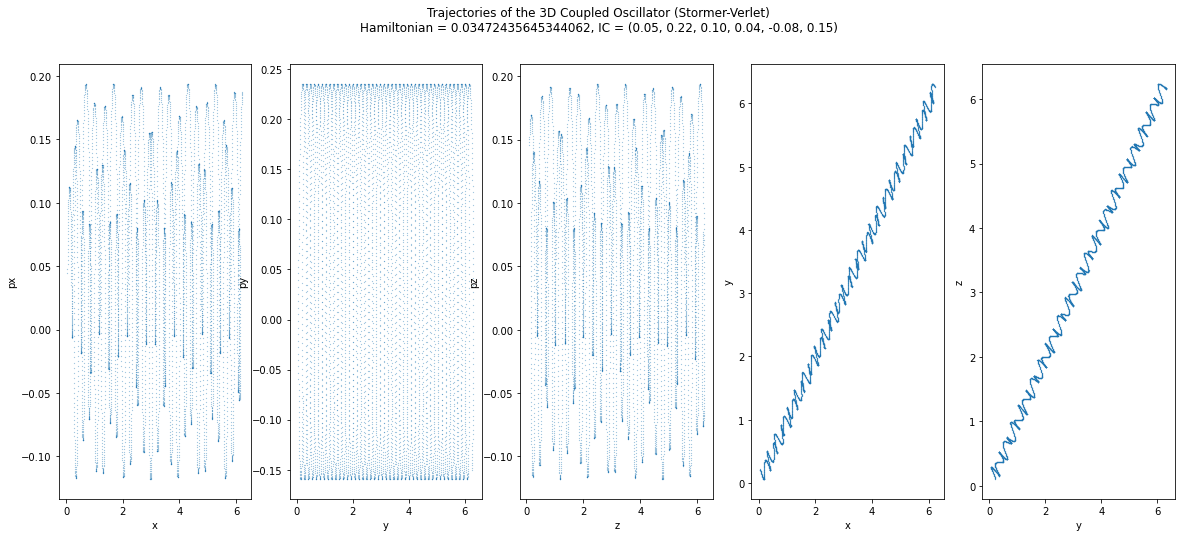

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

k = 1
f1 = lambda x: np.asarray([x[3],x[4],x[5]])
f2 = lambda x: np.asarray([k*(x[1]-x[0]), k*(x[0]+x[2]) - 2*k*x[1], -k*(x[2]-x[1])])
H = lambda x: 0.5*(x[3]**2 + x[4]**2 + x[5]**2) + 0.5* k *(x[1]-x[0])**2 + 0.5* k *(x[2]-x[1])**2 

np.random.seed(0)
inp = np.random.rand(6)-0.5


fig, ax = plt.subplots(1,5,figsize = (20,8))
soln = StormerTrajectory(inp,f1,f2,0.02,N=8000,n_h=1)
ax[0].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
ax[1].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][4,:], marker = '.', s=0.1)
ax[2].scatter(np.asarray(soln)[0][2,:], np.asarray(soln)[0][5,:], marker = '.', s=0.1)
ax[3].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
ax[4].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
fig.suptitle("Trajectories of the 3D Coupled Oscillator (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f, %.2f, %.2f)" %(H(inp), inp[0], inp[1], inp[2], inp[3], inp[4], inp[5]))
ax[0].set_xlabel("x")
ax[0].set_ylabel("px")
ax[1].set_xlabel("y")
ax[1].set_ylabel("py")
ax[2].set_xlabel("z")
ax[2].set_ylabel("pz")
ax[3].set_xlabel("x")
ax[3].set_ylabel("y")
ax[4].set_xlabel("y")
ax[4].set_ylabel("z")
plt.show()



  0%|          | 0/10 [00:00<?, ?it/s]

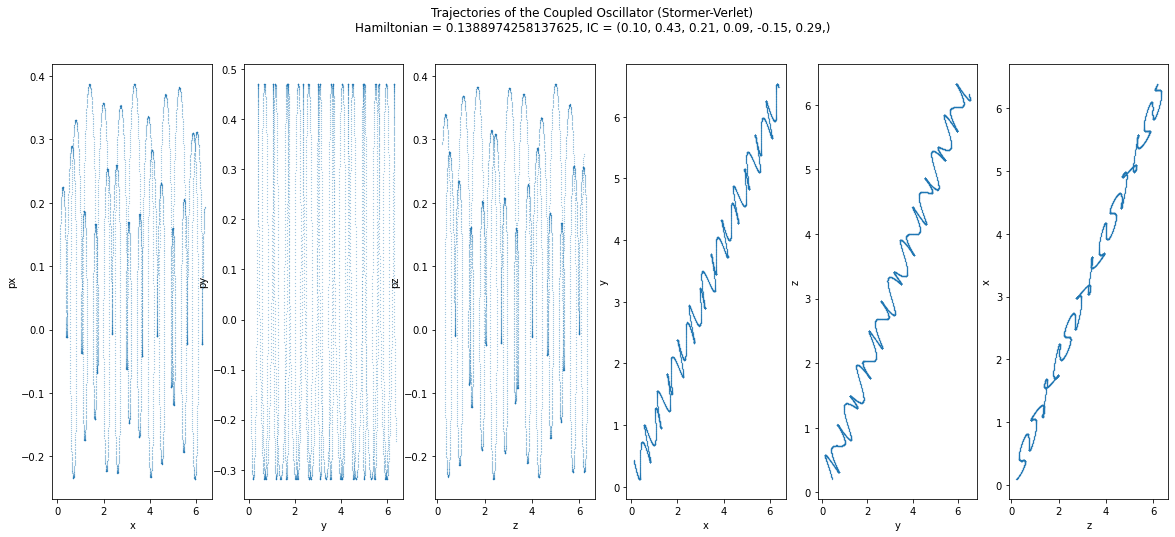

 10%|█         | 1/10 [00:02<00:19,  2.13s/it]

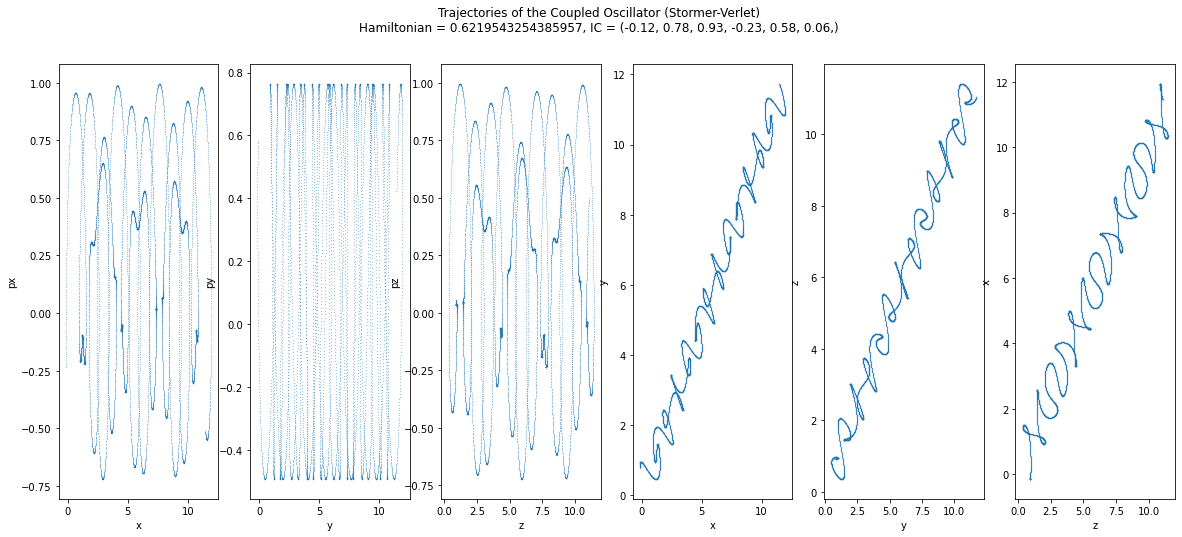

 20%|██        | 2/10 [00:04<00:18,  2.27s/it]

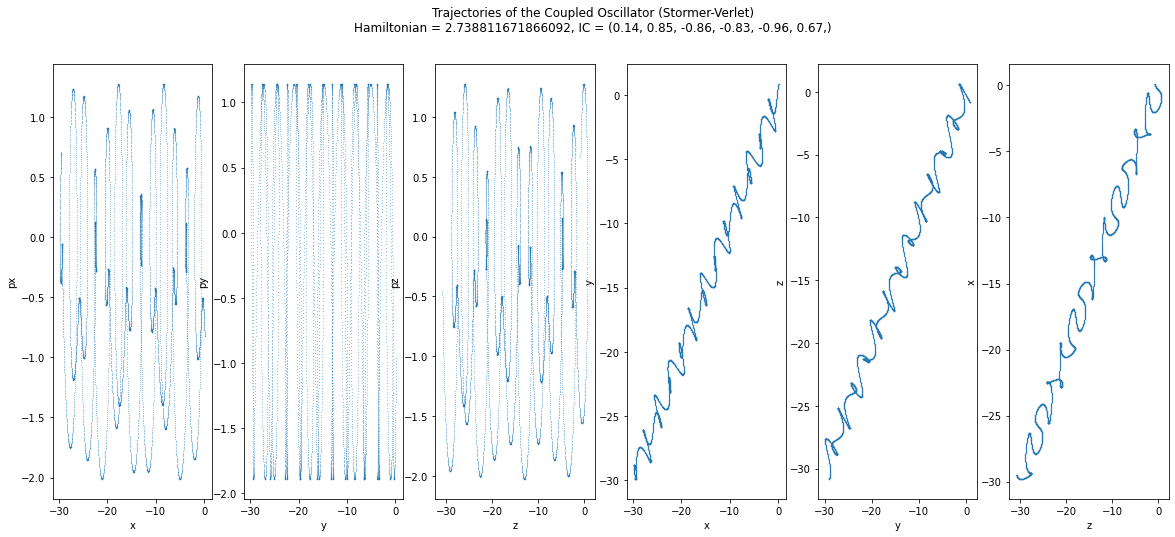

 30%|███       | 3/10 [00:07<00:18,  2.64s/it]

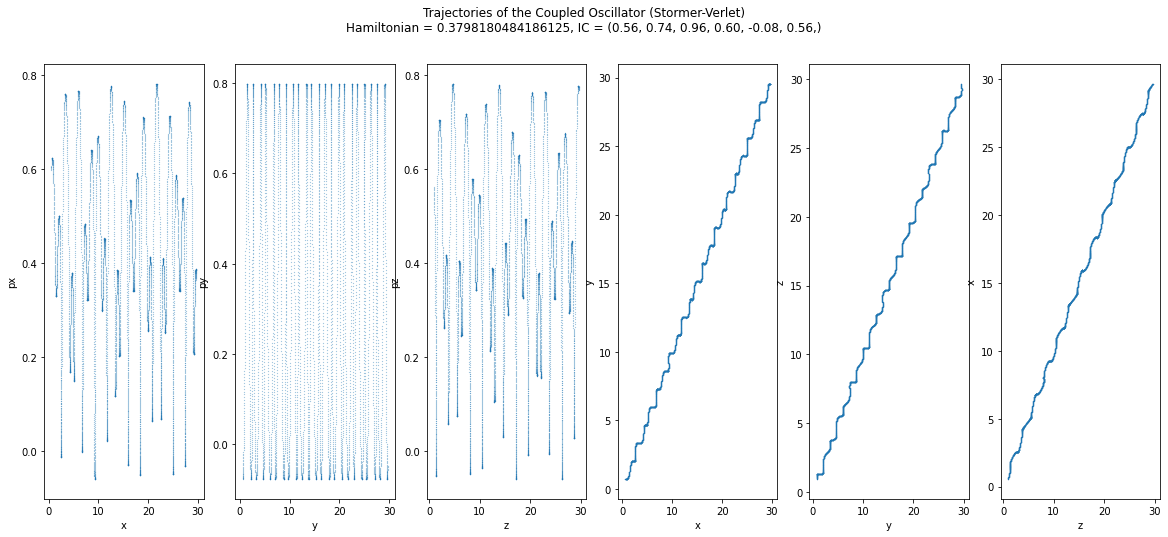

 40%|████      | 4/10 [00:09<00:14,  2.49s/it]

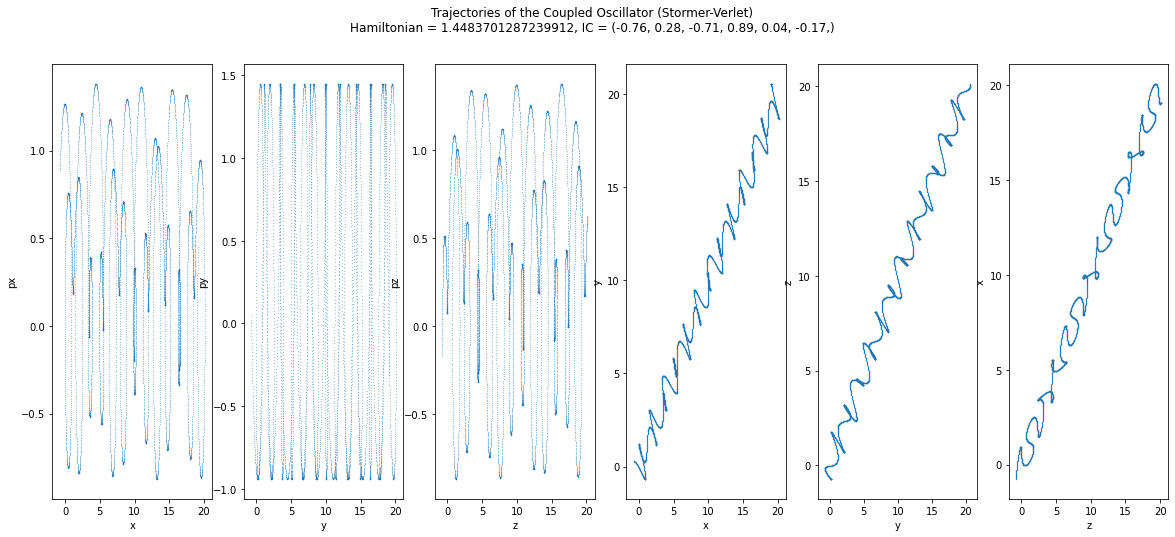

 50%|█████     | 5/10 [00:11<00:11,  2.35s/it]

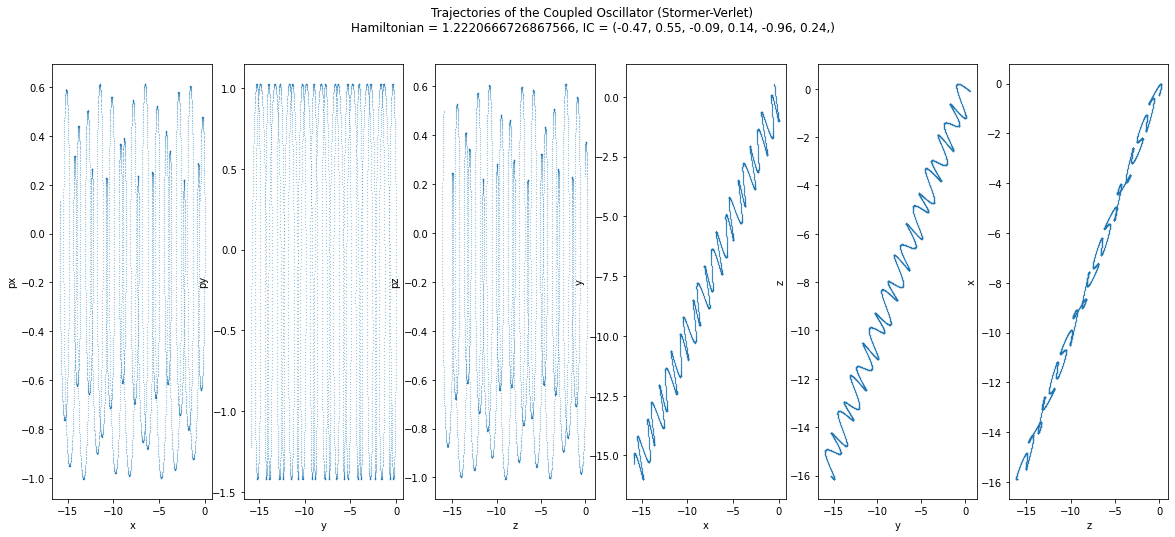

 60%|██████    | 6/10 [00:14<00:09,  2.28s/it]

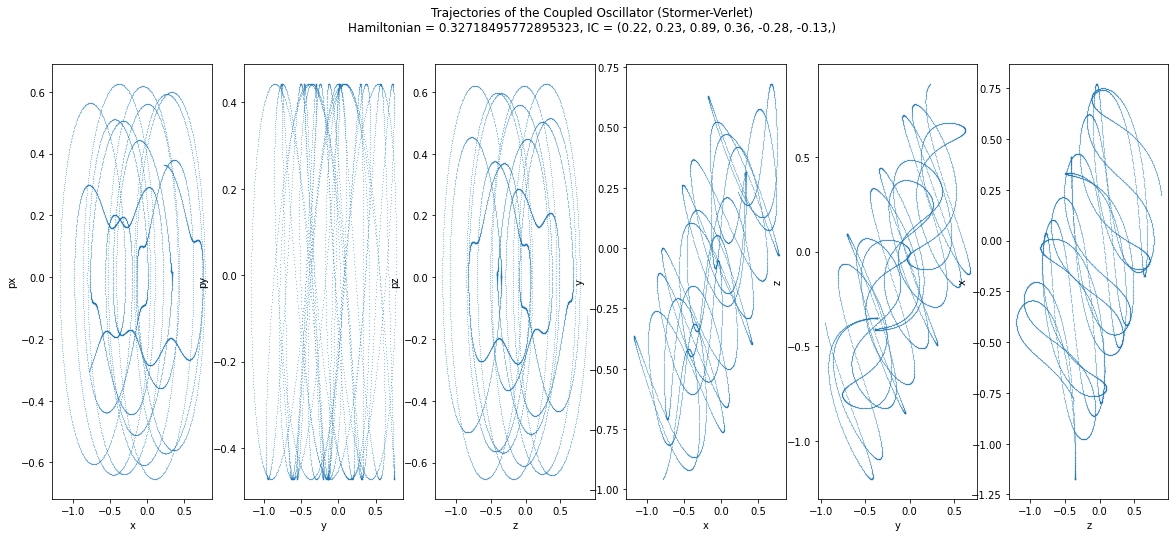

 70%|███████   | 7/10 [00:16<00:06,  2.24s/it]

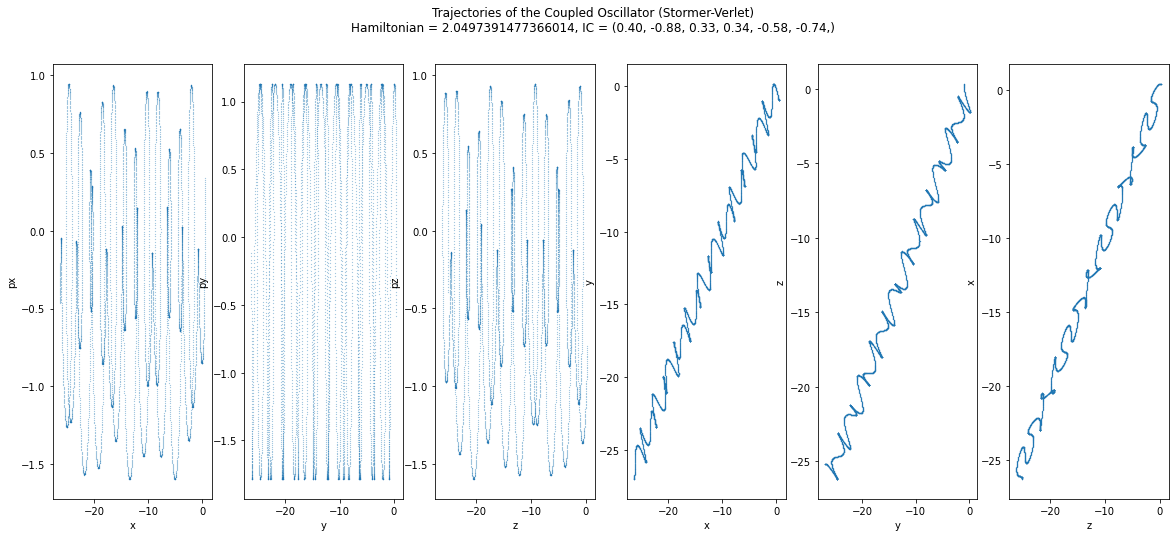

 80%|████████  | 8/10 [00:18<00:04,  2.22s/it]

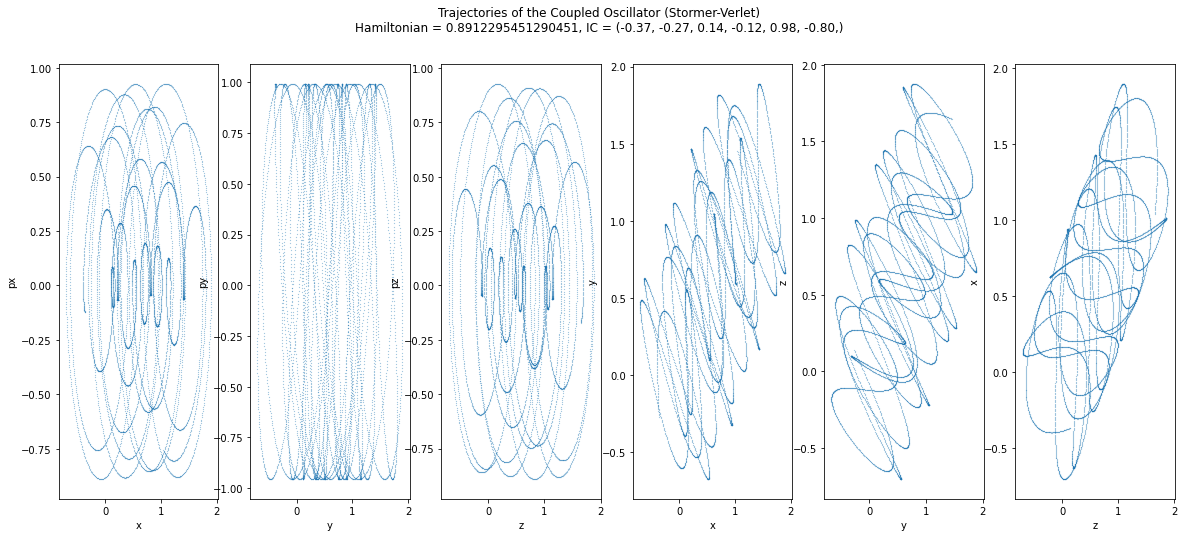

 90%|█████████ | 9/10 [00:20<00:02,  2.21s/it]

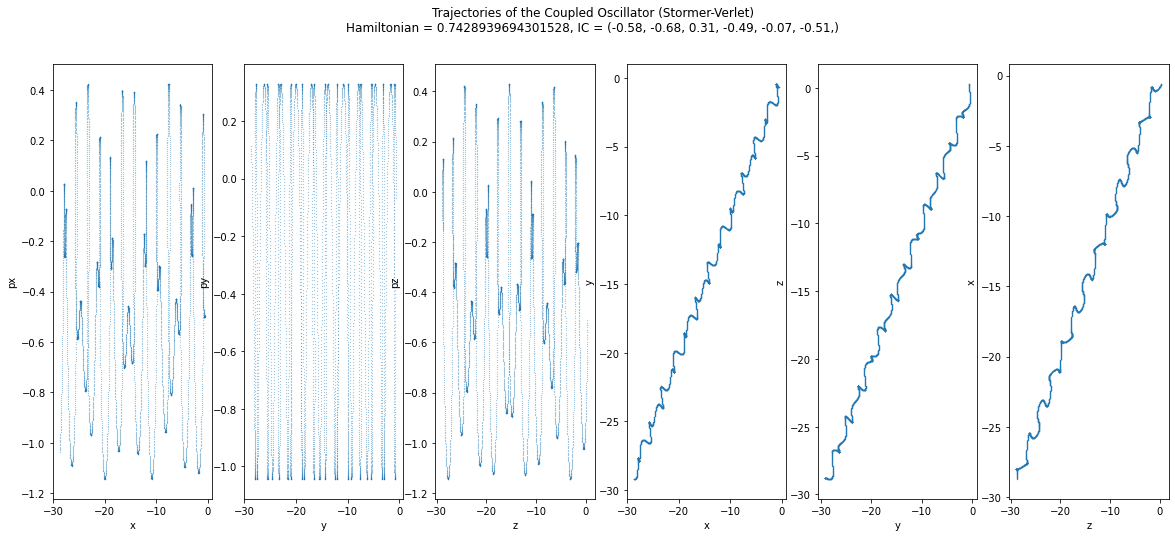

100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

k = 1
f1 = lambda x: np.asarray([x[3],x[4],x[5]])
f2 = lambda x: np.asarray([k*(x[1]-x[0]), k*(x[0]+x[2]) - 2*k*x[1], -k*(x[2]-x[1])])
H = lambda x: 0.5*(x[3]**2 + x[4]**2 + x[5]**2) + 0.5* k *(x[1]-x[0])**2 + 0.5* k *(x[2]-x[1])**2 
px = lambda x: 2*(1.5 -  0.5*( + x[4]**2 + x[5]**2) - 0.5* k *(x[1]-x[0])**2 - 0.5* k *(x[2]-x[1])**2 )
np.random.seed(0)


for i in tqdm(range(10)):
  fig, ax = plt.subplots(1,6,figsize = (20,8))  
  inp = np.random.rand(6)*2.-1.
  soln = StormerTrajectory(inp,f1,f2,0.01,N=8000,n_h=1)
  ax[0].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
  ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][4,:], marker = '.', s=0.1)
  ax[2].scatter(np.asarray(soln)[0][2,:], np.asarray(soln)[0][5,:], marker = '.', s=0.1)
  ax[3].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
  ax[4].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
  ax[5].scatter(np.asarray(soln)[0][2,:], np.asarray(soln)[0][0,:], marker = '.', s=0.1)
  fig.suptitle("Trajectories of the Coupled Oscillator (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3], inp[4], inp[5]))
  ax[0].set_xlabel("x")
  ax[0].set_ylabel("px")
  ax[1].set_xlabel("y")
  ax[1].set_ylabel("py")
  ax[2].set_xlabel("z")
  ax[2].set_ylabel("pz")
  ax[3].set_xlabel("x")
  ax[3].set_ylabel("y")
  ax[4].set_xlabel("y")
  ax[4].set_ylabel("z")
  ax[5].set_xlabel("z")
  ax[5].set_ylabel("x")
  plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

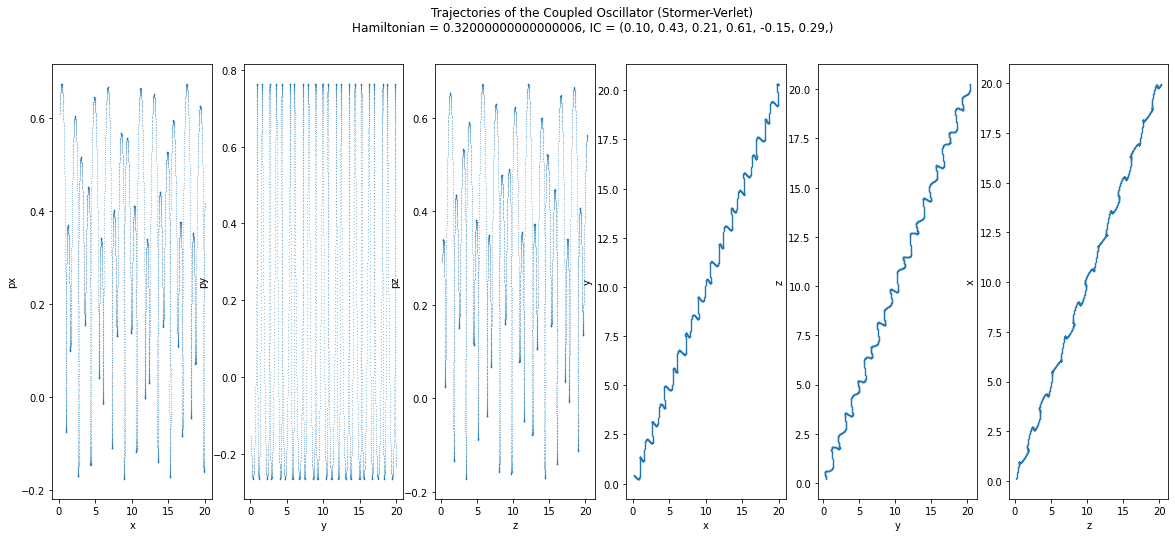

 10%|█         | 1/10 [00:02<00:19,  2.22s/it]

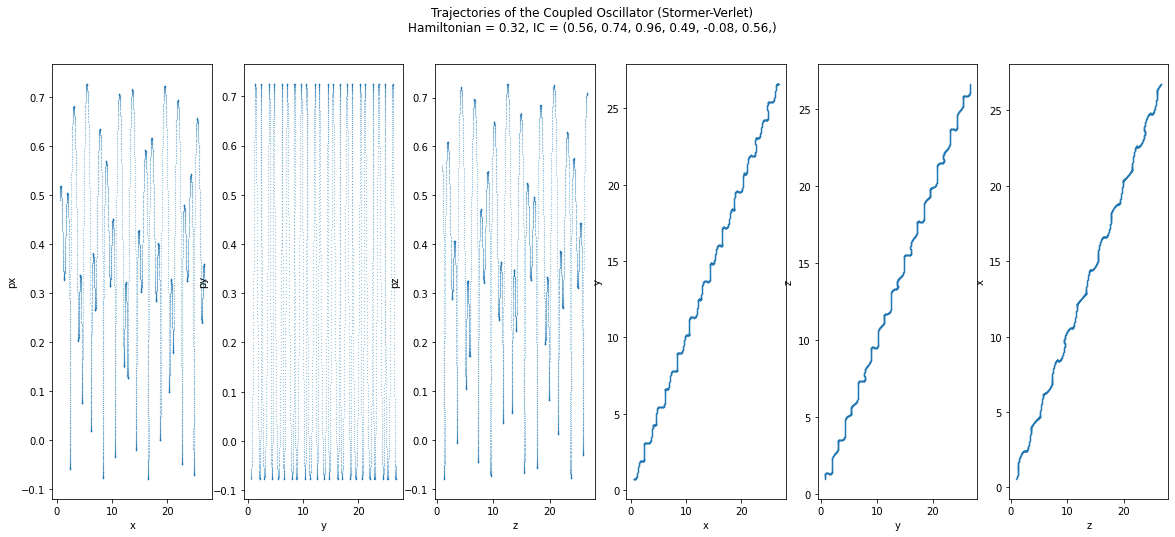

 20%|██        | 2/10 [00:05<00:22,  2.87s/it]

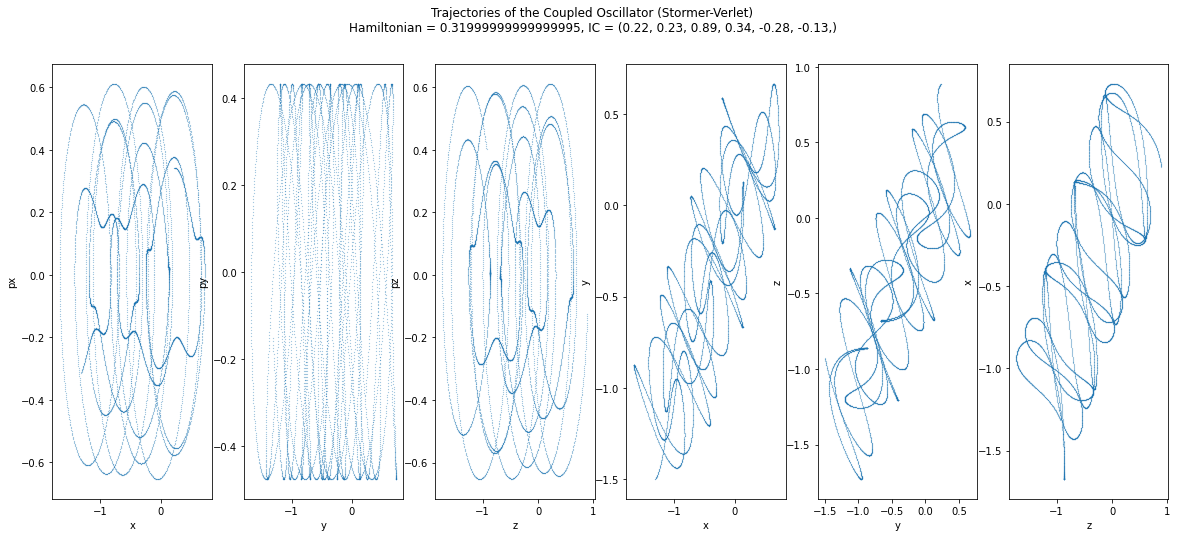

 30%|███       | 3/10 [00:07<00:17,  2.53s/it]

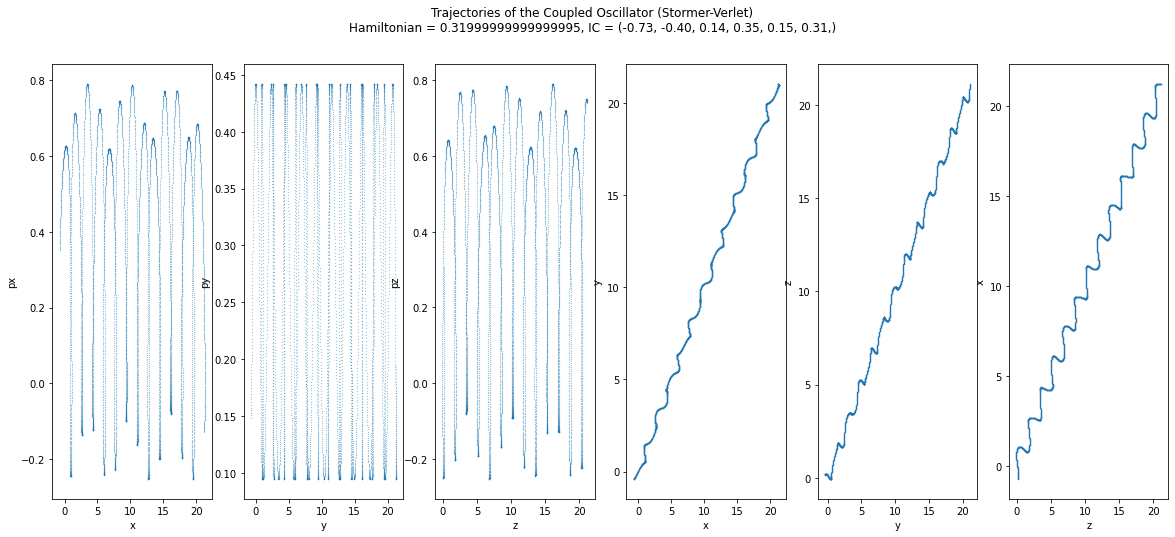

 40%|████      | 4/10 [00:09<00:14,  2.36s/it]

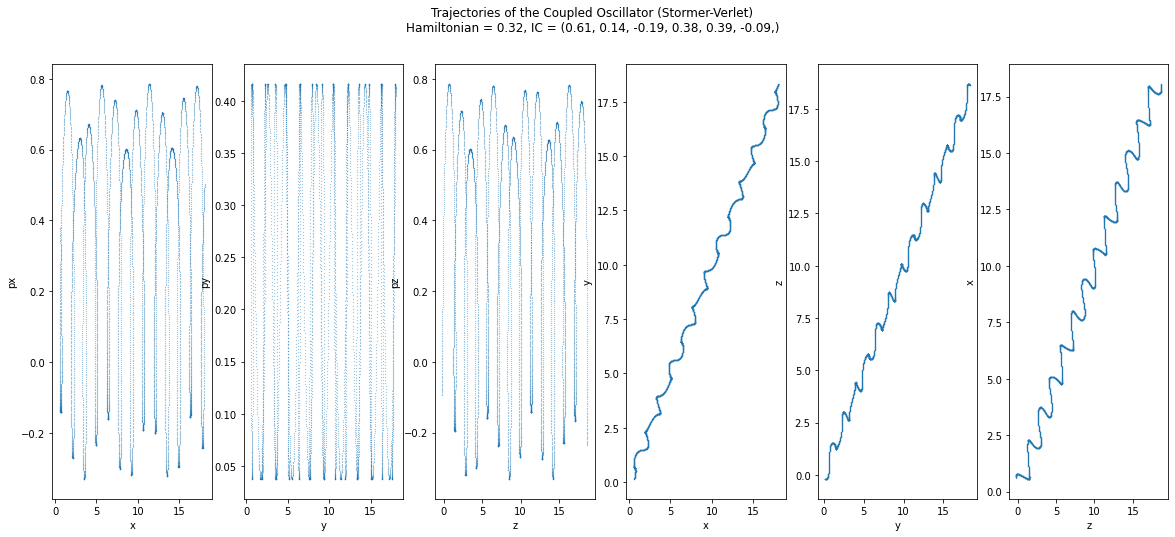

 50%|█████     | 5/10 [00:11<00:11,  2.29s/it]

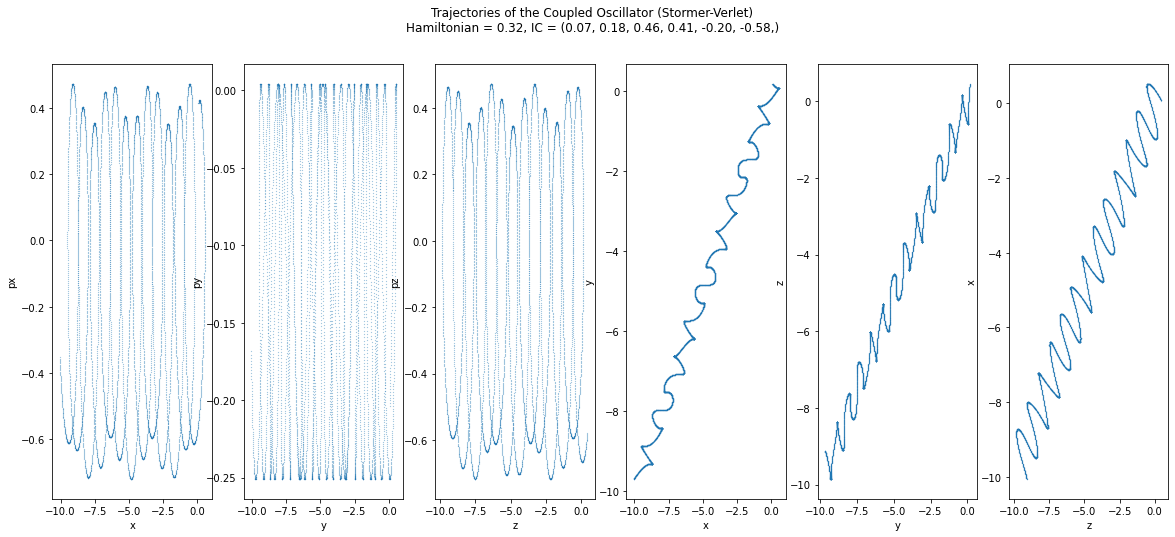

 60%|██████    | 6/10 [00:14<00:09,  2.28s/it]

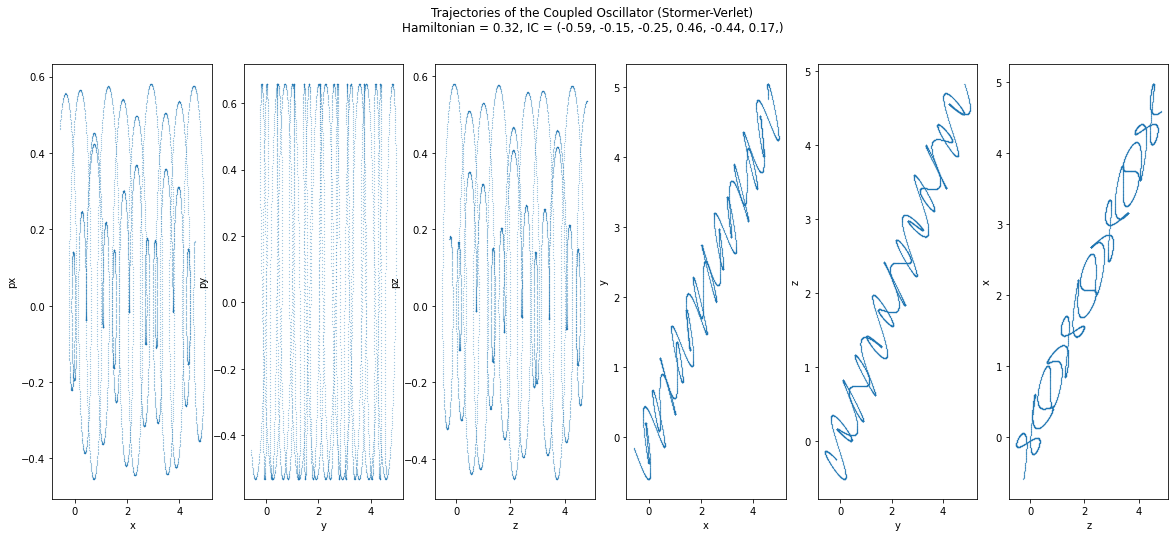

 70%|███████   | 7/10 [00:16<00:06,  2.24s/it]

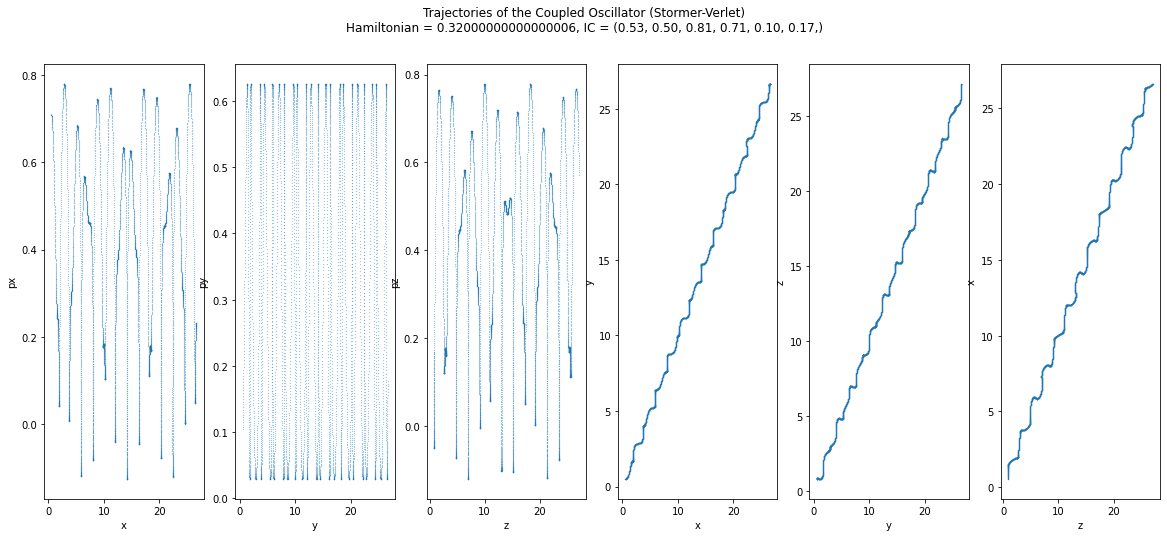

 80%|████████  | 8/10 [00:18<00:04,  2.19s/it]

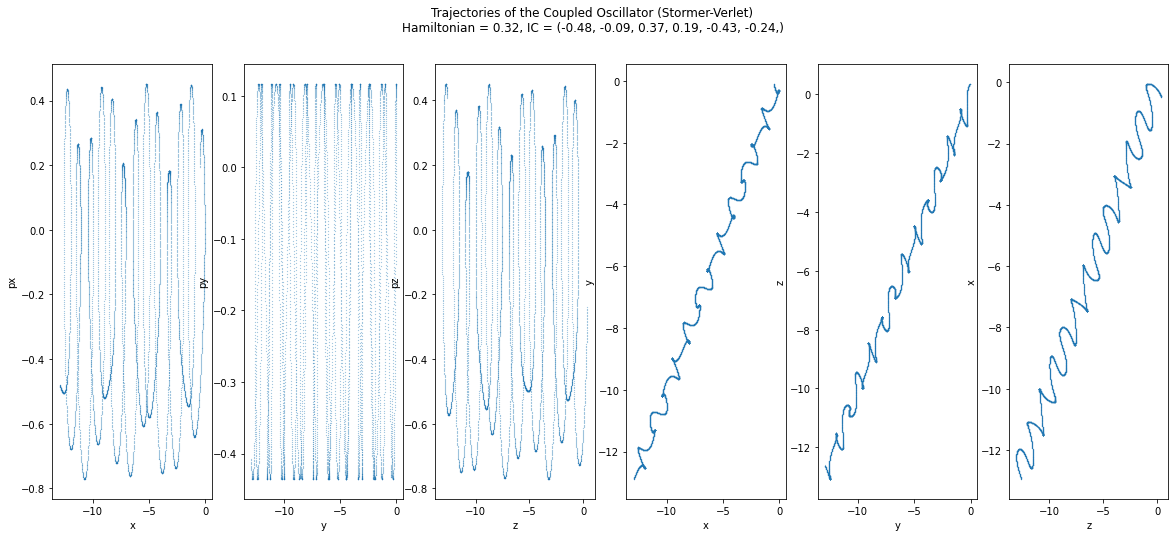

 90%|█████████ | 9/10 [00:20<00:02,  2.17s/it]

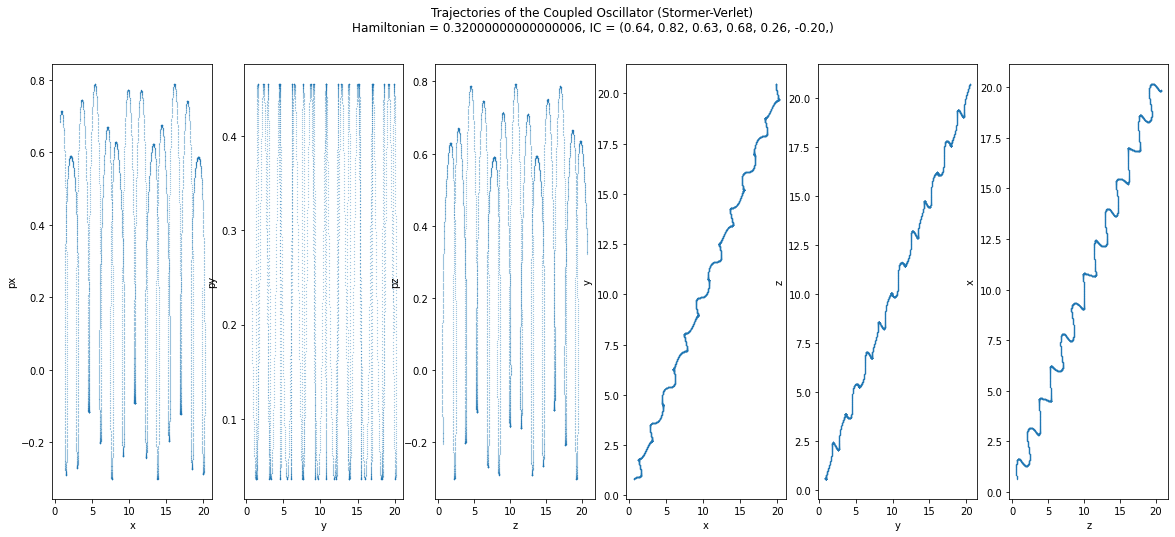

100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

k = 1
f1 = lambda x: np.asarray([x[3],x[4],x[5]])
f2 = lambda x: np.asarray([k*(x[1]-x[0]), k*(x[0]+x[2]) - 2*k*x[1], -k*(x[2]-x[1])])
H = lambda x: 0.5*(x[3]**2 + x[4]**2 + x[5]**2) + 0.5* k *(x[1]-x[0])**2 + 0.5* k *(x[2]-x[1])**2 
px = lambda x: 2*(0.32 -  0.5*( + x[4]**2 + x[5]**2) - 0.5* k *(x[1]-x[0])**2 - 0.5* k *(x[2]-x[1])**2 )
np.random.seed(0)


for i in tqdm(range(10)):
  fig, ax = plt.subplots(1,6,figsize = (20,8))  
  inp = np.random.rand(6)*2.-1.
  while px(inp)<0:
    inp = np.random.rand(6)*2.-1.
  inp[3] = np.sqrt(px(inp))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=8000,n_h=1)
  ax[0].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
  ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][4,:], marker = '.', s=0.1)
  ax[2].scatter(np.asarray(soln)[0][2,:], np.asarray(soln)[0][5,:], marker = '.', s=0.1)
  ax[3].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
  ax[4].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
  ax[5].scatter(np.asarray(soln)[0][2,:], np.asarray(soln)[0][0,:], marker = '.', s=0.1)
  fig.suptitle("Trajectories of the Coupled Oscillator (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3], inp[4], inp[5]))
  ax[0].set_xlabel("x")
  ax[0].set_ylabel("px")
  ax[1].set_xlabel("y")
  ax[1].set_ylabel("py")
  ax[2].set_xlabel("z")
  ax[2].set_ylabel("pz")
  ax[3].set_xlabel("x")
  ax[3].set_ylabel("y")
  ax[4].set_xlabel("y")
  ax[4].set_ylabel("z")
  ax[5].set_xlabel("z")
  ax[5].set_ylabel("x")
  plt.show()

 15%|█▌        | 30/200 [07:21<41:01, 14.48s/it]

i = 0, Trajectories of the Coupled Oscillator (Stormer-Verlet), Hamiltonian = 0.32, IC = (0.40, 0.04, -0.19, 0.46, -0.49, 0.02,), Crossings = 65
i = 1, Trajectories of the Coupled Oscillator (Stormer-Verlet), Hamiltonian = 0.32, IC = (0.40, 0.04, -0.19, 0.46, -0.49, 0.02,), Crossings = 79


 16%|█▌        | 31/200 [07:35<40:41, 14.45s/it]

i = 2, Trajectories of the Coupled Oscillator (Stormer-Verlet), Hamiltonian = 0.32, IC = (0.40, 0.04, -0.19, 0.46, -0.49, 0.02,), Crossings = 71
i = 0, Trajectories of the Coupled Oscillator (Stormer-Verlet), Hamiltonian = 0.32000000000000006, IC = (-0.50, -0.03, 0.39, 0.38, -0.15, -0.29,), Crossings = 19


 16%|█▌        | 32/200 [07:50<40:34, 14.49s/it]

i = 2, Trajectories of the Coupled Oscillator (Stormer-Verlet), Hamiltonian = 0.32000000000000006, IC = (-0.50, -0.03, 0.39, 0.38, -0.15, -0.29,), Crossings = 19


 21%|██        | 42/200 [10:16<38:17, 14.54s/it]

i = 0, Trajectories of the Coupled Oscillator (Stormer-Verlet), Hamiltonian = 0.32, IC = (-0.05, 0.44, 0.27, 0.48, -0.14, -0.35,), Crossings = 74
i = 1, Trajectories of the Coupled Oscillator (Stormer-Verlet), Hamiltonian = 0.32, IC = (-0.05, 0.44, 0.27, 0.48, -0.14, -0.35,), Crossings = 81


 22%|██▏       | 43/200 [10:30<38:02, 14.54s/it]

i = 2, Trajectories of the Coupled Oscillator (Stormer-Verlet), Hamiltonian = 0.32, IC = (-0.05, 0.44, 0.27, 0.48, -0.14, -0.35,), Crossings = 73


 26%|██▌       | 52/200 [12:41<36:07, 14.65s/it]

i = 1, Trajectories of the Coupled Oscillator (Stormer-Verlet), Hamiltonian = 0.32, IC = (-0.19, -0.48, -0.40, 0.53, -0.48, -0.21,), Crossings = 7


 51%|█████     | 102/200 [24:49<23:53, 14.63s/it]

i = 0, Trajectories of the Coupled Oscillator (Stormer-Verlet), Hamiltonian = 0.31999999999999995, IC = (0.07, -0.49, -0.24, 0.39, -0.28, -0.16,), Crossings = 17
i = 1, Trajectories of the Coupled Oscillator (Stormer-Verlet), Hamiltonian = 0.31999999999999995, IC = (0.07, -0.49, -0.24, 0.39, -0.28, -0.16,), Crossings = 27


 52%|█████▏    | 103/200 [25:04<23:31, 14.55s/it]

i = 2, Trajectories of the Coupled Oscillator (Stormer-Verlet), Hamiltonian = 0.31999999999999995, IC = (0.07, -0.49, -0.24, 0.39, -0.28, -0.16,), Crossings = 23


 64%|██████▎   | 127/200 [30:52<17:34, 14.44s/it]

i = 1, Trajectories of the Coupled Oscillator (Stormer-Verlet), Hamiltonian = 0.32, IC = (-0.36, -0.43, 0.05, 0.43, -0.46, -0.09,), Crossings = 9
i = 2, Trajectories of the Coupled Oscillator (Stormer-Verlet), Hamiltonian = 0.32, IC = (-0.36, -0.43, 0.05, 0.43, -0.46, -0.09,), Crossings = 7


 68%|██████▊   | 135/200 [32:48<15:51, 14.64s/it]

i = 0, Trajectories of the Coupled Oscillator (Stormer-Verlet), Hamiltonian = 0.31999999999999995, IC = (-0.42, -0.24, 0.02, 0.59, -0.21, -0.39,), Crossings = 115
i = 1, Trajectories of the Coupled Oscillator (Stormer-Verlet), Hamiltonian = 0.31999999999999995, IC = (-0.42, -0.24, 0.02, 0.59, -0.21, -0.39,), Crossings = 43


 68%|██████▊   | 136/200 [33:03<15:35, 14.61s/it]

i = 2, Trajectories of the Coupled Oscillator (Stormer-Verlet), Hamiltonian = 0.31999999999999995, IC = (-0.42, -0.24, 0.02, 0.59, -0.21, -0.39,), Crossings = 115


 88%|████████▊ | 175/200 [42:30<06:06, 14.67s/it]

i = 0, Trajectories of the Coupled Oscillator (Stormer-Verlet), Hamiltonian = 0.32, IC = (-0.07, 0.09, -0.23, 0.58, -0.33, -0.25,), Crossings = 93
i = 1, Trajectories of the Coupled Oscillator (Stormer-Verlet), Hamiltonian = 0.32, IC = (-0.07, 0.09, -0.23, 0.58, -0.33, -0.25,), Crossings = 91


 88%|████████▊ | 176/200 [42:45<05:49, 14.57s/it]

i = 2, Trajectories of the Coupled Oscillator (Stormer-Verlet), Hamiltonian = 0.32, IC = (-0.07, 0.09, -0.23, 0.58, -0.33, -0.25,), Crossings = 91


100%|██████████| 200/200 [48:33<00:00, 14.57s/it]


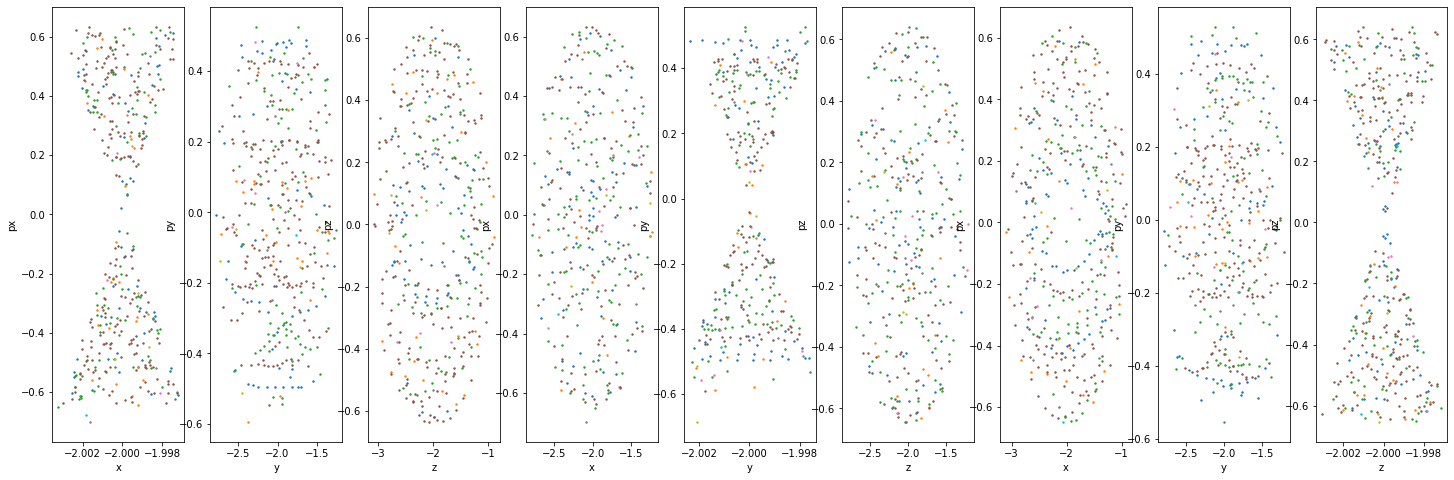

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

k = 1
f1 = lambda x: np.asarray([x[3],x[4],x[5]])
f2 = lambda x: np.asarray([k*(x[1]-x[0]), k*(x[0]+x[2]) - 2*k*x[1], -k*(x[2]-x[1])])
H = lambda x: 0.5*(x[3]**2 + x[4]**2 + x[5]**2) + 0.5* k *(x[1]-x[0])**2 + 0.5* k *(x[2]-x[1])**2 
px = lambda x: 2*(0.32 -  0.5*( + x[4]**2 + x[5]**2) - 0.5* k *(x[1]-x[0])**2 - 0.5* k *(x[2]-x[1])**2 )

def findcrossings(data):
    # returns indices in 1D data set where the data crossed 1. Useful for generating Poincare map at 0
    prb = list()
    for ii in range(len(data)-1):
        if (data[ii] > -2)&(data[ii+1] < -2):
            prb.append(ii)
        if (data[ii] < -2)& (data[ii+1] > -2):
            prb.append(ii)
    return np.array(prb)

fig, ax = plt.subplots(1,9,figsize = (25,8))
for inp in tqdm(range(200)): # number of trajectories
  inp = np.random.rand(6)*1.-0.5
  while px(inp)<0:
    inp = np.random.rand(6)*1.-0.5
  inp[3] = np.sqrt(px(inp))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=80000,n_h=1)
  for i in range(3):
    xcrossings = findcrossings(np.asarray(soln[0])[i,:])
    if len(xcrossings)>5:
      print("i = %s, Trajectories of the Coupled Oscillator (Stormer-Verlet), Hamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f, %.2f, %.2f,), Crossings = %s" %(i, H(inp), inp[0], inp[1], inp[2], inp[3], inp[4], inp[5], len(xcrossings)))
    yints = [.5*(np.asarray(soln[0])[0, cross] + np.asarray(soln[0])[0, cross+1]) for cross in xcrossings] # average y for each crossing
    pyints = [.5*(np.asarray(soln[0])[3, cross] + np.asarray(soln[0])[3, cross+1]) for cross in xcrossings] #average ydot for each crossing
    ax[i*3+0].scatter(yints, pyints, s=2)
    ax[i*3+0].set_xlabel("x")
    ax[i*3+0].set_ylabel("px")
    yints = [.5*(np.asarray(soln[0])[1, cross] + np.asarray(soln[0])[1, cross+1]) for cross in xcrossings] # average y for each crossing
    pyints = [.5*(np.asarray(soln[0])[4, cross] + np.asarray(soln[0])[4, cross+1]) for cross in xcrossings] #average ydot for each crossing
    ax[i*3+1].scatter(yints, pyints, s=2)
    ax[i*3+1].set_xlabel("y")
    ax[i*3+1].set_ylabel("py")
    yints = [.5*(np.asarray(soln[0])[2, cross] + np.asarray(soln[0])[2, cross+1]) for cross in xcrossings] # average y for each crossing
    pyints = [.5*(np.asarray(soln[0])[5, cross] + np.asarray(soln[0])[5, cross+1]) for cross in xcrossings] #average ydot for each crossing
    ax[i*3+2].scatter(yints, pyints, s=2)
    ax[i*3+2].set_xlabel("z")
    ax[i*3+2].set_ylabel("pz")
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

k = 1
f1 = lambda x: np.asarray([x[3],x[4],x[5]])
f2 = lambda x: np.asarray([k*(x[1]-x[0]), k*(x[0]+x[2]) - 2*k*x[1], -k*(x[2]-x[1])])
H = lambda x: 0.5*(x[3]**2 + x[4]**2 + x[5]**2) + 0.5* k *(x[1]-x[0])**2 + 0.5* k *(x[2]-x[1])**2 
px = lambda x: 2*(0.32 -  0.5*( + x[4]**2 + x[5]**2) - 0.5* k *(x[1]-x[0])**2 - 0.5* k *(x[2]-x[1])**2 )

np.random.seed(0)

for i in tqdm(range(50)):
  inp = np.random.rand(6)-0.5
  # while H(inp)>1/6:
  #   inp = np.random.rand(6)-0.5
  fig, ax = plt.subplots(1,2,figsize = (20,8))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=80000,n_h=1)
  ax[0].scatter(np.asarray(soln)[0][0,:]-np.asarray(soln)[0][1,:], np.asarray(soln)[0][1,:]-np.asarray(soln)[0][2,:], marker = '.', s=0.1)
  ax[1].scatter(np.asarray(soln)[0][3,:]-np.asarray(soln)[0][4,:], np.asarray(soln)[0][4,:]-np.asarray(soln)[0][5,:], marker = '.', s=0.1)
  fig.suptitle("Trajectories of the Coupled Oscillator (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3], inp[4], inp[5]))
  ax[0].set_xlabel("x-y")
  ax[0].set_ylabel("y-z")
  ax[1].set_xlabel("px-py")
  ax[1].set_ylabel("py-pz")
  plt.show()



Output hidden; open in https://colab.research.google.com to view.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

k = 1
f1 = lambda x: np.asarray([x[3],x[4],x[5]])
f2 = lambda x: np.asarray([k*(x[1]-x[0]), k*(x[0]+x[2]) - 2*k*x[1], -k*(x[2]-x[1])])
H = lambda x: 0.5*(x[3]**2 + x[4]**2 + x[5]**2) + 0.5* k *(x[1]-x[0])**2 + 0.5* k *(x[2]-x[1])**2 
px = lambda x: 2*(0.32 -  0.5*( + x[4]**2 + x[5]**2) - 0.5* k *(x[1]-x[0])**2 - 0.5* k *(x[2]-x[1])**2 )

def findcrossings(data):
    # returns indices in 1D data set where the data crossed zero. Useful for generating Poincare map at 0
    prb = list()
    for ii in range(len(data)-1):
        if (data[ii] > 0)&(data[ii+1] < 0):
            prb.append(ii)
        if (data[ii] < 0)& (data[ii+1] > 0):
            prb.append(ii)
    return np.array(prb)

for inp in tqdm(range(50)): # number of trajectories
  fig, ax = plt.subplots(1,3,figsize = (25,8))
  inp = np.random.rand(6)*1.-0.5
  while px(inp)<0:
    inp = np.random.rand(6)*1.-0.5
  inp[3] = np.sqrt(px(inp))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=80000,n_h=1)
  xcrossings = findcrossings(np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])
  print(inp, i, len(xcrossings))
  yints = [.5*((np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross] + (np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross] + (np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[0].scatter(yints, pyints)
  ax[0].set_xlabel("x-y")
  ax[0].set_ylabel("px-py")
  yints = [.5*((np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross] + (np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross] + (np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[1].scatter(yints, pyints)
  ax[1].set_xlabel("y-z")
  ax[1].set_ylabel("py-pz")
  yints = [.5*((np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross] + (np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross] + (np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[2].scatter(yints, pyints)
  ax[2].set_xlabel("z-x")
  ax[2].set_ylabel("pz-px")
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

  0%|          | 0/50 [00:00<?, ?it/s]

[-0.12808125 -0.49861665 -0.25231498  0.81950945  0.35877747 -0.04149683] 49 274


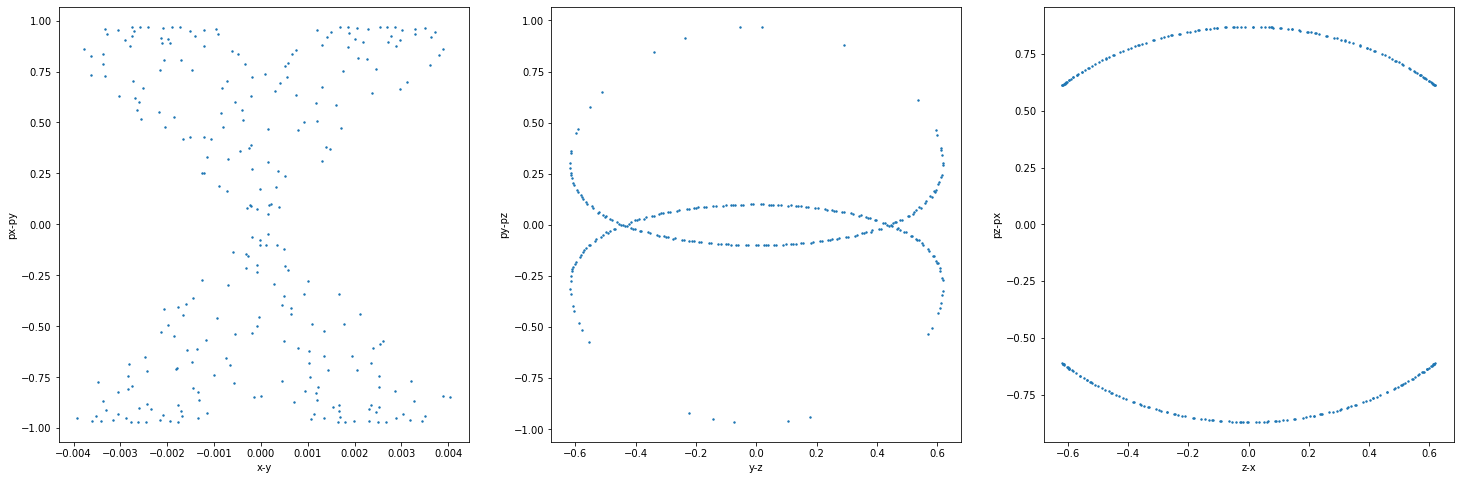

  2%|▏         | 1/50 [00:11<09:17, 11.38s/it]

[-0.05541271 -0.16389773  0.38067812  0.6591808   0.49189033 -0.12325873] 49 294


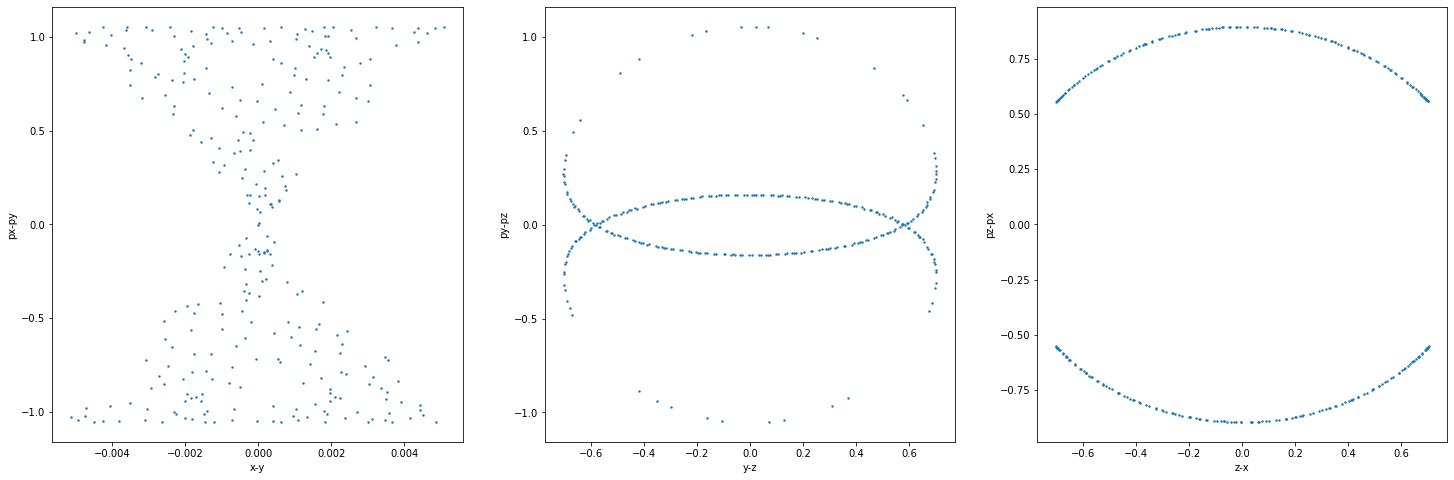

  4%|▍         | 2/50 [00:22<08:57, 11.19s/it]

[ 0.46614745  0.29187957  0.17568915  0.87419103 -0.28354274 -0.33395218] 49 254


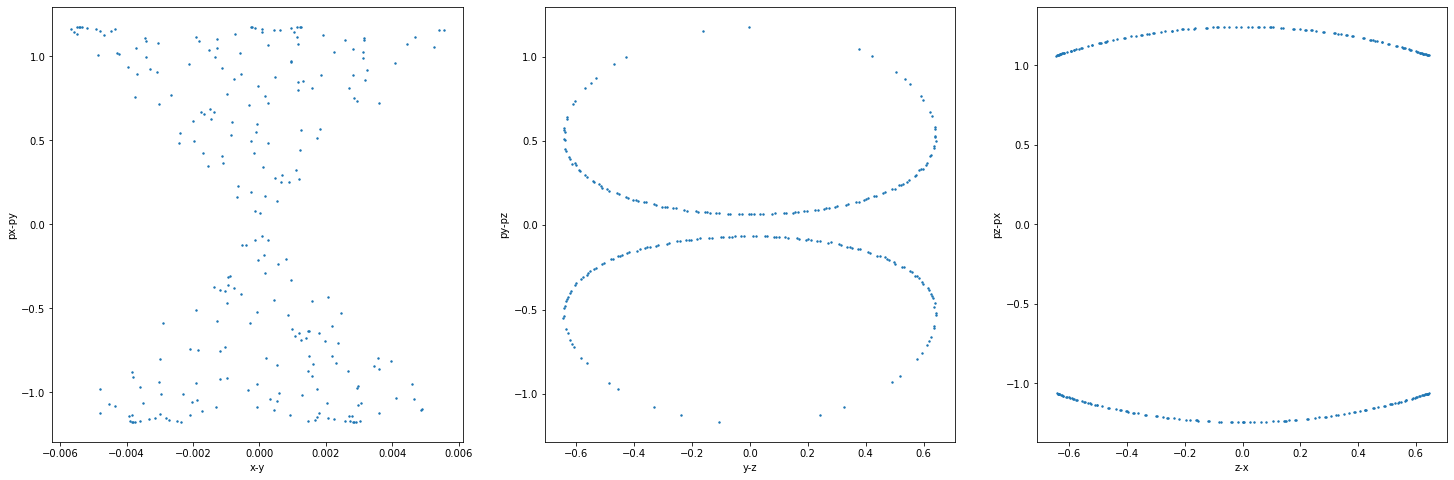

  6%|▌         | 3/50 [00:33<08:43, 11.13s/it]

[ 0.42275661 -0.20592334 -0.04690575  0.61935272  0.2781716   0.34423496] 49 441


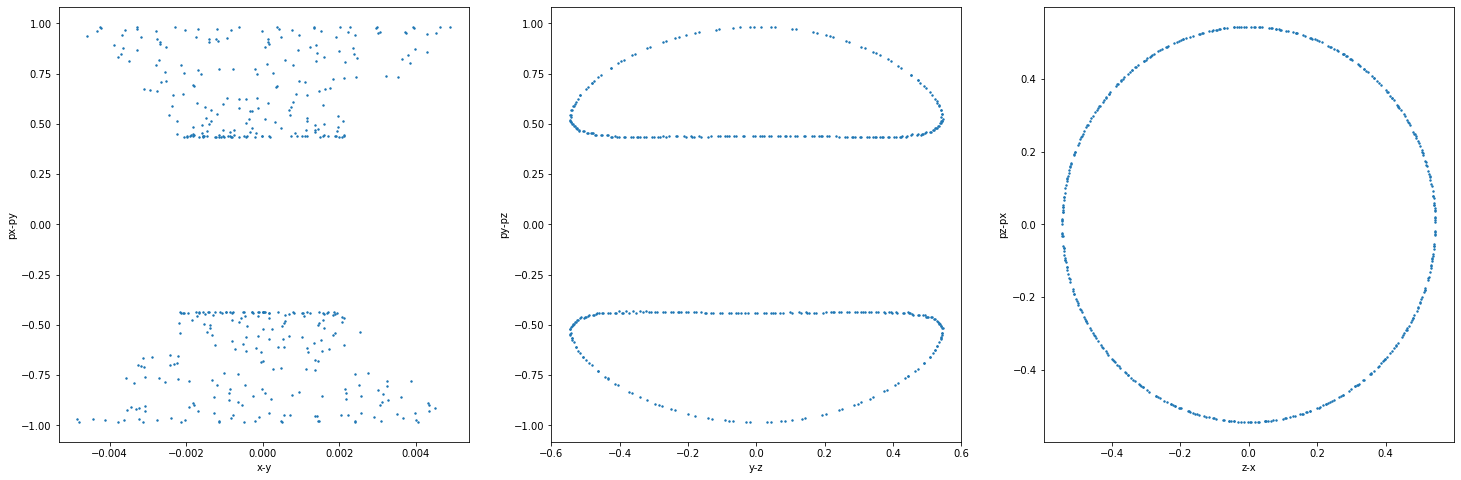

  8%|▊         | 4/50 [00:44<08:36, 11.22s/it]

[-0.3609273  -0.07309564  0.34285489  0.68409858 -0.39758624 -0.34361665] 49 255


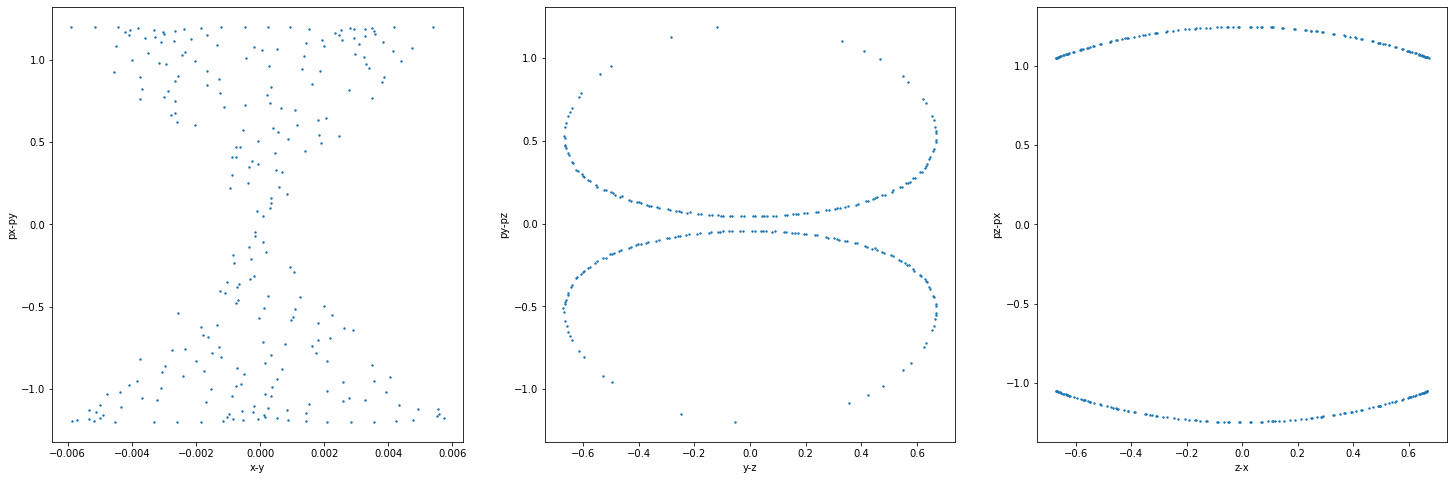

 10%|█         | 5/50 [00:56<08:23, 11.19s/it]

[-0.19580131 -0.42464093 -0.075337    0.86990354  0.06821759 -0.25344306] 49 254


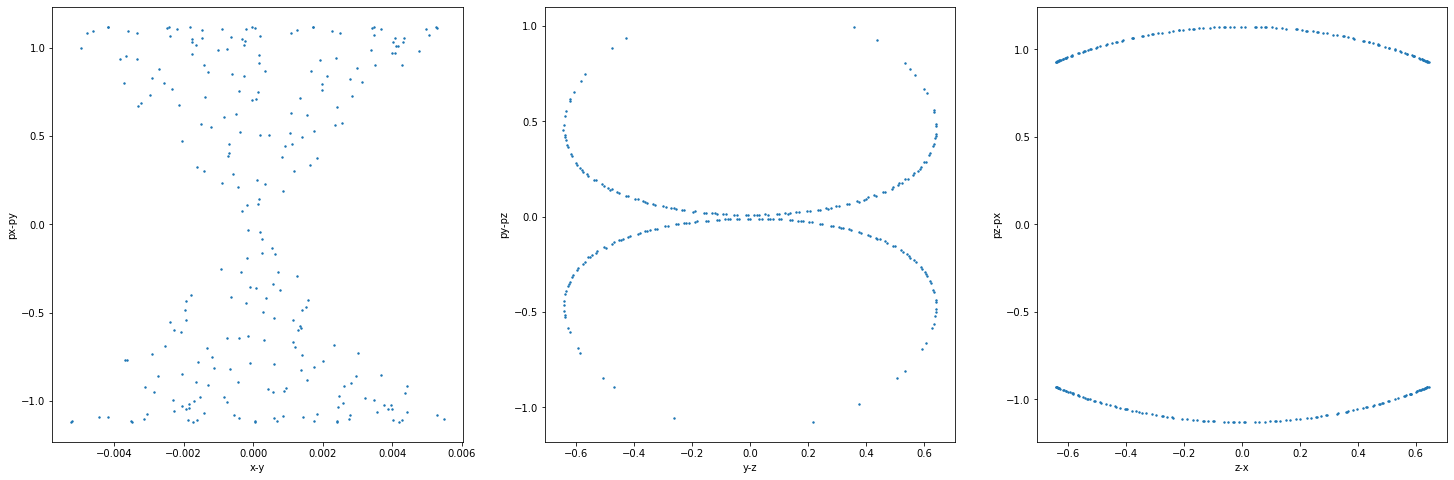

 12%|█▏        | 6/50 [01:06<08:07, 11.08s/it]

[-0.24960179 -0.01660646 -0.4600072   0.85186352 -0.09169709 -0.12259343] 49 323


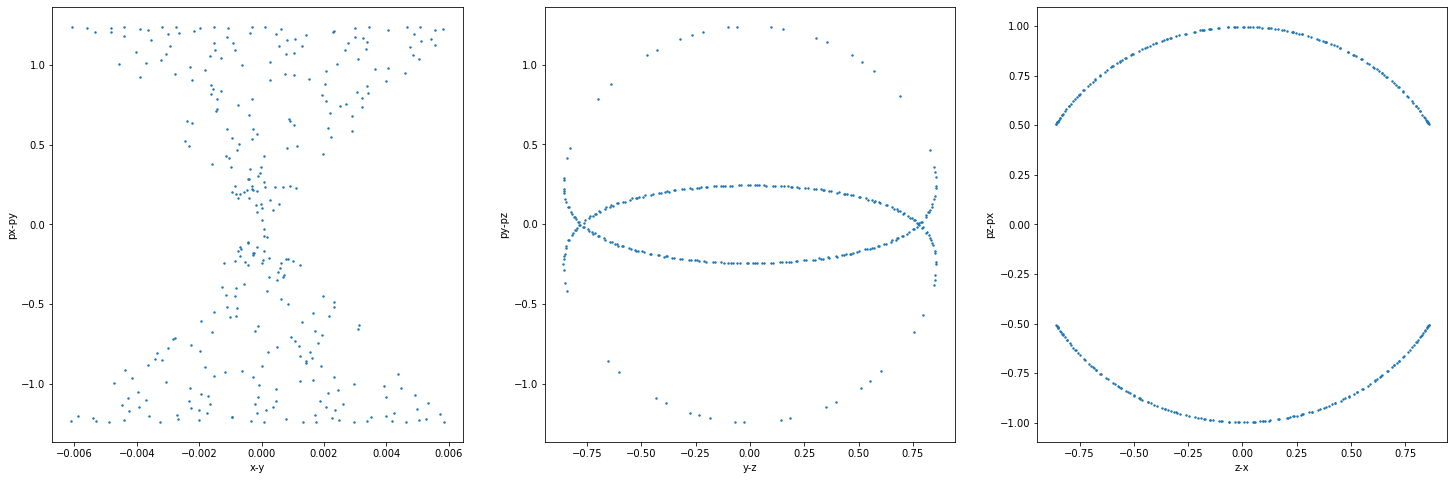

 14%|█▍        | 7/50 [01:18<07:58, 11.13s/it]

[0.30936497 0.20903546 0.45433382 0.83596661 0.39754276 0.26996719] 49 264


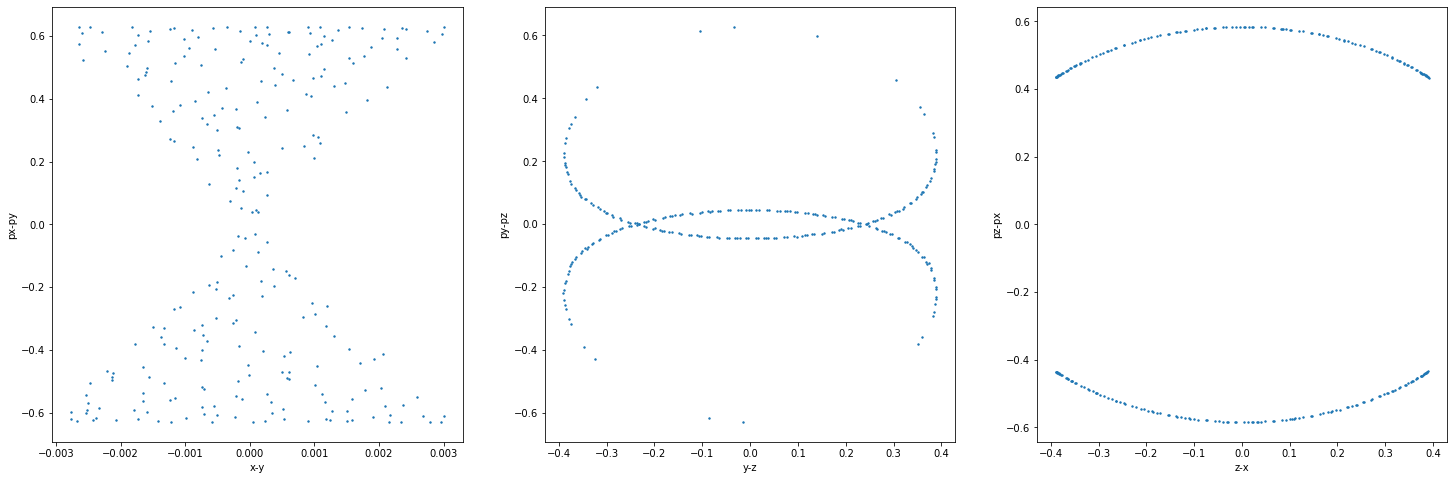

 16%|█▌        | 8/50 [01:29<07:54, 11.29s/it]

[-0.14257535  0.12166544 -0.21143004  0.7657138  -0.38757268 -0.28756564] 49 335


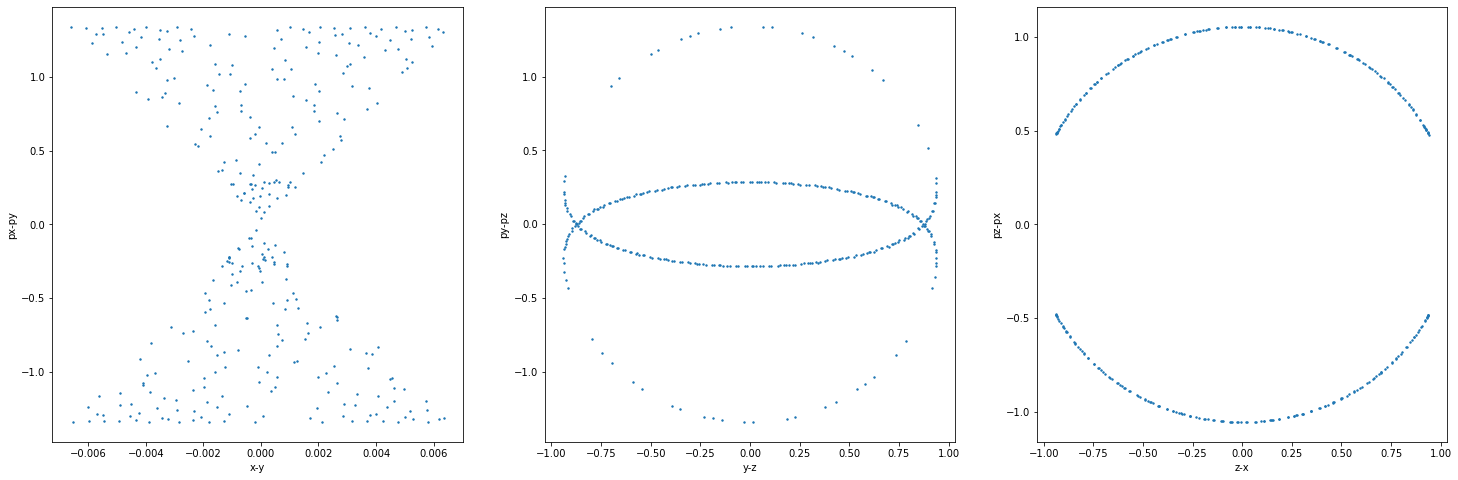

 18%|█▊        | 9/50 [01:41<07:43, 11.31s/it]

[-0.31696671 -0.096974    0.24523296  0.76478193 -0.01232368 -0.49945404] 49 255


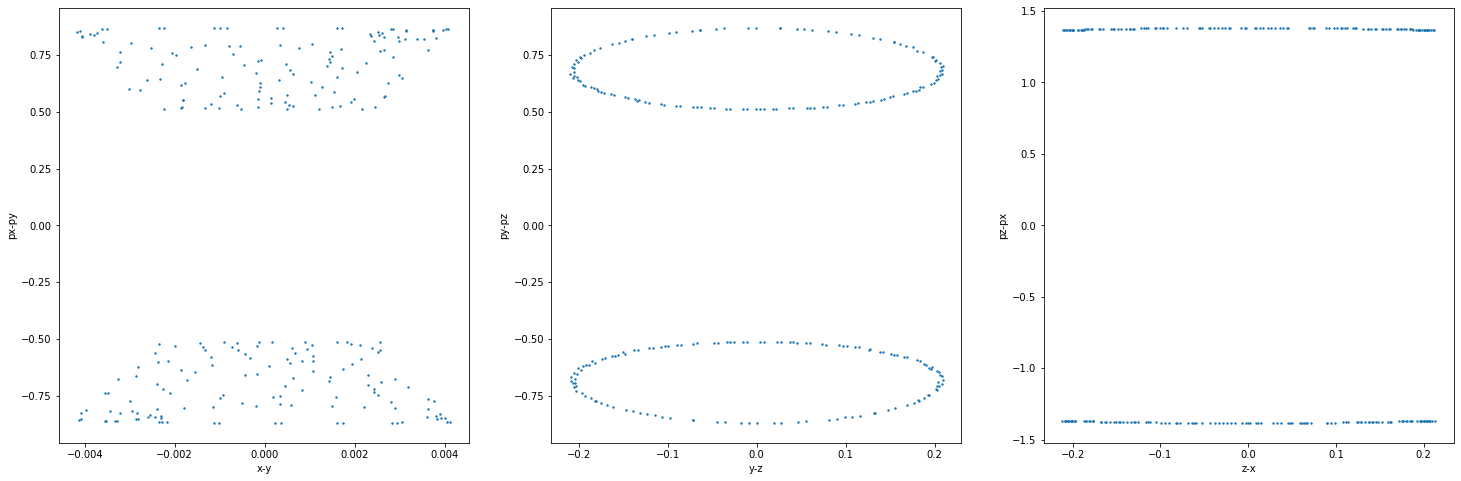

 20%|██        | 10/50 [01:52<07:28, 11.21s/it]

[-0.07459827 -0.43644623 -0.29174675  0.79920215 -0.2846018   0.35833764] 49 441


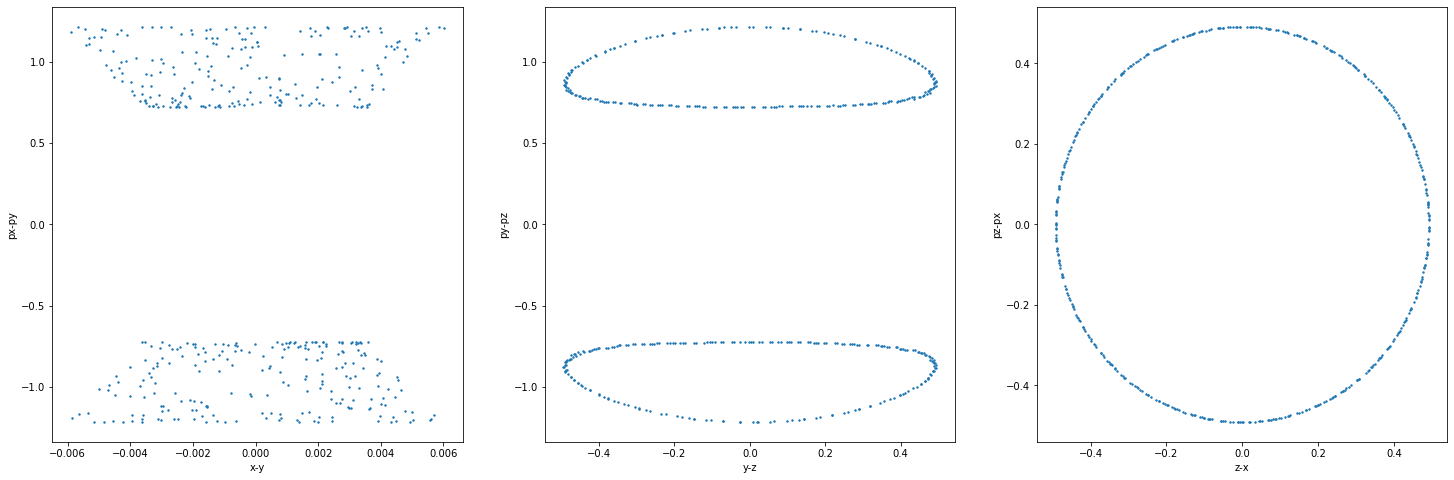

 22%|██▏       | 11/50 [02:03<07:17, 11.21s/it]

[ 0.30289337 -0.34085376  0.10571196  0.56155124  0.22788816  0.13746228] 49 441


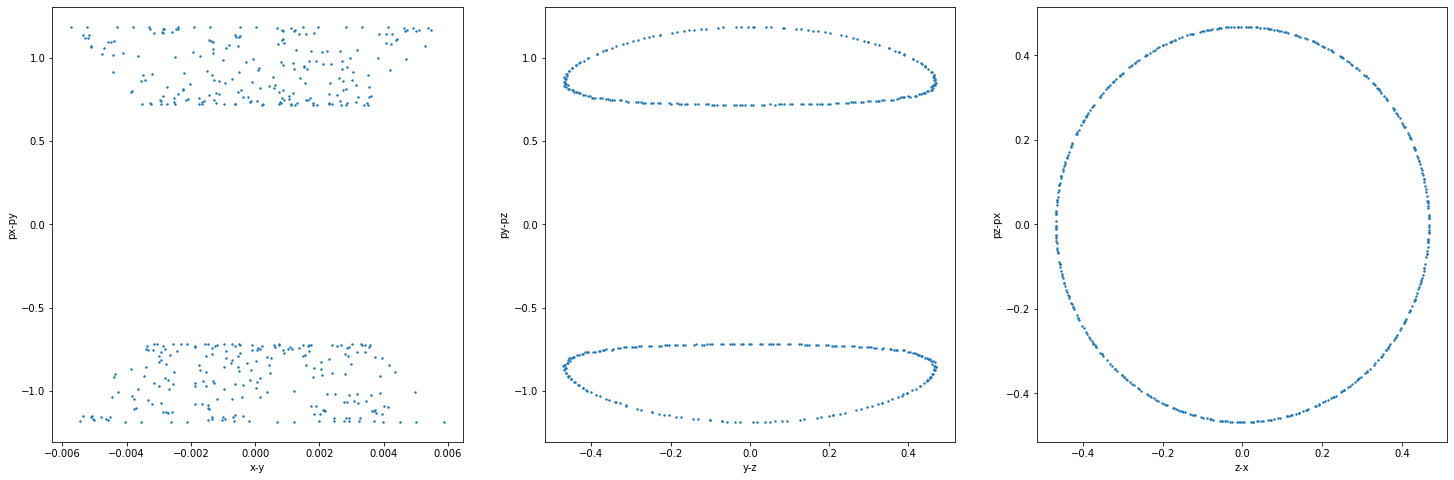

 24%|██▍       | 12/50 [02:14<07:11, 11.35s/it]

[ 0.31193856 -0.02061545  0.41486309  0.78142402 -0.20711143  0.2150526 ] 49 441


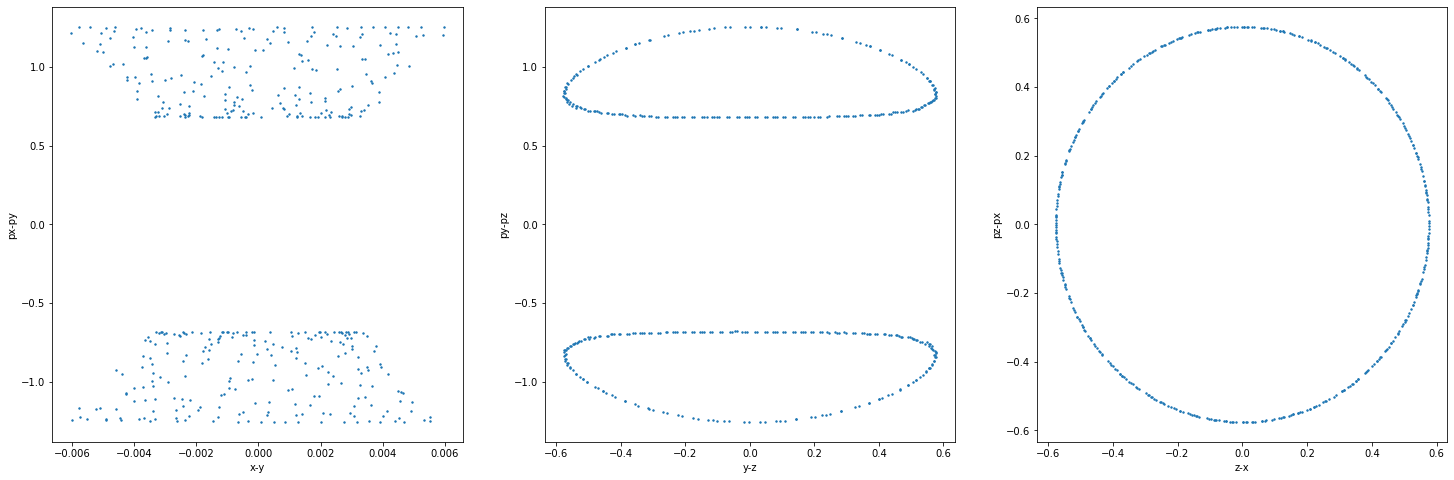

 26%|██▌       | 13/50 [02:26<06:59, 11.35s/it]

[-0.08189079 -0.32704865 -0.39278925  0.88809554 -0.02685702  0.38228367] 49 441


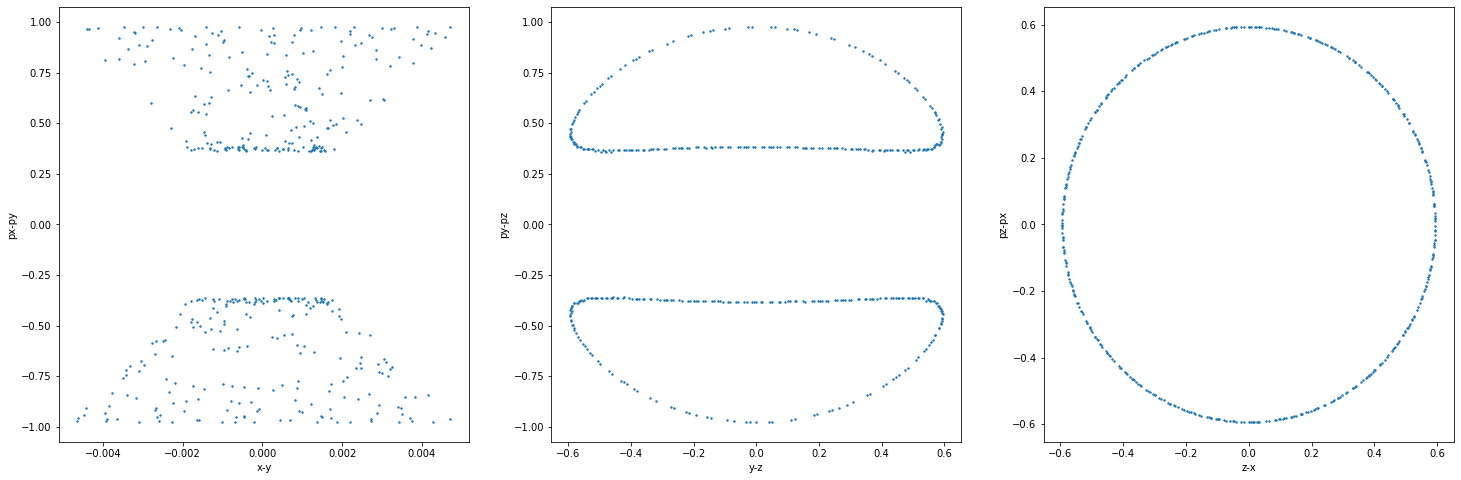

 28%|██▊       | 14/50 [02:37<06:45, 11.26s/it]

[ 0.23328913 -0.09027379 -0.12648899  0.82844838  0.38905995  0.23727858] 49 254


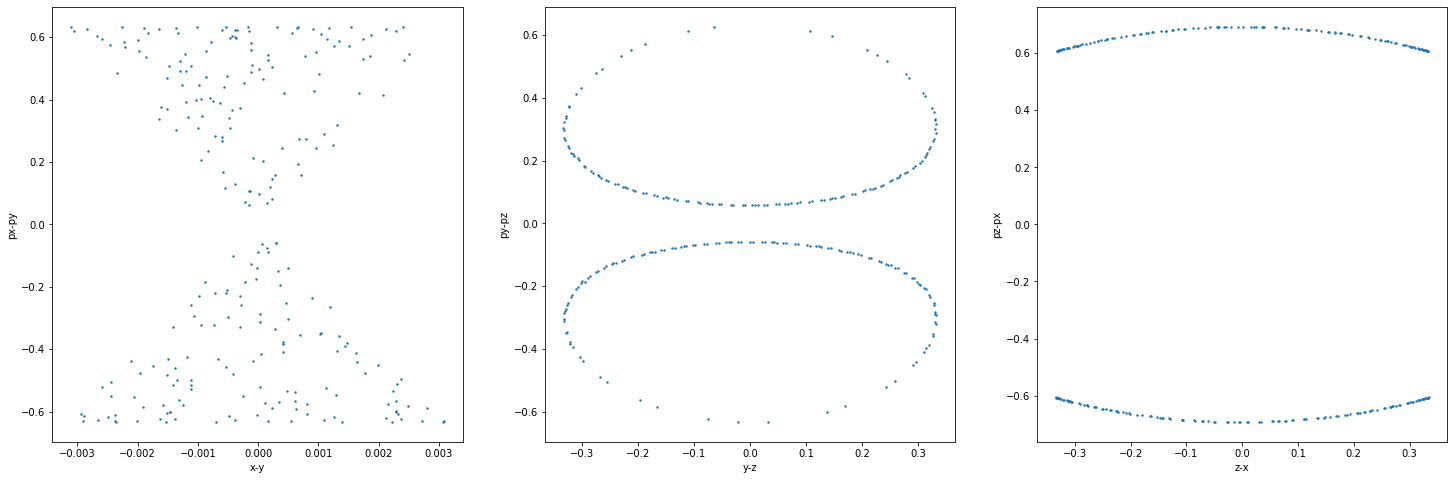

 30%|███       | 15/50 [02:48<06:30, 11.17s/it]

[-0.49484704  0.19415785  0.41950741  0.60818823 -0.32299422 -0.01648187] 49 291


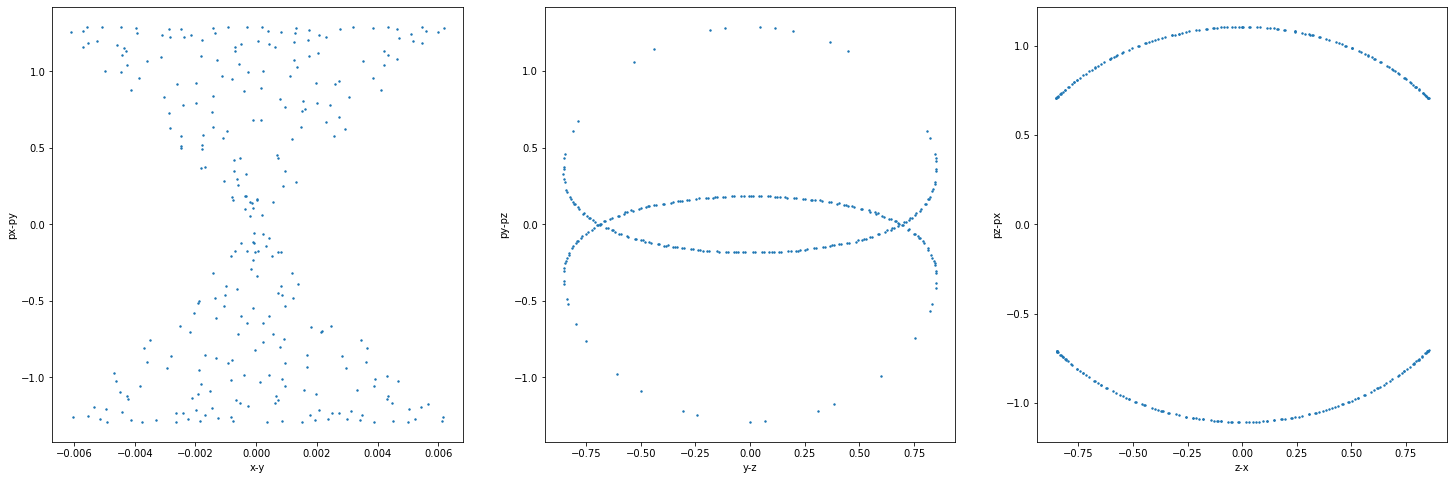

 32%|███▏      | 16/50 [02:59<06:20, 11.18s/it]

[-0.35968398 -0.14100472  0.43711704  0.73829301 -0.21716315 -0.16036896] 49 255


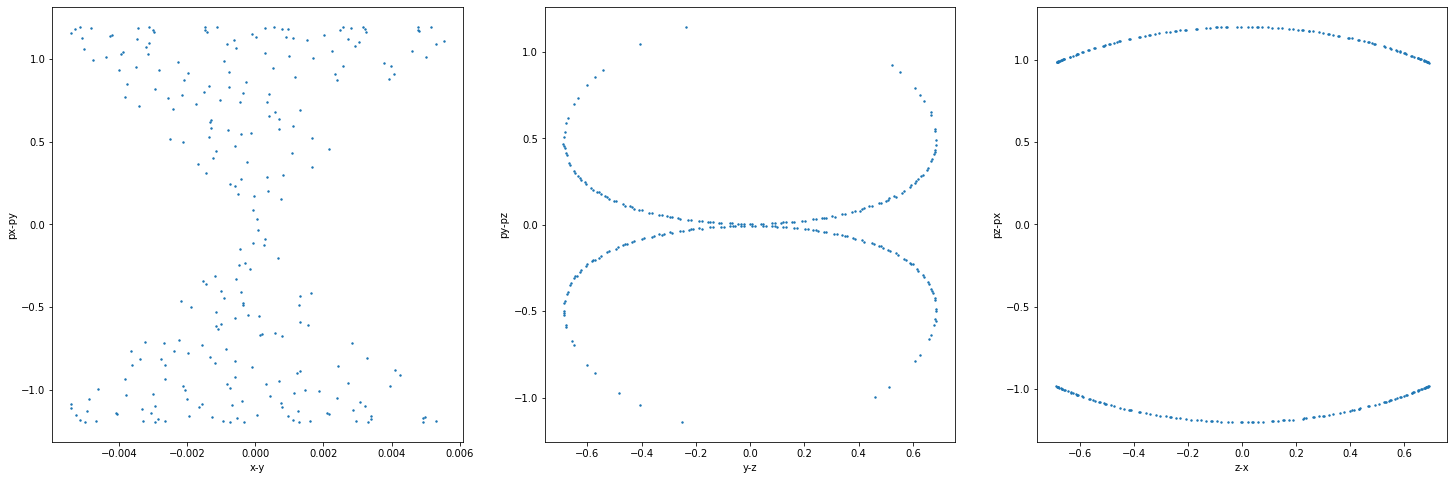

 34%|███▍      | 17/50 [03:10<06:10, 11.24s/it]

[ 0.10021287  0.4631973  -0.35219867  0.25250999  0.37355683 -0.00810777] 49 441


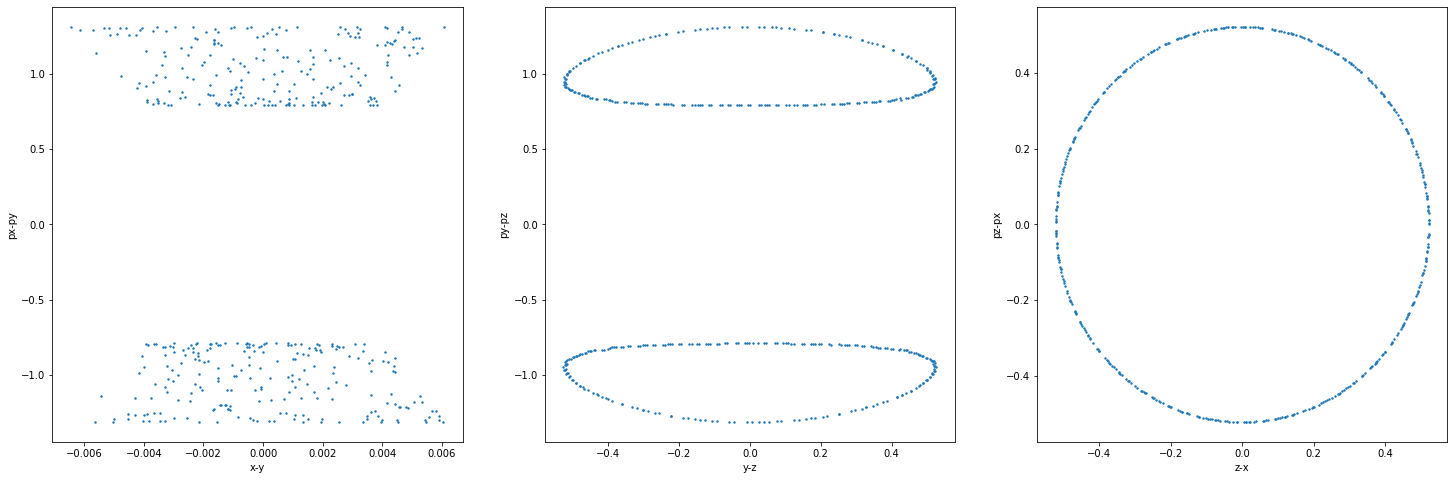

 36%|███▌      | 18/50 [03:22<06:00, 11.26s/it]

[ 0.39896109 -0.3144821   0.03266859  0.57793297 -0.18345744 -0.05312304] 49 441


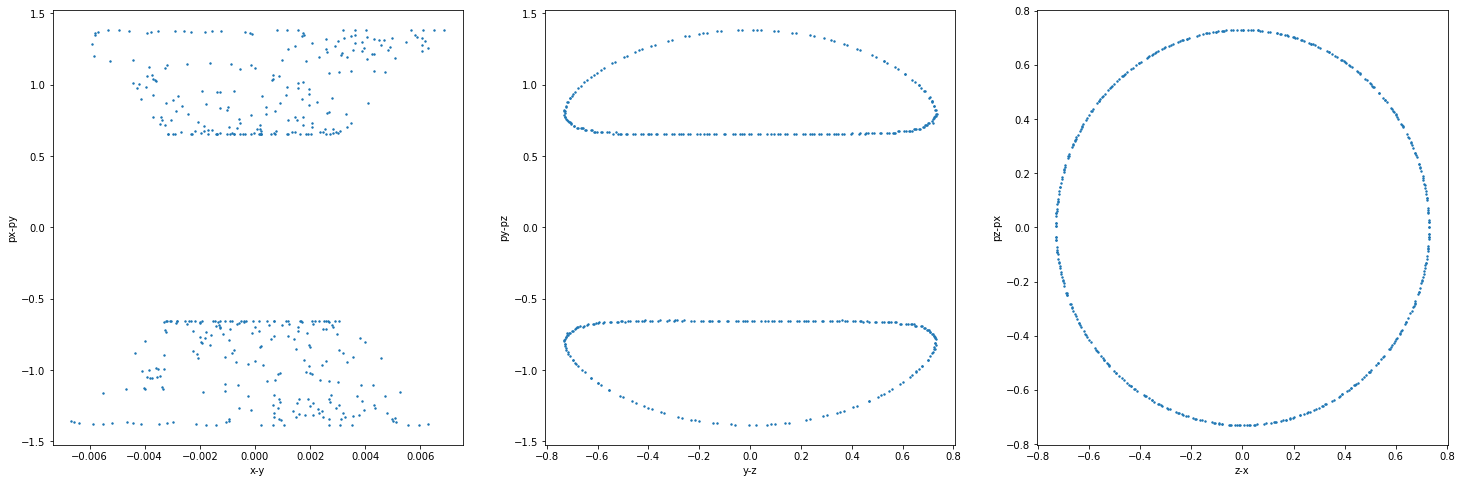

 38%|███▊      | 19/50 [03:33<05:48, 11.25s/it]

[-0.06692255 -0.14265312  0.41497077  0.76642448  0.22754699 -0.21008655] 49 254


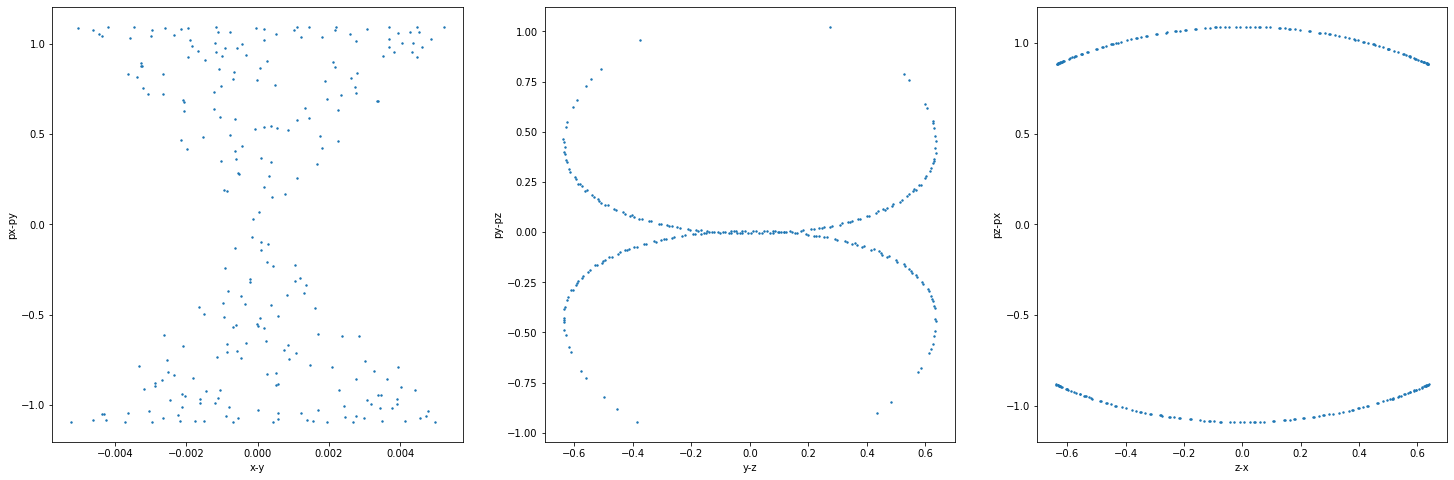

 40%|████      | 20/50 [03:44<05:34, 11.16s/it]

[0.07770942 0.27917943 0.29559037 0.91111061 0.27087276 0.2358939 ] 49 255


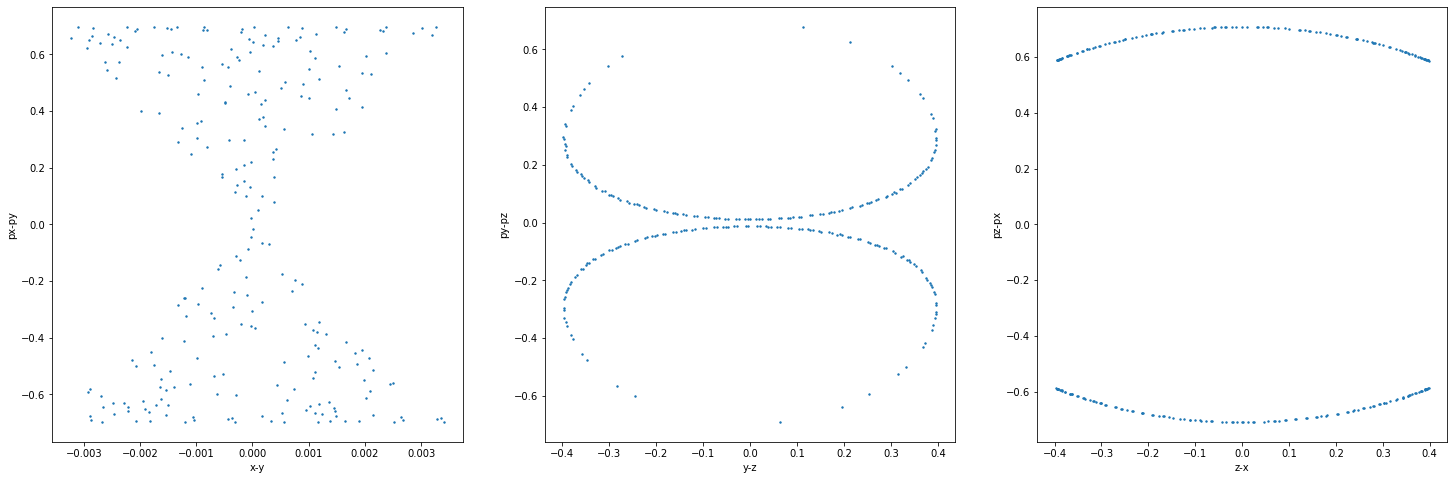

 42%|████▏     | 21/50 [03:55<05:22, 11.13s/it]

[-0.35849351  0.36594547 -0.05867853  0.53629637 -0.05163082  0.067846  ] 49 441


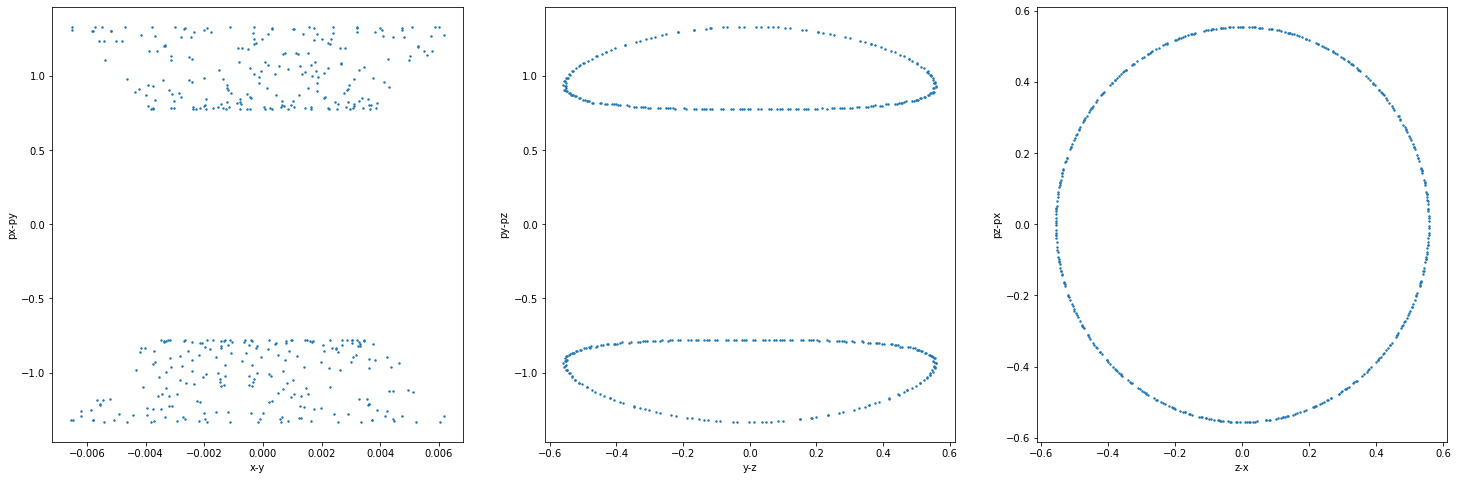

 44%|████▍     | 22/50 [04:06<05:11, 11.13s/it]

[ 0.12116925 -0.00182043  0.36678854  0.91232902 -0.09857205 -0.08330824] 49 284


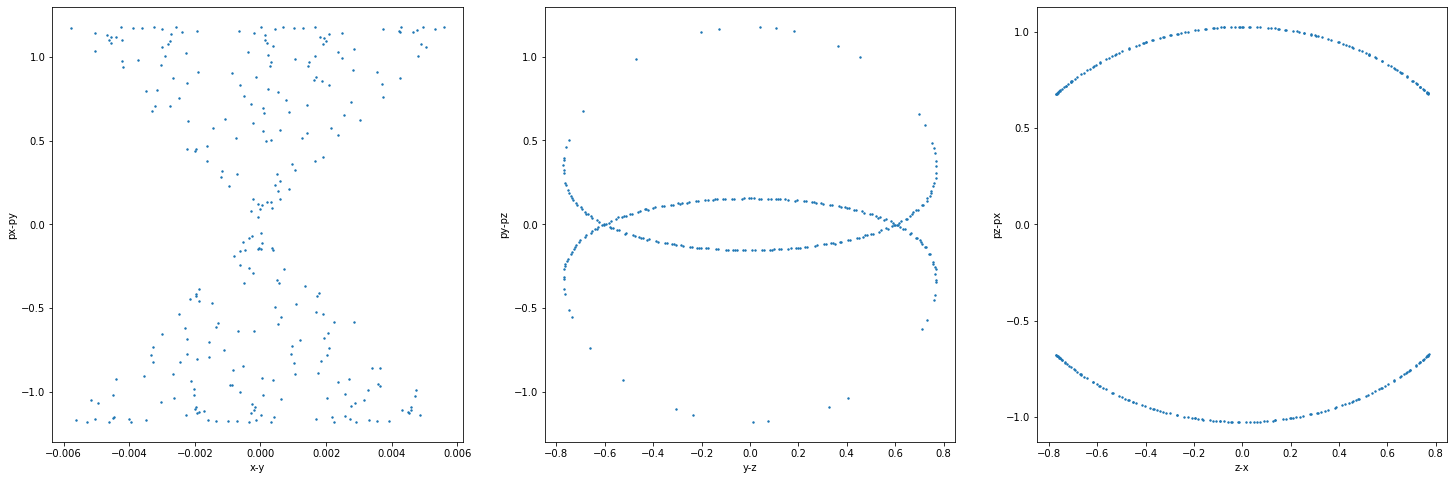

 46%|████▌     | 23/50 [04:17<04:59, 11.11s/it]

[ 0.31083862 -0.15180806 -0.2885452   0.67132979  0.37602685  0.41854645] 49 255


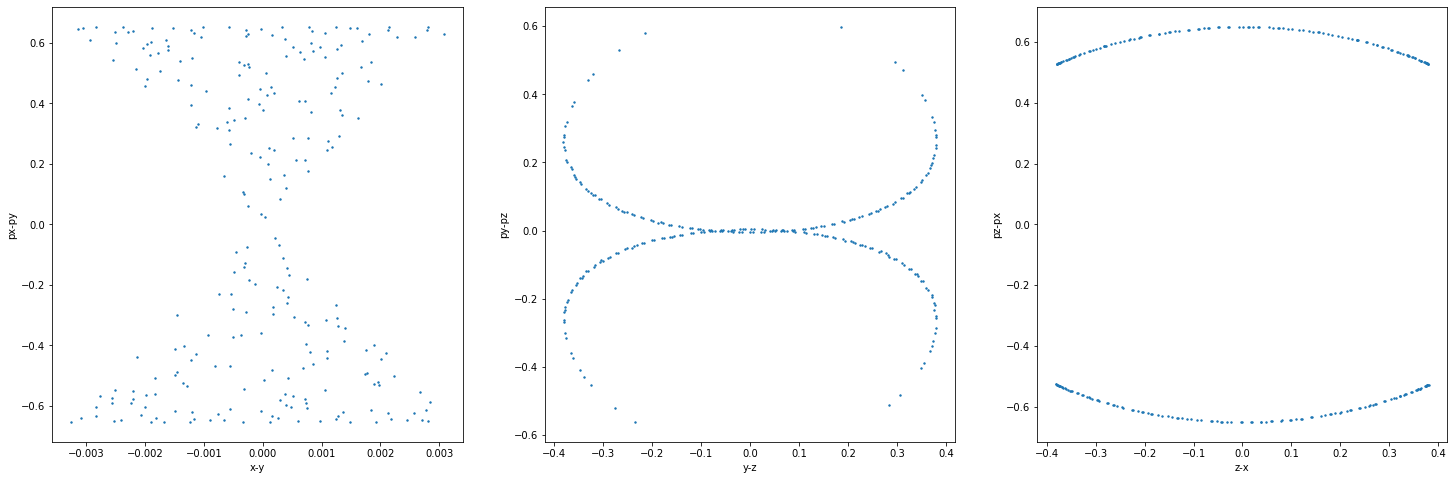

 48%|████▊     | 24/50 [04:29<04:53, 11.31s/it]

[-0.37987982 -0.16552626 -0.32462793  0.75662939  0.39986674 -0.44312274] 49 255


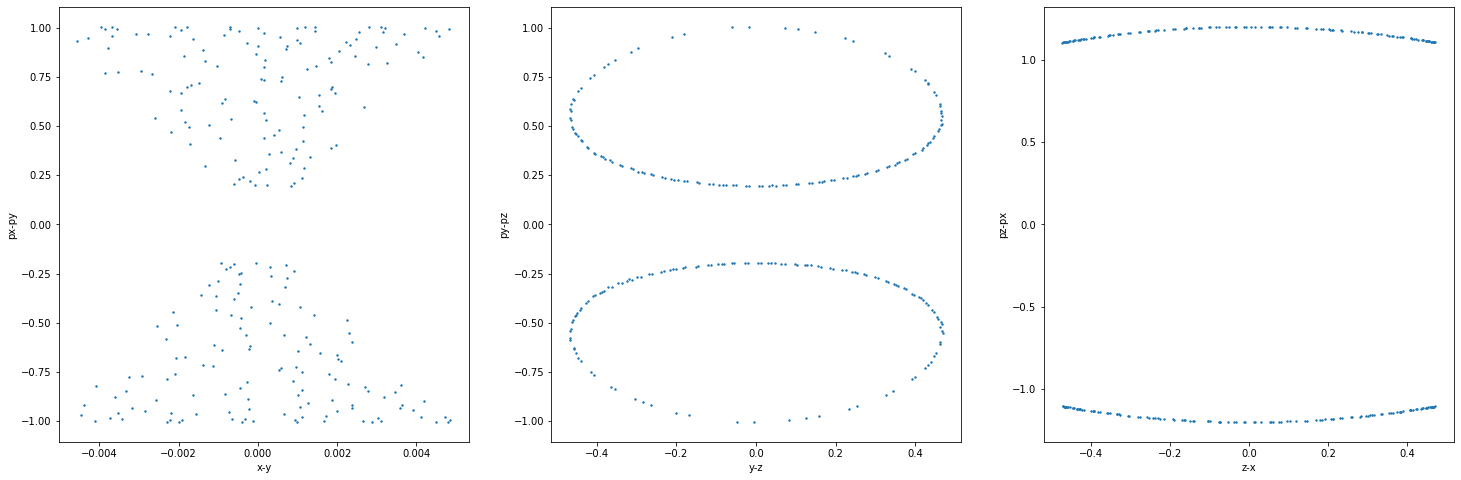

 50%|█████     | 25/50 [04:40<04:40, 11.23s/it]

[ 0.25736414 -0.1854267   0.15731892  0.72477899 -0.01503435  0.40116217] 49 441


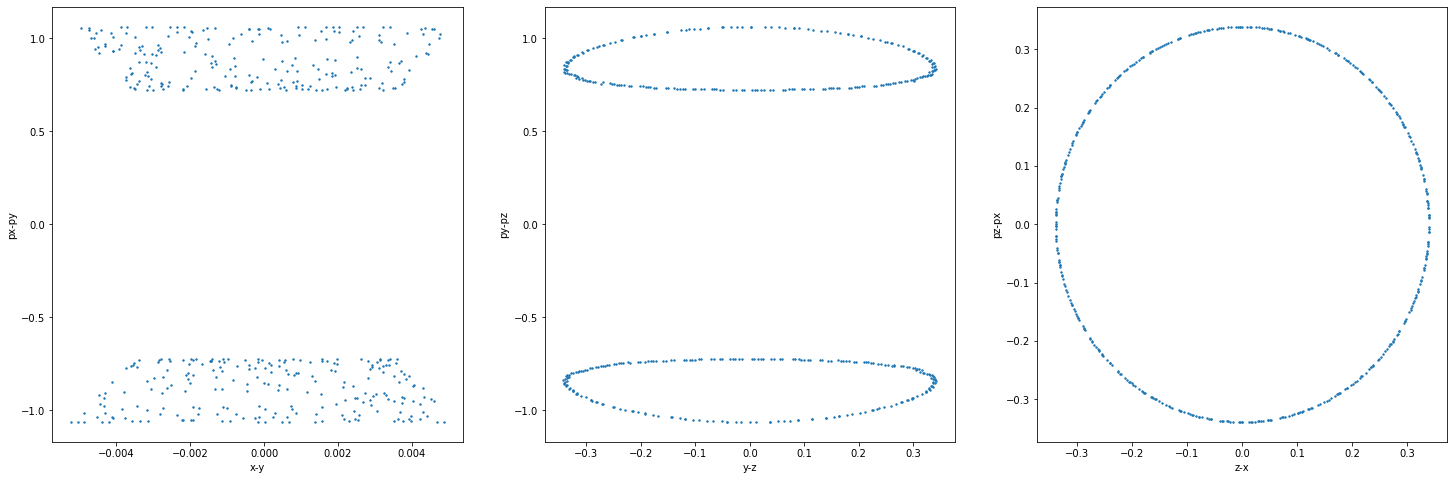

 52%|█████▏    | 26/50 [04:51<04:28, 11.20s/it]

[ 0.05464506  0.3268616   0.22557353  0.87228856  0.27311005 -0.28312975] 49 255


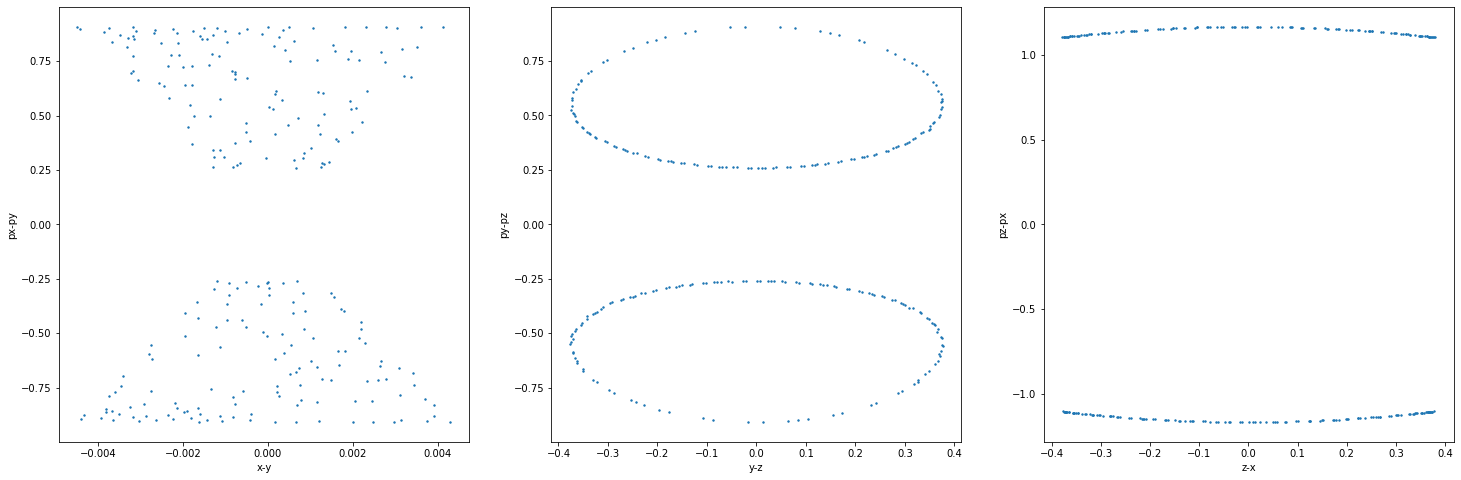

 54%|█████▍    | 27/50 [05:02<04:17, 11.21s/it]

[ 0.40314965 -0.45707581 -0.16692797  0.26984466 -0.02441088  0.32002244] 49 441


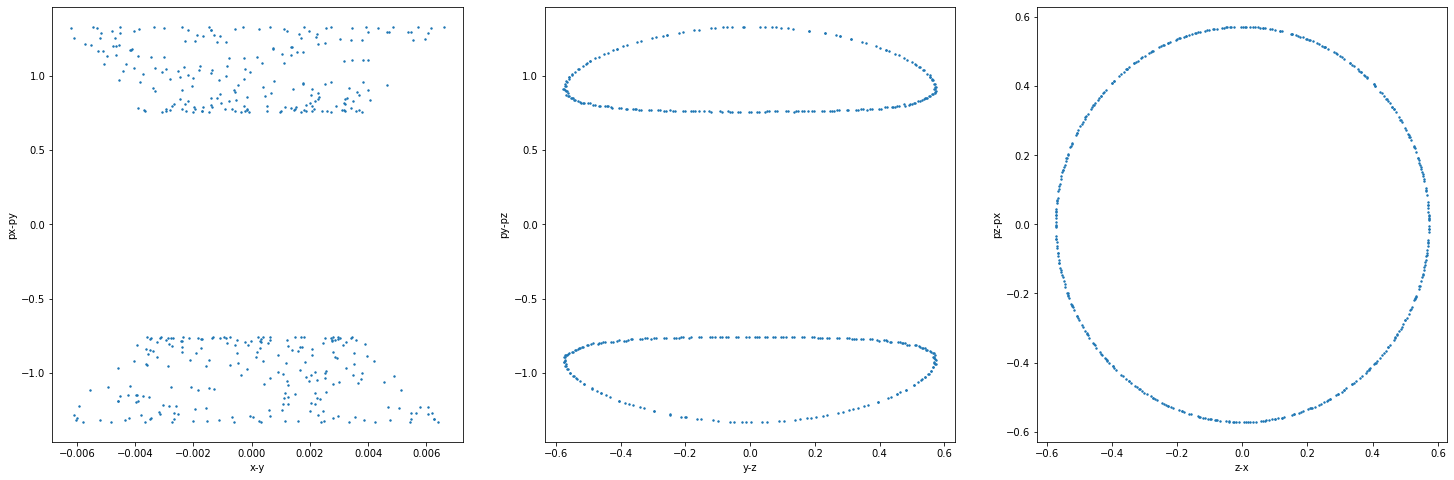

 56%|█████▌    | 28/50 [05:14<04:06, 11.22s/it]

[-0.20181264 -0.3490651  -0.16973296  0.86168542 -0.35961604 -0.27263755] 49 276


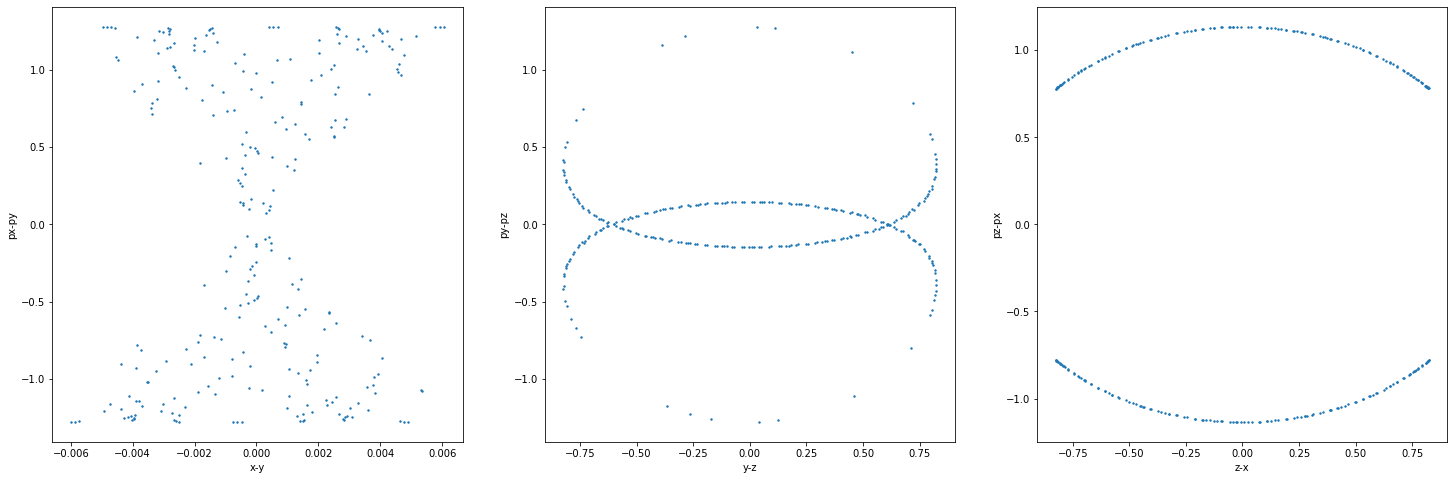

 58%|█████▊    | 29/50 [05:25<03:56, 11.25s/it]

[-0.43114804  0.20571004 -0.10476676  0.65062668  0.21862639 -0.16402246] 49 441


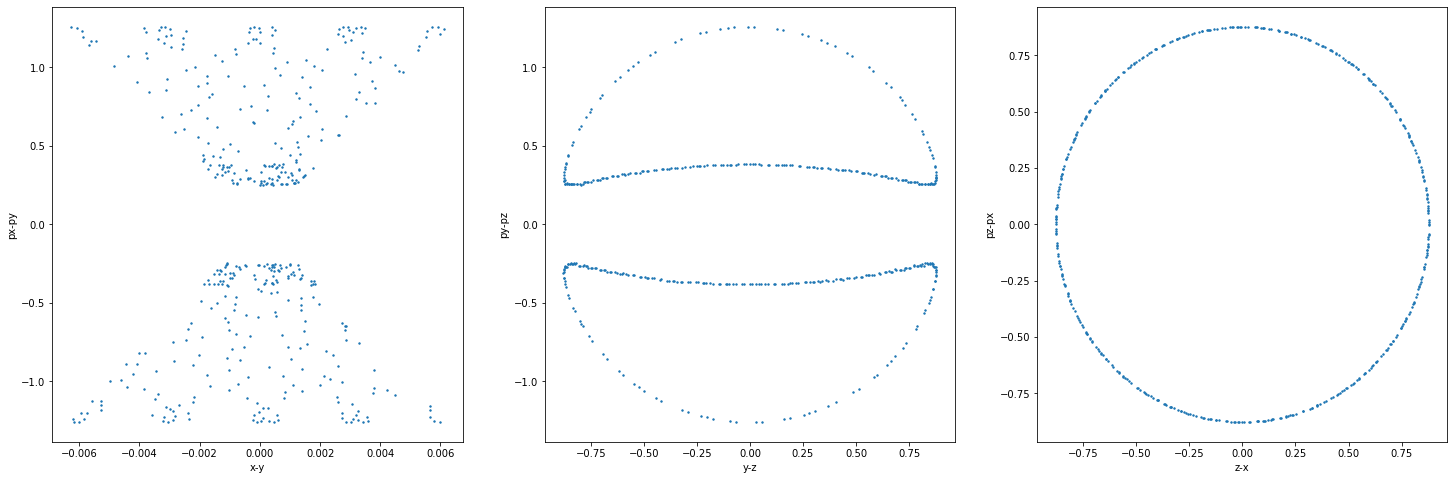

 60%|██████    | 30/50 [05:36<03:45, 11.25s/it]

[ 0.22777127  0.3151994  -0.28233716  0.69105478 -0.33764205 -0.20915909] 49 353


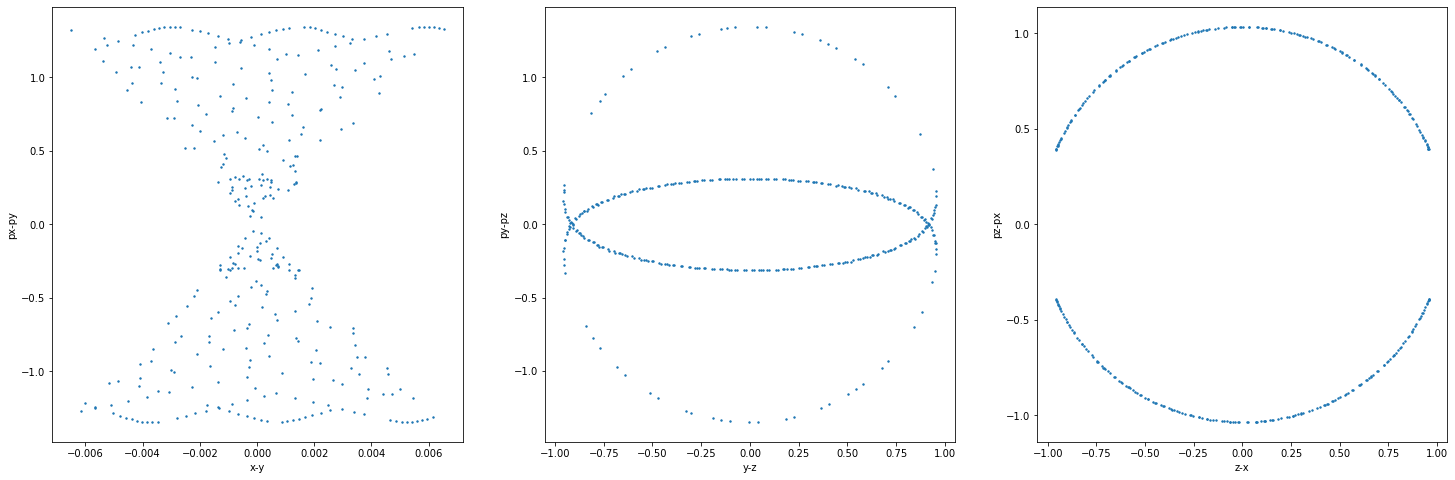

 62%|██████▏   | 31/50 [05:47<03:32, 11.18s/it]

[-0.32020471 -0.15449434 -0.01993911  0.82324241  0.35360604  0.38944791] 49 255


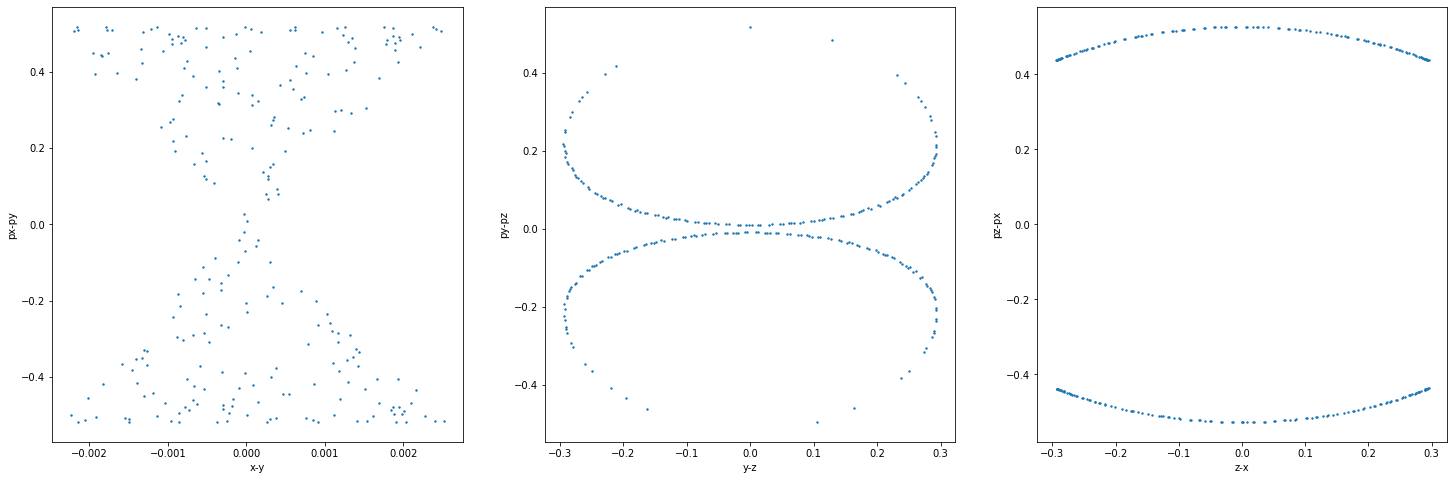

 64%|██████▍   | 32/50 [05:58<03:20, 11.14s/it]

[-0.27989614  0.12289403 -0.38850394  0.71483903 -0.17766646 -0.18349925] 49 441


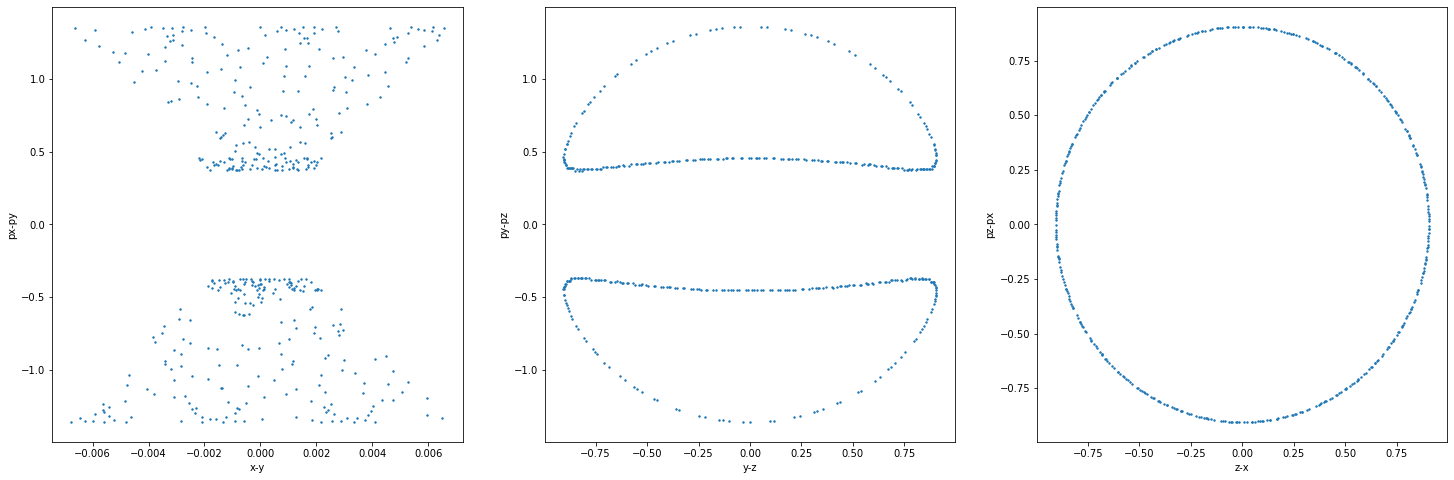

 66%|██████▌   | 33/50 [06:10<03:10, 11.21s/it]

[-0.01741576  0.22982764 -0.43081734  0.585345    0.23481377 -0.32350061] 49 347


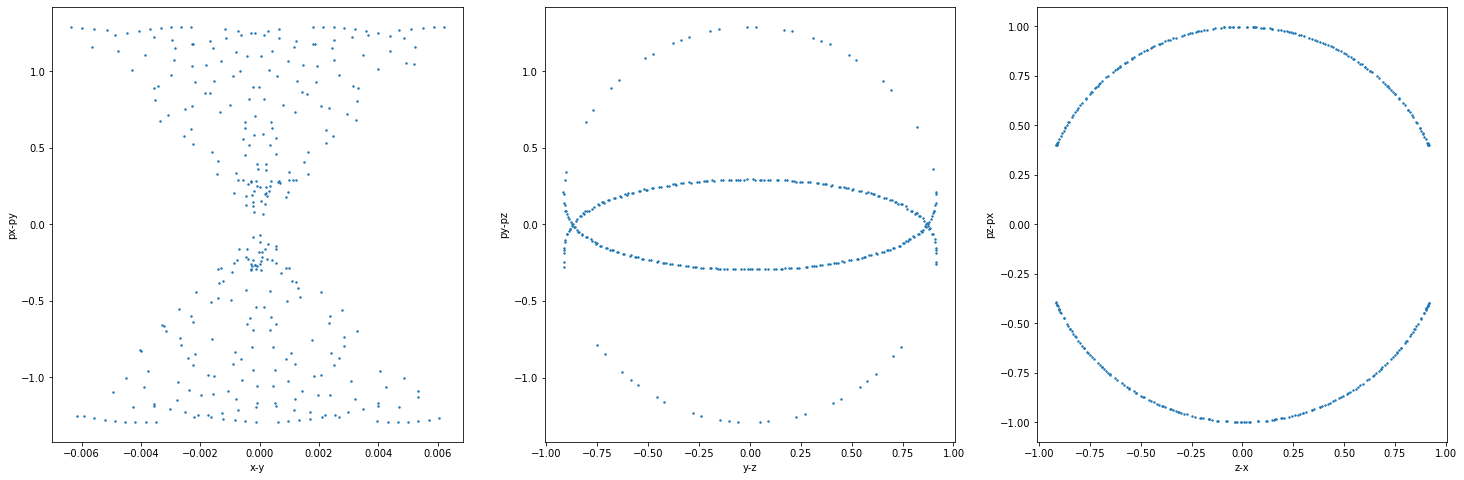

 68%|██████▊   | 34/50 [06:21<03:00, 11.28s/it]

[ 0.43916091  0.00631222  0.49980858  0.7238017   0.0349082  -0.20975196] 49 441


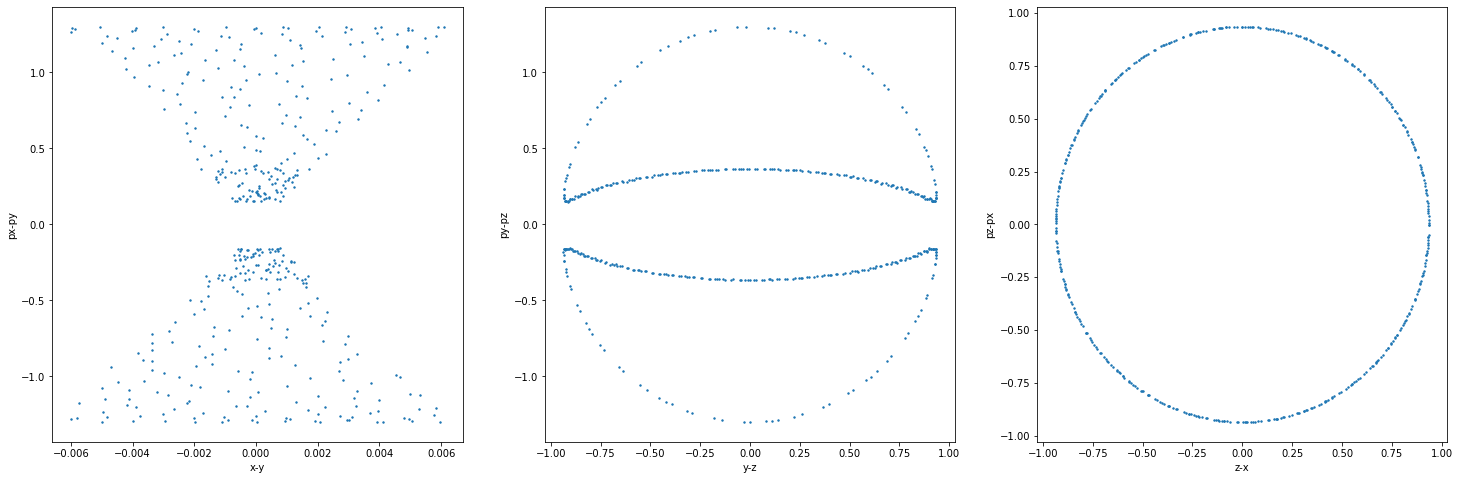

 70%|███████   | 35/50 [06:32<02:49, 11.29s/it]

[-0.19582644  0.09106538  0.42171907  0.86874043  0.2239414   0.05917378] 49 255


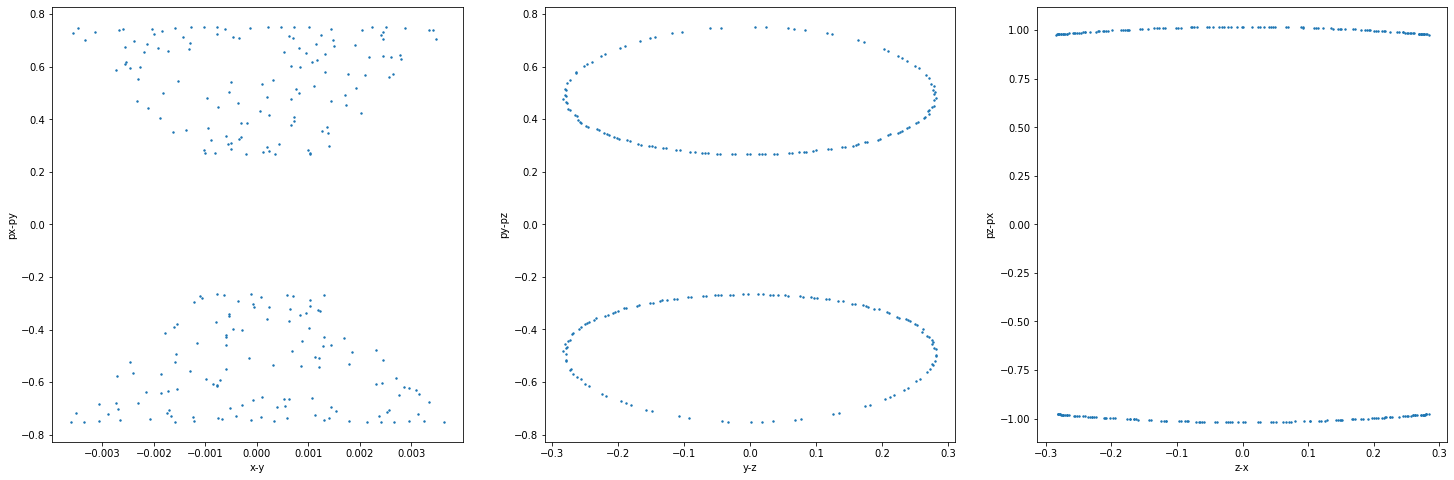

 72%|███████▏  | 36/50 [06:43<02:37, 11.24s/it]

[ 0.4222985  -0.00763859  0.37383218  0.71706393 -0.28616465  0.27122546] 49 441


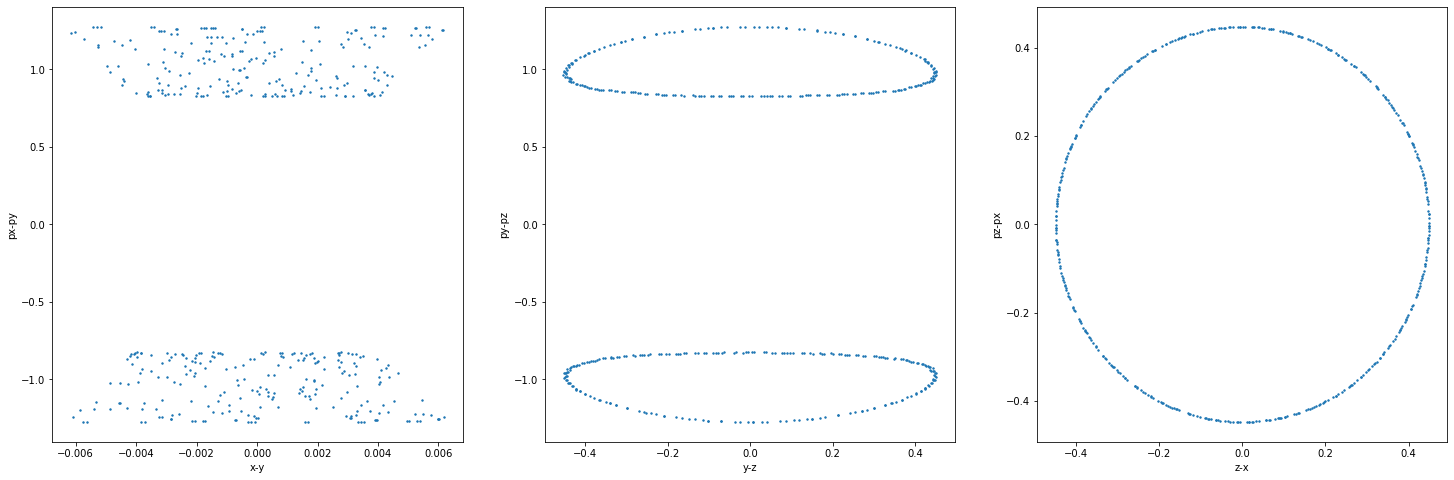

 74%|███████▍  | 37/50 [06:55<02:25, 11.20s/it]

[-0.48782884 -0.17717046 -0.27043256  0.82269668  0.23685316 -0.40232363] 49 255


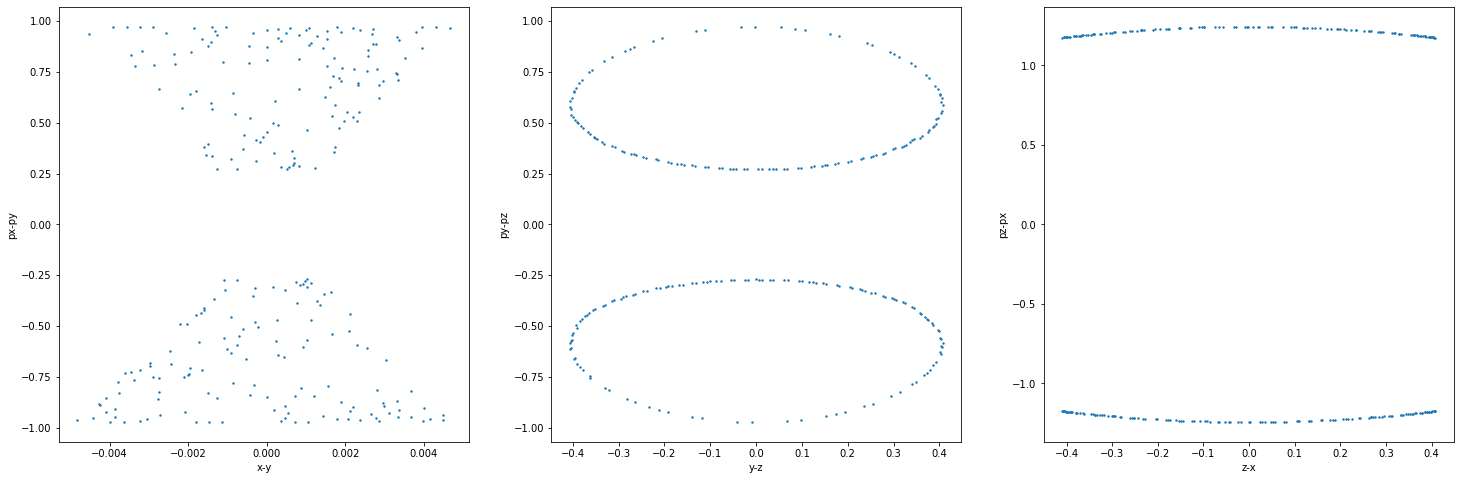

 76%|███████▌  | 38/50 [07:05<02:13, 11.12s/it]

[ 0.0149222   0.43841202 -0.27135345  0.2611992   0.09288027 -0.4899363 ] 49 441


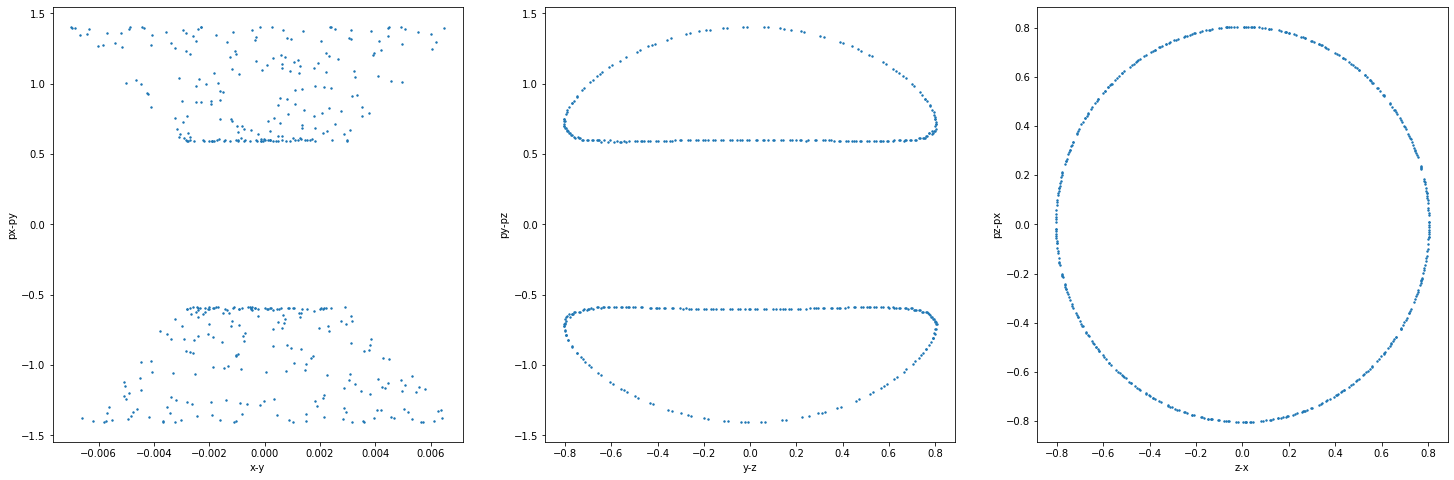

 78%|███████▊  | 39/50 [07:16<02:01, 11.09s/it]

[-0.0241738   0.20877039 -0.45602457  0.53207363  0.02008142 -0.46933895] 49 307


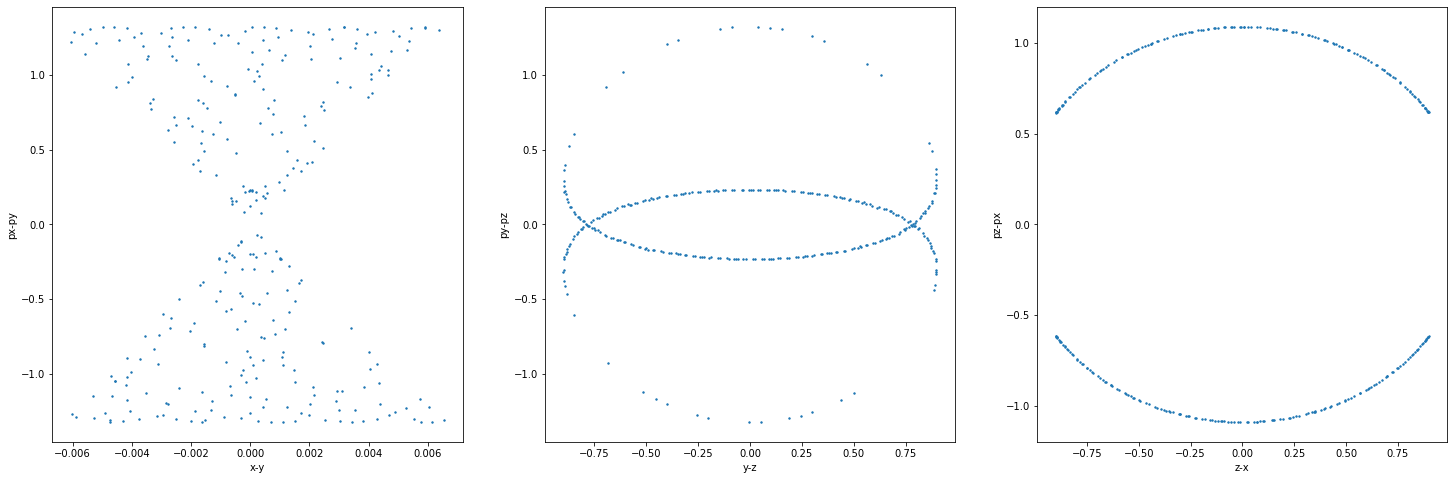

 80%|████████  | 40/50 [07:28<01:51, 11.14s/it]

[-0.27558639  0.4536757   0.08231973  0.53222143 -0.2124555  -0.04329637] 49 441


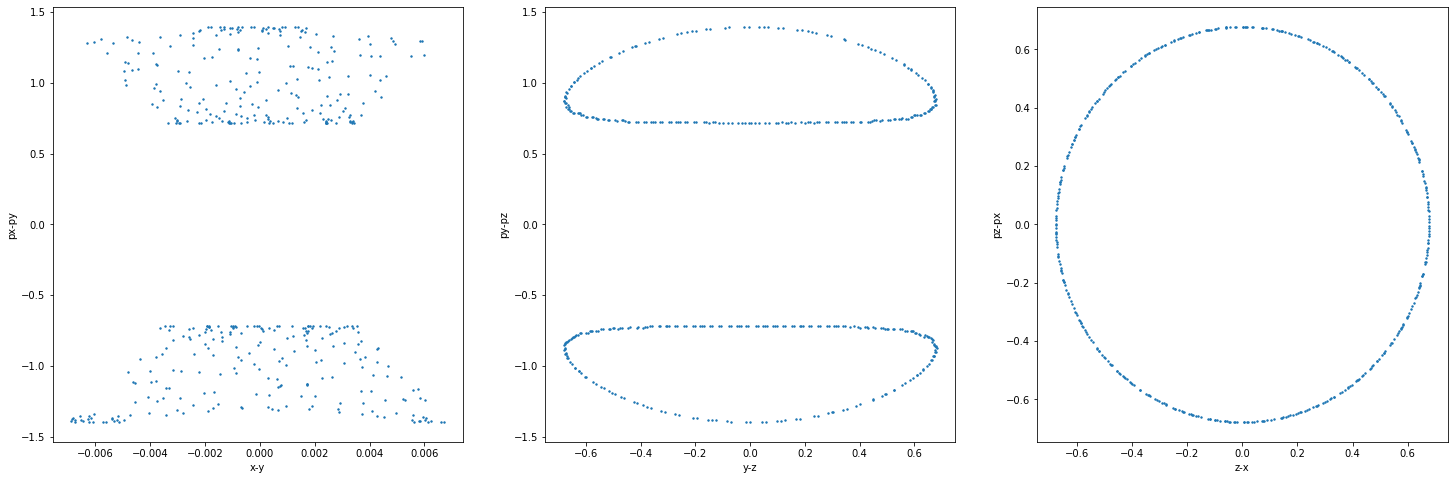

 82%|████████▏ | 41/50 [07:40<01:42, 11.34s/it]

[-0.47904993 -0.08838449 -0.01054136  0.8771166   0.088639    0.25324012] 49 305


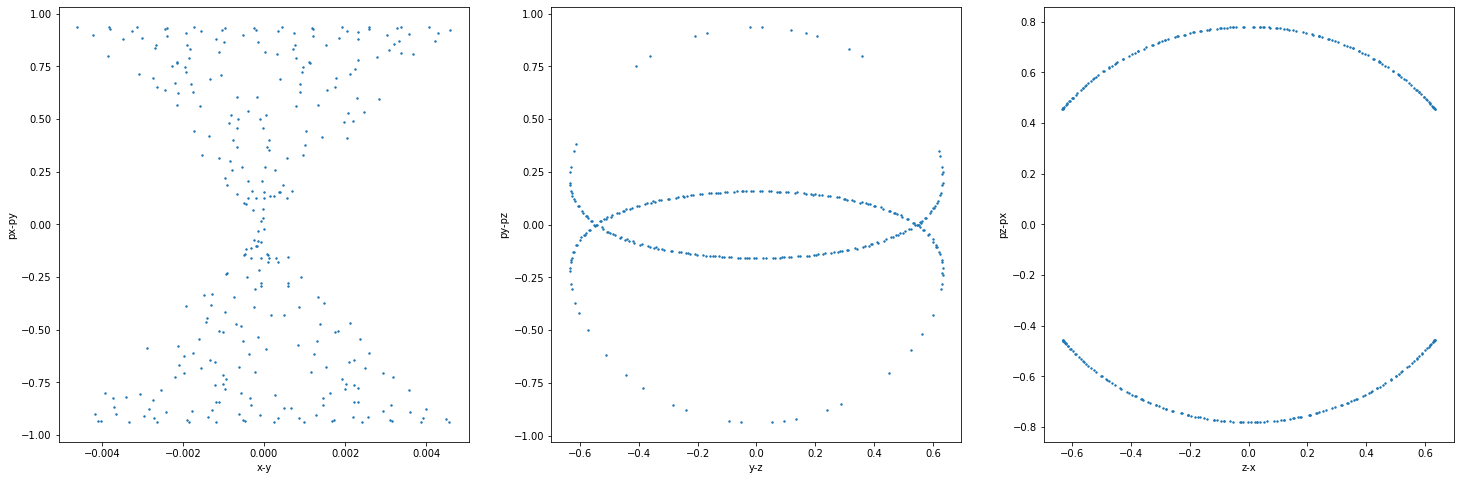

 84%|████████▍ | 42/50 [07:51<01:30, 11.35s/it]

[-0.26416578  0.1204999   0.13962224  0.80801275  0.27827617  0.34834527] 49 309


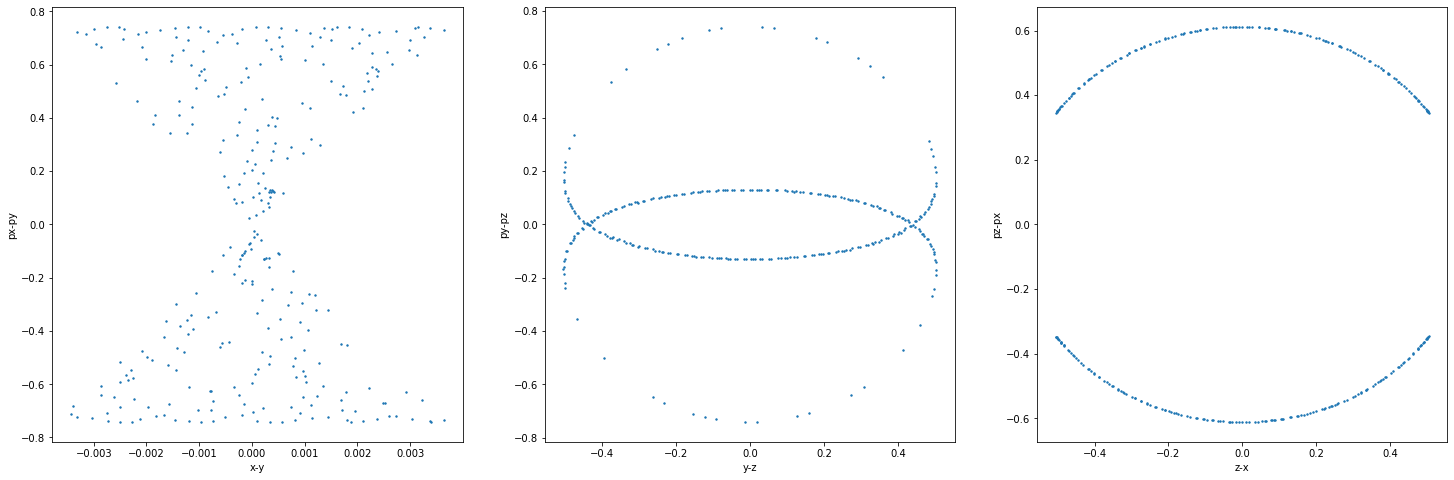

 86%|████████▌ | 43/50 [08:02<01:18, 11.28s/it]

[-0.00958009 -0.31465141  0.49581529  0.25043353 -0.02854268 -0.4319069 ] 49 441


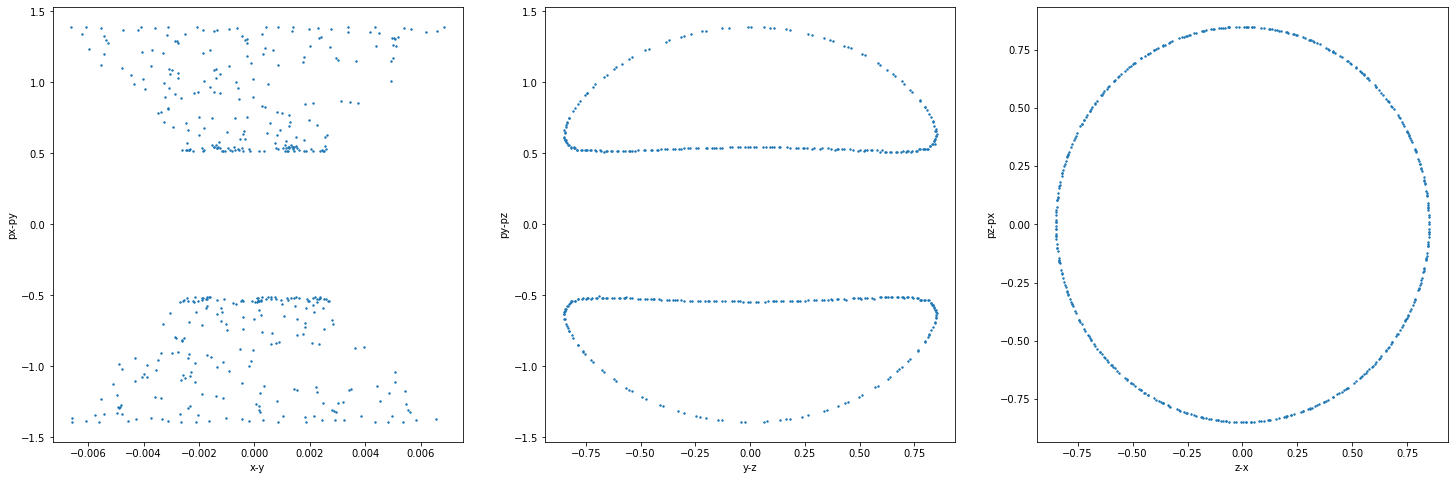

 88%|████████▊ | 44/50 [08:13<01:07, 11.29s/it]

[ 0.44385086  0.46492494  0.21938906  0.90766595 -0.2456176  -0.23469668] 49 259


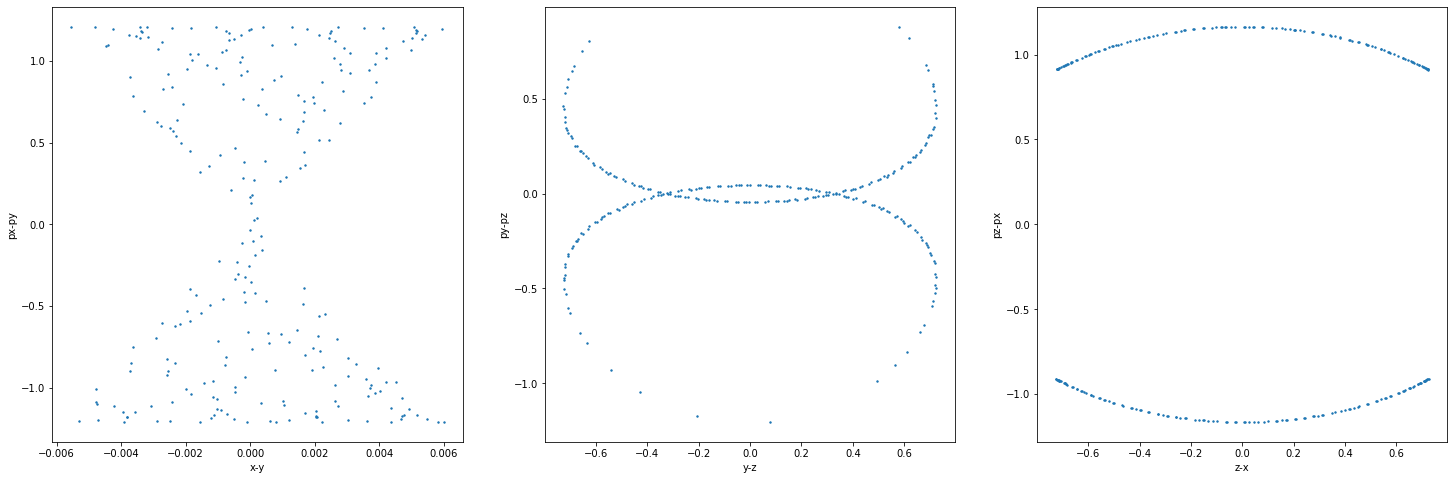

 90%|█████████ | 45/50 [08:25<00:56, 11.27s/it]

[-0.37270597  0.02580895 -0.35818272  0.79114197  0.12670648  0.22754361] 49 441


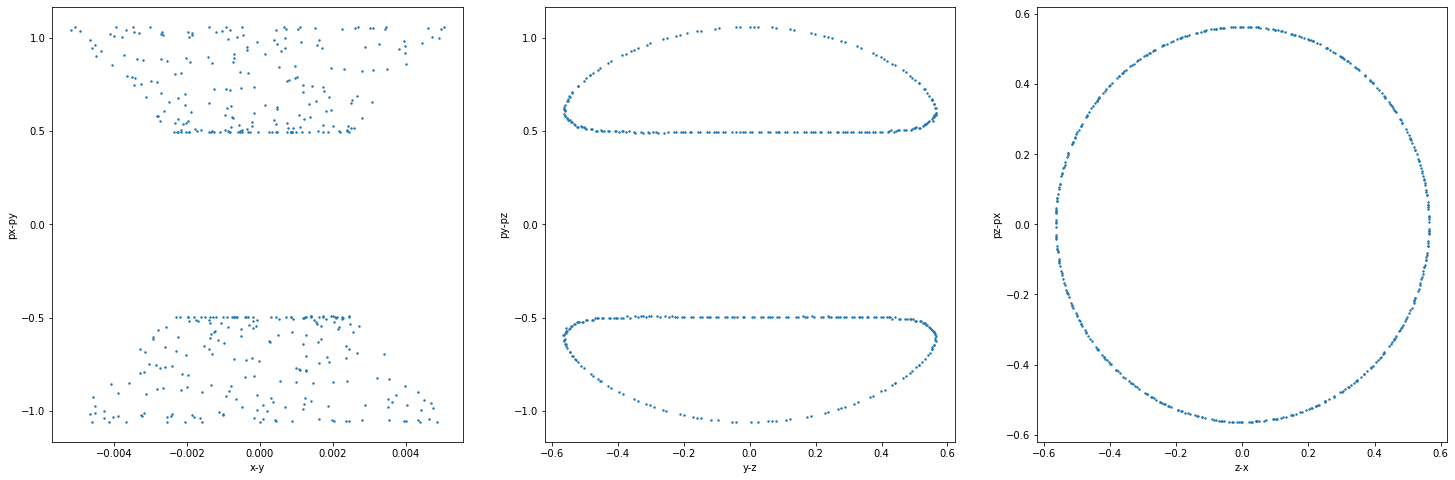

 92%|█████████▏| 46/50 [08:36<00:45, 11.29s/it]

[-0.4757273  -0.06988402  0.15212459  0.75182471 -0.02467522  0.46920587] 49 441


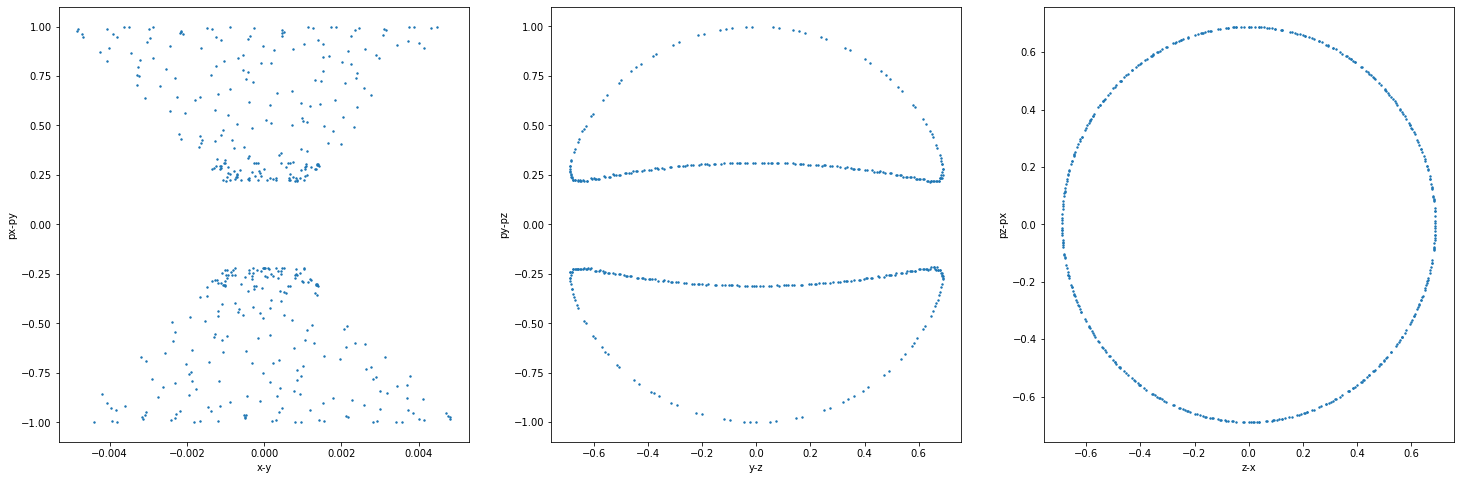

 94%|█████████▍| 47/50 [08:47<00:33, 11.23s/it]

[-0.23436745 -0.48649129 -0.01624714  0.73423458  0.32371767 -0.26722733] 49 274


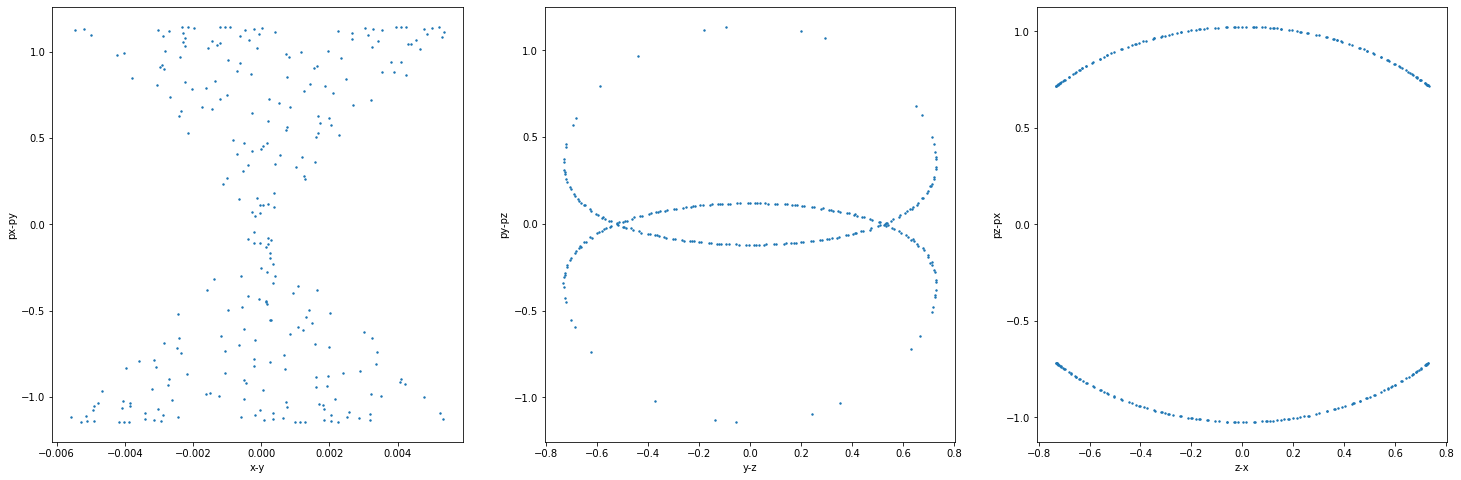

 96%|█████████▌| 48/50 [08:58<00:22, 11.18s/it]

[-0.18937078  0.29122743  0.21514325  0.84534779  0.20494806 -0.08136314] 49 255


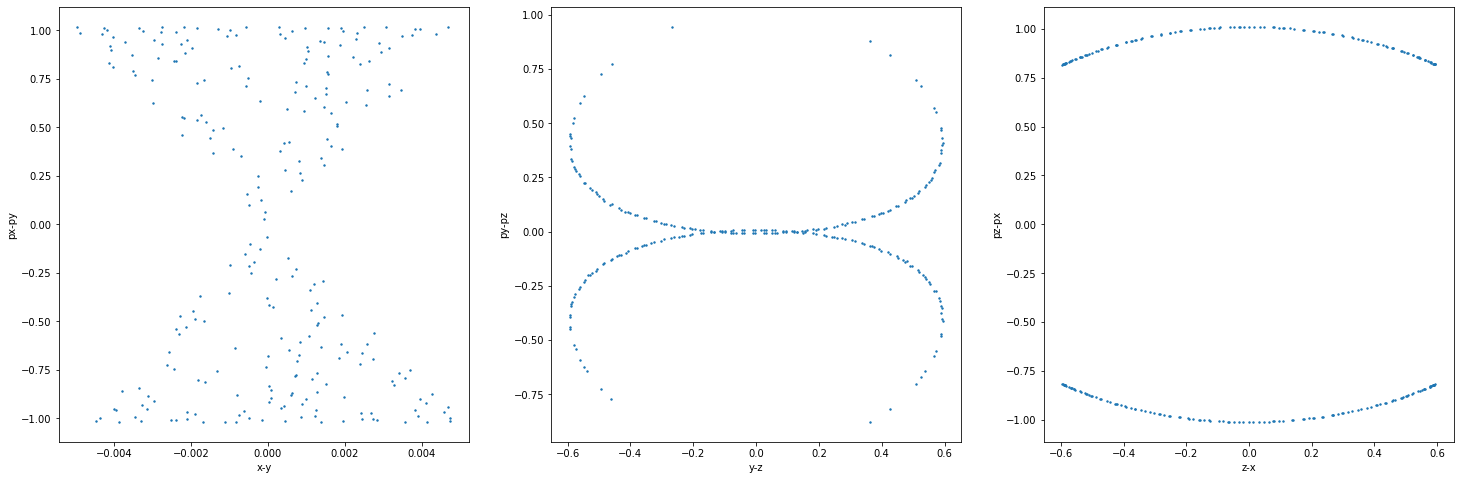

 98%|█████████▊| 49/50 [09:09<00:11, 11.17s/it]

[-0.49468995 -0.48864487  0.01122179  0.57607102 -0.44892452  0.46551664] 49 442


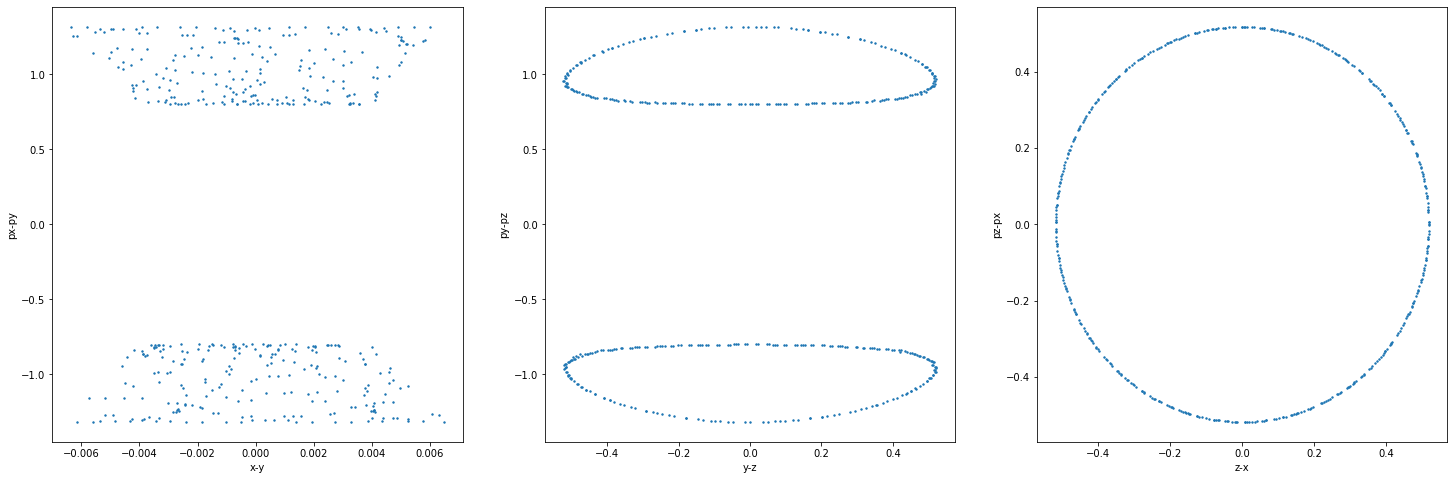

100%|██████████| 50/50 [09:21<00:00, 11.22s/it]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

k = 1
f1 = lambda x: np.asarray([x[3],x[4],x[5]])
f2 = lambda x: np.asarray([k*(x[1]-x[0]), k*(x[0]+x[2]) - 2*k*x[1], -k*(x[2]-x[1])])
H = lambda x: 0.5*(x[3]**2 + x[4]**2 + x[5]**2) + 0.5* k *(x[1]-x[0])**2 + 0.5* k *(x[2]-x[1])**2 
px = lambda x: 2*(0.5 -  0.5*( + x[4]**2 + x[5]**2) - 0.5* k *(x[1]-x[0])**2 - 0.5* k *(x[2]-x[1])**2 )

def findcrossings(data):
    # returns indices in 1D data set where the data crossed zero. Useful for generating Poincare map at 0
    prb = list()
    for ii in range(len(data)-1):
        if (data[ii] > 0)&(data[ii+1] < 0):
            prb.append(ii)
        if (data[ii] < 0)& (data[ii+1] > 0):
            prb.append(ii)
    return np.array(prb)

for inp in tqdm(range(50)): # number of trajectories
  fig, ax = plt.subplots(1,3,figsize = (25,8))
  inp = np.random.rand(6)*1.-0.5
  while px(inp)<0:
    inp = np.random.rand(6)*1.-0.5
  inp[3] = np.sqrt(px(inp))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=80000,n_h=1)
  xcrossings = findcrossings(np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])
  print(inp, i, len(xcrossings))
  yints = [.5*((np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross] + (np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross] + (np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[0].scatter(yints, pyints, s=2.)
  ax[0].set_xlabel("x-y")
  ax[0].set_ylabel("px-py")
  yints = [.5*((np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross] + (np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross] + (np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[1].scatter(yints, pyints, s=2.)
  ax[1].set_xlabel("y-z")
  ax[1].set_ylabel("py-pz")
  yints = [.5*((np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross] + (np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross] + (np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[2].scatter(yints, pyints, s=2.)
  ax[2].set_xlabel("z-x")
  ax[2].set_ylabel("pz-px")
  plt.show()

  2%|▏         | 1/50 [00:11<09:08, 11.19s/it]

[ 0.35900264 -0.34797277 -0.49933578  0.57399914 -0.2216747  -0.3141024 ] 49 255
[ 0.19150811 -0.39109626 -0.2353504   0.78513562  0.13946277  0.02067779] 49 345


  4%|▍         | 2/50 [00:22<08:46, 10.97s/it]

[-0.10208139  0.27450095 -0.35904252  0.55906655  0.36112301  0.11765698] 49 441


  8%|▊         | 4/50 [00:43<08:20, 10.89s/it]

[-0.45709381  0.20085565  0.41328434  0.59710708 -0.14577518 -0.37972266] 49 255
[ 0.11505802  0.05243906 -0.20405017  0.87624869 -0.23409437  0.32814661] 49 440


 12%|█▏        | 6/50 [01:14<09:29, 12.95s/it]

[ 0.48510868  0.28339665  0.01898992  0.94065297 -0.02758621 -0.06174405] 49 254


 14%|█▍        | 7/50 [01:25<08:48, 12.30s/it]

[-0.29720396 -0.07641236 -0.14224212  0.94192179 -0.05862586 -0.23720004] 49 255
[-0.37197913  0.08319283 -0.49793536  0.46723631  0.45612316 -0.16955943] 49 441


 16%|█▌        | 8/50 [01:35<08:16, 11.82s/it]

[ 0.13839011 -0.21914051  0.44782189  0.55963343 -0.17034884  0.29176142] 49 441


 18%|█▊        | 9/50 [01:46<07:53, 11.54s/it]

[-0.39183448 -0.10768106 -0.27878187  0.84931073 -0.39755372 -0.10297417] 49 441


 20%|██        | 10/50 [01:58<07:45, 11.63s/it]

[-0.22335027  0.00634292 -0.15010232  0.82388496 -0.47542298  0.13398692] 49 441


 22%|██▏       | 11/50 [02:10<07:30, 11.55s/it]

[-0.26942871 -0.23129097  0.3002556   0.75864896 -0.18344979  0.32680527] 49 442


 24%|██▍       | 12/50 [02:21<07:11, 11.37s/it]

[-0.39600916  0.13398165  0.2510323   0.73872479 -0.07399761  0.39270716] 49 441


 26%|██▌       | 13/50 [02:31<06:53, 11.18s/it]

[-0.39642154 -0.48190364  0.09058538  0.62961835  0.29868925  0.42345554] 49 441


 30%|███       | 15/50 [02:54<06:36, 11.32s/it]

[-0.20084636 -0.11159588 -0.01372791  0.84226033  0.48385383  0.19733025] 49 255
[-0.11045149 -0.23623231  0.44462572  0.53956793  0.22026585  0.42539503] 49 441


 34%|███▍      | 17/50 [03:16<06:10, 11.22s/it]

[ 0.16466559 -0.07694556 -0.30100906  0.90899019  0.20687181  0.14953422] 49 254


 36%|███▌      | 18/50 [03:27<05:56, 11.14s/it]

[ 0.42797617  0.36686091  0.31615075  0.96262362 -0.22366285 -0.13047646] 49 264
[-0.1201061   0.06045059  0.16821823  0.84540699 -0.48053753 -0.10077762] 49 427


 40%|████      | 20/50 [03:49<05:30, 11.00s/it]

[-0.19147204  0.44218472  0.38826504  0.74021415  0.15299976 -0.15571084] 49 267
[ 0.04884927  0.31522504 -0.40138963  0.323835   -0.45882021  0.31642103] 49 441


 44%|████▍     | 22/50 [04:10<05:03, 10.84s/it]

[ 0.27325913  0.06769275  0.48299913  0.63014933  0.49266699 -0.38138448] 49 280
[ 0.43825614 -0.25543039 -0.04178774  0.61718558 -0.29637907  0.06631161] 49 441


 46%|████▌     | 23/50 [04:21<04:53, 10.88s/it]

[-0.31418325 -0.39526389 -0.38344139  0.86155232 -0.49534516 -0.07514608] 49 440


 50%|█████     | 25/50 [04:43<04:31, 10.87s/it]

[ 0.16419711 -0.09831181 -0.4142054   0.8201914  -0.22188349 -0.33068731] 49 254
[ 0.47176308 -0.13615522  0.28791575  0.48193111 -0.10436633  0.45546593] 49 441


 52%|█████▏    | 26/50 [04:54<04:21, 10.90s/it]

[ 0.09831597 -0.38108306 -0.0824608   0.68565599  0.19374702  0.41634033] 49 441


 54%|█████▍    | 27/50 [05:05<04:10, 10.90s/it]

[-0.24062262  0.25819372 -0.04012479  0.47476887  0.45504668  0.47928632] 49 441


 56%|█████▌    | 28/50 [05:16<04:04, 11.09s/it]

[ 0.36159096 -0.14090291  0.38770084  0.49763709 -0.07000322 -0.46425732] 49 441


 60%|██████    | 30/50 [05:38<03:37, 10.88s/it]

[ 0.27012812  0.00210558  0.2861885   0.84943455  0.29356737 -0.19934884] 49 254


 62%|██████▏   | 31/50 [05:49<03:26, 10.87s/it]

[ 0.3007986   0.04884633 -0.0266738   0.73727019 -0.47864132 -0.39768318] 49 260
[-0.17967371  0.44680717  0.34515409  0.51162712 -0.47523094  0.33103111] 49 441


 66%|██████▌   | 33/50 [06:10<03:02, 10.75s/it]

[-0.06464653  0.29545653  0.17750836  0.82461044  0.12114033 -0.40218984] 49 255


 68%|██████▊   | 34/50 [06:21<02:52, 10.81s/it]

[ 0.38436036  0.26915552  0.21187045  0.92848135 -0.10377726 -0.33256418] 49 254
[0.32190391 0.20052862 0.3830776  0.7951046  0.27474761 0.49423308] 49 441


 72%|███████▏  | 36/50 [06:43<02:31, 10.80s/it]

[ 0.11476989 -0.4628704  -0.48574848  0.65354397  0.32347172  0.36613471] 49 339
[ 0.46081253 -0.43487853 -0.45542889  0.39489983 -0.1949533   0.0579874 ] 49 441


 74%|███████▍  | 37/50 [06:53<02:20, 10.80s/it]

[ 0.48244488 -0.09955147  0.1658714   0.71981558  0.26819466  0.02771473] 49 441


 76%|███████▌  | 38/50 [07:04<02:09, 10.75s/it]

[-0.26247686 -0.2286939  -0.24194079  0.86922093  0.20318902  0.4492799 ] 49 441


 78%|███████▊  | 39/50 [07:15<01:58, 10.76s/it]

[ 0.19408738  0.28119284 -0.33107388  0.7585319  -0.08621978  0.18638023] 49 441


 82%|████████▏ | 41/50 [07:36<01:36, 10.75s/it]

[-0.20410802 -0.19670808 -0.14411085  0.90042721  0.07759009 -0.42472272] 49 255


 84%|████████▍ | 42/50 [07:47<01:26, 10.84s/it]

[-0.4217539  -0.12871306  0.26659105  0.80199991  0.20798235  0.26721007] 49 255


 86%|████████▌ | 43/50 [07:58<01:15, 10.79s/it]

[-0.21284729  0.04825628  0.04335264  0.82084207  0.45687057 -0.22201006] 49 255


 88%|████████▊ | 44/50 [08:09<01:04, 10.78s/it]

[ 0.29328167  0.15997055  0.08023787  0.7510334   0.44403247 -0.46330858] 49 254
[-0.3525999   0.25628723 -0.41620865  0.21814065 -0.28013922 -0.2257043 ] 49 441


 92%|█████████▏| 46/50 [08:31<00:43, 10.90s/it]

[ 0.14554429 -0.15514341 -0.39889251  0.85842454 -0.33185788  0.05613318] 49 362
[-0.18197137  0.45806718  0.46573428  0.58386121  0.11749727  0.48537856] 49 441


 96%|█████████▌| 48/50 [08:52<00:21, 10.84s/it]

[ 0.38728315  0.26506995 -0.18640939  0.83175936 -0.29873323 -0.01285187] 49 324


 98%|█████████▊| 49/50 [09:03<00:10, 10.84s/it]

[ 0.49036852  0.41215095 -0.38165057  0.45107378  0.39863767  0.03717013] 49 288


100%|██████████| 50/50 [09:14<00:00, 11.09s/it]

[-0.29981011  0.17365327  0.14422318  0.72363171 -0.24039977 -0.43992204] 49 255


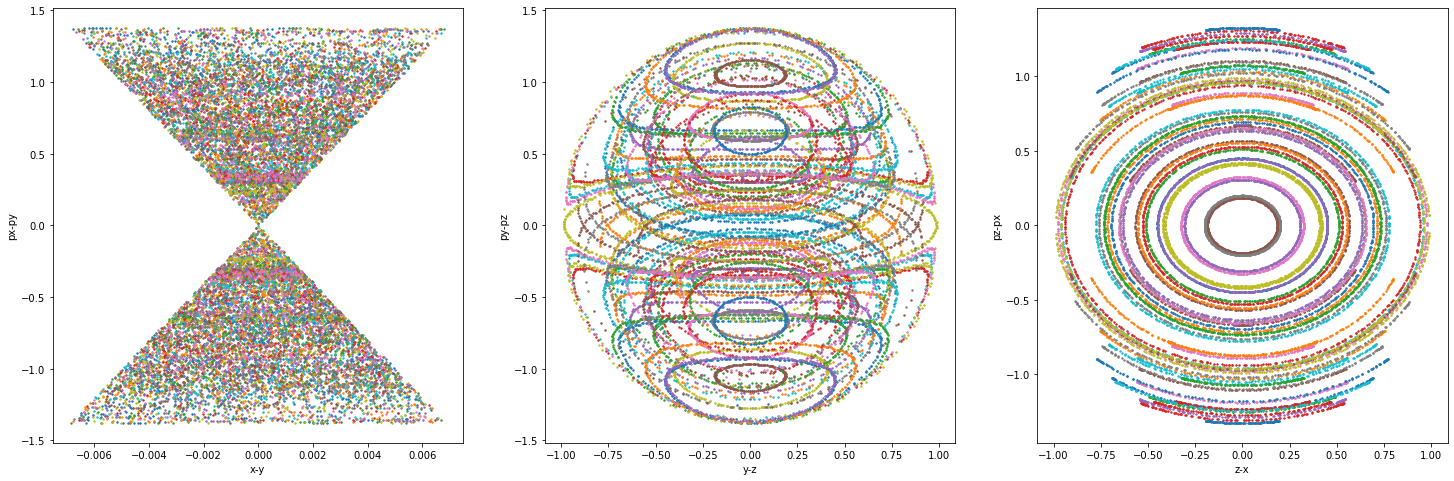

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

k = 1
f1 = lambda x: np.asarray([x[3],x[4],x[5]])
f2 = lambda x: np.asarray([k*(x[1]-x[0]), k*(x[0]+x[2]) - 2*k*x[1], -k*(x[2]-x[1])])
H = lambda x: 0.5*(x[3]**2 + x[4]**2 + x[5]**2) + 0.5* k *(x[1]-x[0])**2 + 0.5* k *(x[2]-x[1])**2 
px = lambda x: 2*(0.5 -  0.5*( + x[4]**2 + x[5]**2) - 0.5* k *(x[1]-x[0])**2 - 0.5* k *(x[2]-x[1])**2 )

def findcrossings(data):
    # returns indices in 1D data set where the data crossed zero. Useful for generating Poincare map at 0
    prb = list()
    for ii in range(len(data)-1):
        if (data[ii] > 0)&(data[ii+1] < 0):
            prb.append(ii)
        if (data[ii] < 0)& (data[ii+1] > 0):
            prb.append(ii)
    return np.array(prb)

fig, ax = plt.subplots(1,3,figsize = (25,8))

for inp in tqdm(range(50)): # number of trajectories
  inp = np.random.rand(6)*1.-0.5
  while px(inp)<0:
    inp = np.random.rand(6)*1.-0.5
  inp[3] = np.sqrt(px(inp))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=80000,n_h=1)
  xcrossings = findcrossings(np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])
  print(inp, i, len(xcrossings))
  yints = [.5*((np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross] + (np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross] + (np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[0].scatter(yints, pyints, s=2.)
  ax[0].set_xlabel("x-y")
  ax[0].set_ylabel("px-py")
  yints = [.5*((np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross] + (np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross] + (np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[1].scatter(yints, pyints, s=2.)
  ax[1].set_xlabel("y-z")
  ax[1].set_ylabel("py-pz")
  yints = [.5*((np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross] + (np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross] + (np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[2].scatter(yints, pyints, s=2.)
  ax[2].set_xlabel("z-x")
  ax[2].set_ylabel("pz-px")
plt.show()

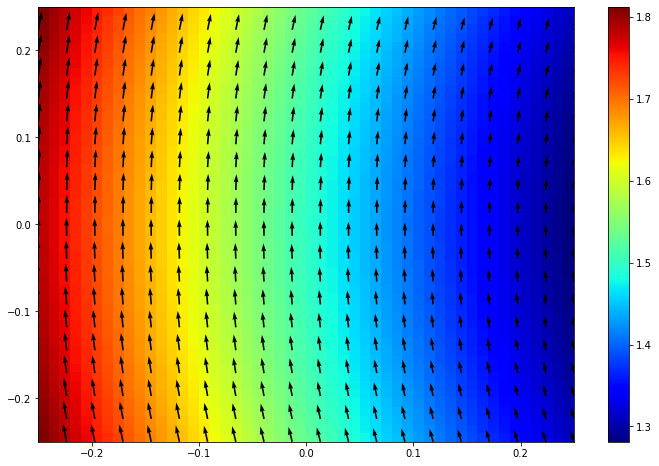

In [12]:
from matplotlib import cm

k = 1
f1 = lambda x: np.asarray([x[3],x[4],x[5]])
f2 = lambda x: np.asarray([k*(x[1]-x[0]), k*(x[0]+x[2]) - 2*k*x[1], -k*(x[2]-x[1])])
H = lambda x: 0.5*(x[3]**2 + x[4]**2 + x[5]**2) + 0.5* k *(x[1]-x[0])**2 + 0.5* k *(x[2]-x[1])**2 
px = lambda x: 2*(0.5 -  0.5*( + x[4]**2 + x[5]**2) - 0.5* k *(x[1]-x[0])**2 - 0.5* k *(x[2]-x[1])**2 )

spacedim=[(-0.25,0.25), (-0.25,0.25),(-0.25,0.25), (-0.25,0.25)]
fvector = lambda x: np.asarray([f1(x), f2(x)])
h= 0.1

"""# Test dataset creation"""


xxshort1,yyshort1 = np.linspace(spacedim[0][0], spacedim[0][1], 50), np.linspace(spacedim[1][0], spacedim[1][1], 50)
xshort1,yshort1 = np.meshgrid(xxshort1,yyshort1)
xxshort2,yyshort2 = np.linspace(spacedim[0][0], spacedim[0][1], 20), np.linspace(spacedim[1][0], spacedim[1][1], 20)
xshort2,yshort2 = np.meshgrid(xxshort2,yyshort2)

sample_points = np.hstack((np.c_[np.ravel(xshort2),np.ravel(yshort2)], np.ones((20**2,4))))[:, [0,2,3,1,4,5]].transpose() #np.expand_dims(np.c_[np.ravel(xshort2),np.ravel(yshort2)],2)

plt.figure(figsize = (12,8))
plt.quiver(xshort2,yshort2,f1(sample_points)[0,:].reshape(xshort2.shape),f2(sample_points)[0,:].reshape(xshort2.shape)) #x,y,dH/dy,-dH/dx
plt.imshow(np.flip(H(np.hstack((np.c_[np.ravel(xshort1),np.ravel(yshort1)], np.ones((50**2,4))))[:, [0,2,3,1,4,5]].transpose()).reshape(xshort1.shape),0), cmap = cm.jet, extent = (spacedim[0][0], spacedim[0][1], spacedim[1][0], spacedim[1][1]), aspect = 'auto')
plt.colorbar()


  0%|          | 0/50 [00:00<?, ?it/s]

[-0.03814656  0.5         0.5         0.45869193  0.5         0.5       ] 49 427


  2%|▏         | 1/50 [00:11<09:07, 11.17s/it]

[-0.16148551  0.5         0.5         0.24987382  0.5         0.5       ] 49 375


  6%|▌         | 3/50 [00:33<08:48, 11.23s/it]

[0.32130348 0.5        0.5        0.68415463 0.5        0.5       ] 49 303


  8%|▊         | 4/50 [00:44<08:33, 11.17s/it]

[0.27911099 0.5        0.5        0.67172021 0.5        0.5       ] 49 325
[0.1019437 0.5       0.5       0.5844238 0.5       0.5      ] 49 403


 10%|█         | 5/50 [00:55<08:19, 11.09s/it]

[0.18678337 0.5        0.5        0.63395216 0.5        0.5       ] 49 367


 14%|█▍        | 7/50 [01:17<07:51, 10.97s/it]

[0.43345589 0.5        0.5        0.70396867 0.5        0.5       ] 49 261
[0.03233607 0.5        0.5        0.53036822 0.5        0.5       ] 49 429


 18%|█▊        | 9/50 [01:40<07:39, 11.20s/it]

[0.34083024 0.5        0.5        0.68895935 0.5        0.5       ] 49 293
[-0.0913226  0.5        0.5        0.3877339  0.5        0.5      ] 49 407


 20%|██        | 10/50 [01:51<07:28, 11.22s/it]

[0.09558502 0.5        0.5        0.58004183 0.5        0.5       ] 49 405


 24%|██▍       | 12/50 [02:13<06:56, 10.95s/it]

[0.350628   0.5        0.5        0.69114977 0.5        0.5       ] 49 289
[0.20530677 0.5        0.5        0.64277204 0.5        0.5       ] 49 359


 26%|██▌       | 13/50 [02:23<06:43, 10.90s/it]

[0.23994624 0.5        0.5        0.65755003 0.5        0.5       ] 49 343


 30%|███       | 15/50 [02:45<06:20, 10.88s/it]

[0.40827309 0.5        0.5        0.70113207 0.5        0.5       ] 49 267


 32%|███▏      | 16/50 [02:56<06:10, 10.90s/it]

[0.22407253 0.5        0.5        0.65104841 0.5        0.5       ] 49 349


 34%|███▍      | 17/50 [03:07<05:59, 10.90s/it]

[0.34773933 0.5        0.5        0.69051914 0.5        0.5       ] 49 289
[-0.18159707  0.5         0.5         0.18821647  0.5         0.5       ] 49 361


 36%|███▌      | 18/50 [03:18<05:48, 10.91s/it]

[-0.08535585  0.5         0.5         0.39668442  0.5         0.5       ] 49 409


 38%|███▊      | 19/50 [03:29<05:36, 10.86s/it]

[-0.14399274  0.5         0.5         0.29201601  0.5         0.5       ] 49 383


 42%|████▏     | 21/50 [03:50<05:12, 10.78s/it]

[0.47364152 0.5        0.5        0.70661533 0.5        0.5       ] 49 255


 44%|████▍     | 22/50 [04:01<05:04, 10.88s/it]

[0.34902863 0.5        0.5        0.69080218 0.5        0.5       ] 49 289


 46%|████▌     | 23/50 [04:12<04:54, 10.90s/it]

[0.45591231 0.5        0.5        0.70573102 0.5        0.5       ] 49 257
[-0.03397826  0.5         0.5         0.46353772  0.5         0.5       ] 49 429


 48%|████▊     | 24/50 [04:23<04:44, 10.96s/it]

[-0.16034898  0.5         0.5         0.25286208  0.5         0.5       ] 49 375


 52%|█████▏    | 26/50 [04:46<04:28, 11.18s/it]

[0.44095033 0.5        0.5        0.70463688 0.5        0.5       ] 49 259


 54%|█████▍    | 27/50 [04:56<04:13, 11.03s/it]

[0.30127342 0.5        0.5        0.67860721 0.5        0.5       ] 49 313


 56%|█████▌    | 28/50 [05:07<04:00, 10.91s/it]

[0.12386673 0.5        0.5        0.59876854 0.5        0.5       ] 49 393
[-0.17003912  0.5         0.5         0.22593712  0.5         0.5       ] 49 369


 60%|██████    | 30/50 [05:29<03:36, 10.82s/it]

[0.49490191 0.5        0.5        0.7070884  0.5        0.5       ] 49 255


 62%|██████▏   | 31/50 [05:39<03:25, 10.83s/it]

[0.21405379 0.5        0.5        0.64671073 0.5        0.5       ] 49 355
[-0.01869303  0.5         0.5         0.48058042  0.5         0.5       ] 49 433


 64%|██████▍   | 32/50 [05:50<03:15, 10.87s/it]

[0.0851091  0.5        0.5        0.57259544 0.5        0.5       ] 49 409


 66%|██████▌   | 33/50 [06:01<03:04, 10.84s/it]

[-0.15529782  0.5         0.5         0.26567794  0.5         0.5       ] 49 377


 70%|███████   | 35/50 [06:23<02:42, 10.86s/it]

[0.32167193 0.5        0.5        0.68425076 0.5        0.5       ] 49 303
[0.12084156 0.5        0.5        0.5968575  0.5        0.5       ] 49 395


 72%|███████▏  | 36/50 [06:34<02:32, 10.88s/it]

[0.21050533 0.5        0.5        0.64513009 0.5        0.5       ] 49 357


 76%|███████▌  | 38/50 [06:55<02:09, 10.82s/it]

[0.49045331 0.5        0.5        0.70704233 0.5        0.5       ] 49 255


 78%|███████▊  | 39/50 [07:06<01:59, 10.86s/it]

[0.37941746 0.5        0.5        0.69674949 0.5        0.5       ] 49 277


 80%|████████  | 40/50 [07:17<01:48, 10.86s/it]

[0.49053919 0.5        0.5        0.70704349 0.5        0.5       ] 49 255
[-0.01889804  0.5         0.5         0.48035906  0.5         0.5       ] 49 433


 82%|████████▏ | 41/50 [07:28<01:37, 10.86s/it]

[-0.05013847  0.5         0.5         0.4442383   0.5         0.5       ] 49 421


 84%|████████▍ | 42/50 [07:39<01:26, 10.86s/it]

[-0.02142414  0.5         0.5         0.47761581  0.5         0.5       ] 49 433


 86%|████████▌ | 43/50 [07:50<01:17, 11.03s/it]

[-0.13888656  0.5         0.5         0.30302468  0.5         0.5       ] 49 385


 90%|█████████ | 45/50 [08:13<00:56, 11.20s/it]

[0.44447416 0.5        0.5        0.70492332 0.5        0.5       ] 49 257
[-0.00502838  0.5         0.5         0.49492053  0.5         0.5       ] 49 439


 94%|█████████▍| 47/50 [08:35<00:33, 11.02s/it]

[0.38668322 0.5        0.5        0.69796798 0.5        0.5       ] 49 275


 96%|█████████▌| 48/50 [08:46<00:21, 10.90s/it]

[0.27486545 0.5        0.5        0.67030921 0.5        0.5       ] 49 327


 98%|█████████▊| 49/50 [08:56<00:10, 10.82s/it]

[0.45048604 0.5        0.5        0.70537108 0.5        0.5       ] 49 257


100%|██████████| 50/50 [09:07<00:00, 10.96s/it]

[-0.20374273  0.5         0.5         0.06889246  0.5         0.5       ] 49 343


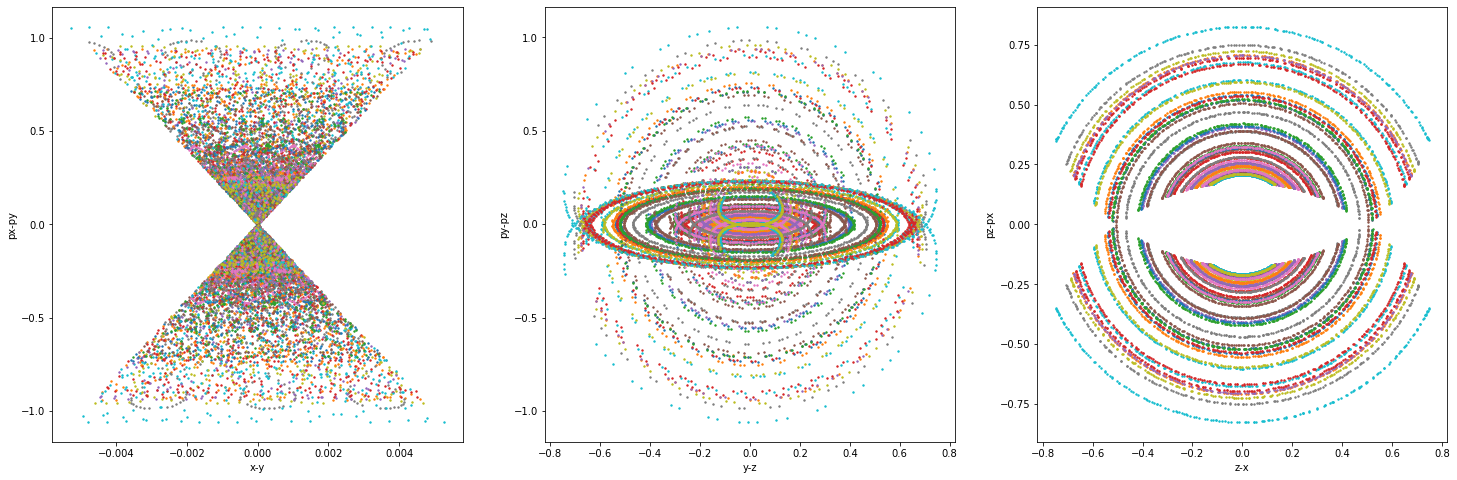

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

k = 1
f1 = lambda x: np.asarray([x[3],x[4],x[5]])
f2 = lambda x: np.asarray([k*(x[1]-x[0]), k*(x[0]+x[2]) - 2*k*x[1], -k*(x[2]-x[1])])
H = lambda x: 0.5*(x[3]**2 + x[4]**2 + x[5]**2) + 0.5* k *(x[1]-x[0])**2 + 0.5* k *(x[2]-x[1])**2 
px = lambda x: 2*(0.5 -  0.5*( + x[4]**2 + x[5]**2) - 0.5* k *(x[1]-x[0])**2 - 0.5* k *(x[2]-x[1])**2 )

def findcrossings(data):
    # returns indices in 1D data set where the data crossed zero. Useful for generating Poincare map at 0
    prb = list()
    for ii in range(len(data)-1):
        if (data[ii] > 0)&(data[ii+1] < 0):
            prb.append(ii)
        if (data[ii] < 0)& (data[ii+1] > 0):
            prb.append(ii)
    return np.array(prb)

fig, ax = plt.subplots(1,3,figsize = (25,8))

for inp in tqdm(range(50)): # number of trajectories
  inp = np.random.rand(6)*1.-0.5
  inp[1], inp[2], inp[4], inp[5] = 0.5,0.5,0.5,0.5,
  while px(inp)<0:
    inp = np.random.rand(6)*1.-0.5
    inp[1], inp[2], inp[4], inp[5] = 0.5,0.5,0.5,0.5,
  inp[3] = np.sqrt(px(inp))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=80000,n_h=1)
  xcrossings = findcrossings(np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])
  print(inp, i, len(xcrossings))
  yints = [.5*((np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross] + (np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross] + (np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[0].scatter(yints, pyints, s=2.)
  ax[0].set_xlabel("x-y")
  ax[0].set_ylabel("px-py")
  yints = [.5*((np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross] + (np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross] + (np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[1].scatter(yints, pyints, s=2.)
  ax[1].set_xlabel("y-z")
  ax[1].set_ylabel("py-pz")
  yints = [.5*((np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross] + (np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross] + (np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[2].scatter(yints, pyints, s=2.)
  ax[2].set_xlabel("z-x")
  ax[2].set_ylabel("pz-px")
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

Trajectories of the Coupled Oscillator (Stormer-Verlet)
Hamiltonian = 0.32000000000000006, IC = (0.10, 0.43, 0.21, 0.61, -0.15, 0.29,)


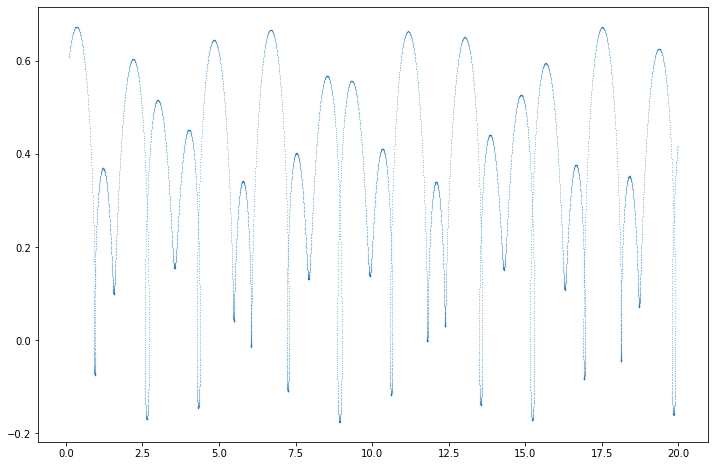

 10%|█         | 1/10 [00:01<00:14,  1.57s/it]

Trajectories of the Coupled Oscillator (Stormer-Verlet)
Hamiltonian = 0.32, IC = (0.56, 0.74, 0.96, 0.49, -0.08, 0.56,)


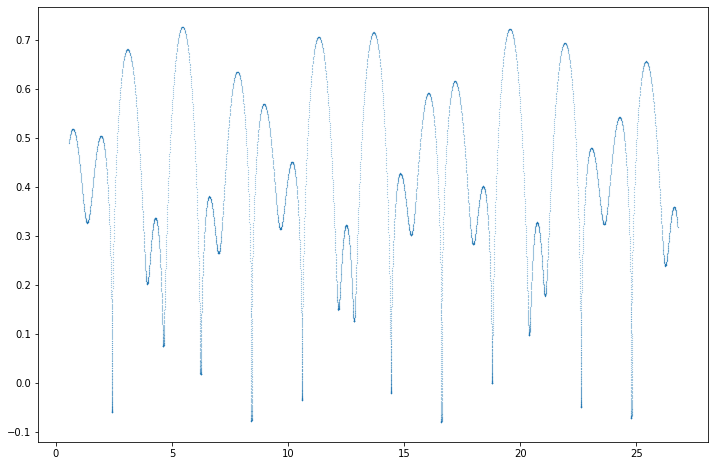

 20%|██        | 2/10 [00:02<00:11,  1.42s/it]

Trajectories of the Coupled Oscillator (Stormer-Verlet)
Hamiltonian = 0.31999999999999995, IC = (0.22, 0.23, 0.89, 0.34, -0.28, -0.13,)


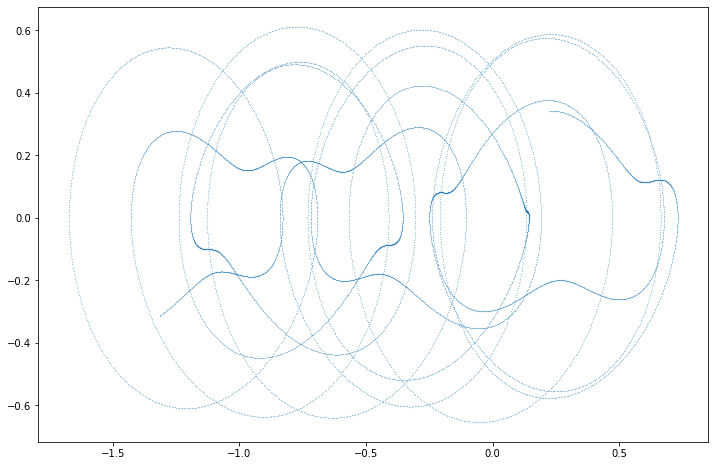

 30%|███       | 3/10 [00:04<00:09,  1.31s/it]

Trajectories of the Coupled Oscillator (Stormer-Verlet)
Hamiltonian = 0.31999999999999995, IC = (-0.73, -0.40, 0.14, 0.35, 0.15, 0.31,)


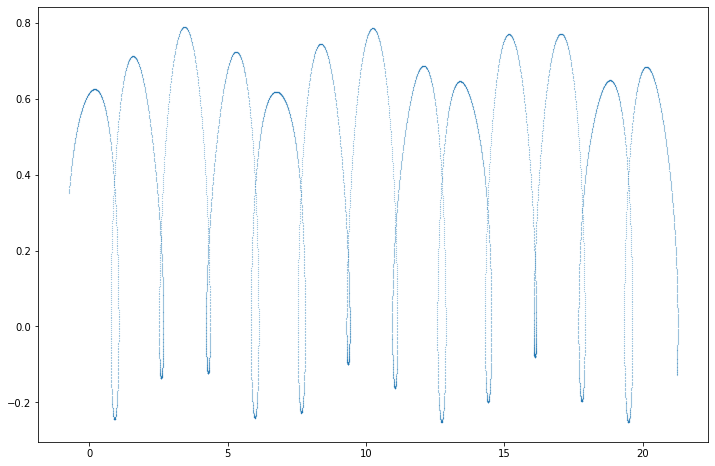

 40%|████      | 4/10 [00:05<00:07,  1.30s/it]

Trajectories of the Coupled Oscillator (Stormer-Verlet)
Hamiltonian = 0.32, IC = (0.61, 0.14, -0.19, 0.38, 0.39, -0.09,)


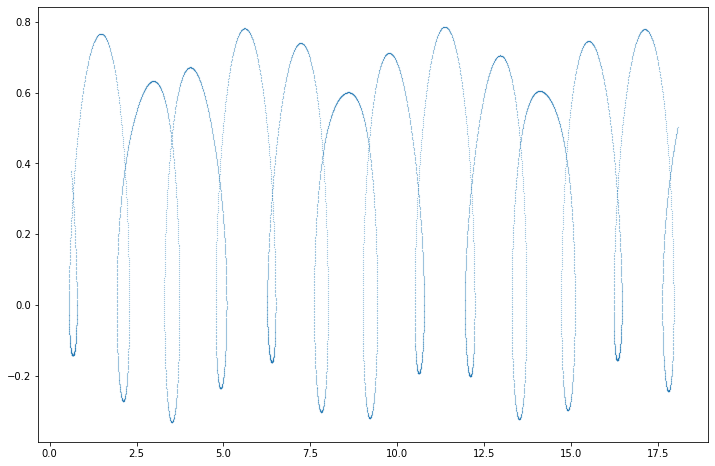

 50%|█████     | 5/10 [00:06<00:06,  1.28s/it]

Trajectories of the Coupled Oscillator (Stormer-Verlet)
Hamiltonian = 0.32, IC = (0.07, 0.18, 0.46, 0.41, -0.20, -0.58,)


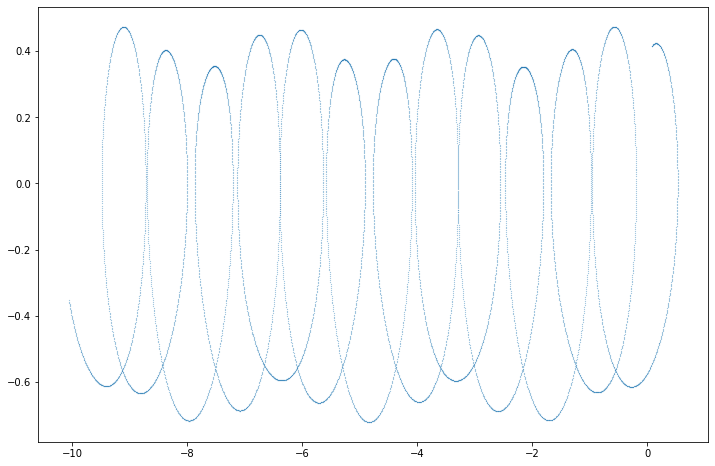

 60%|██████    | 6/10 [00:07<00:05,  1.26s/it]

Trajectories of the Coupled Oscillator (Stormer-Verlet)
Hamiltonian = 0.32, IC = (-0.59, -0.15, -0.25, 0.46, -0.44, 0.17,)


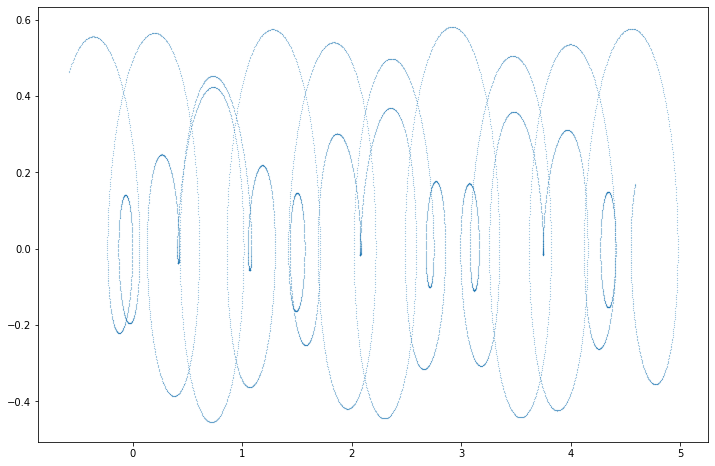

 70%|███████   | 7/10 [00:09<00:03,  1.27s/it]

Trajectories of the Coupled Oscillator (Stormer-Verlet)
Hamiltonian = 0.32000000000000006, IC = (0.53, 0.50, 0.81, 0.71, 0.10, 0.17,)


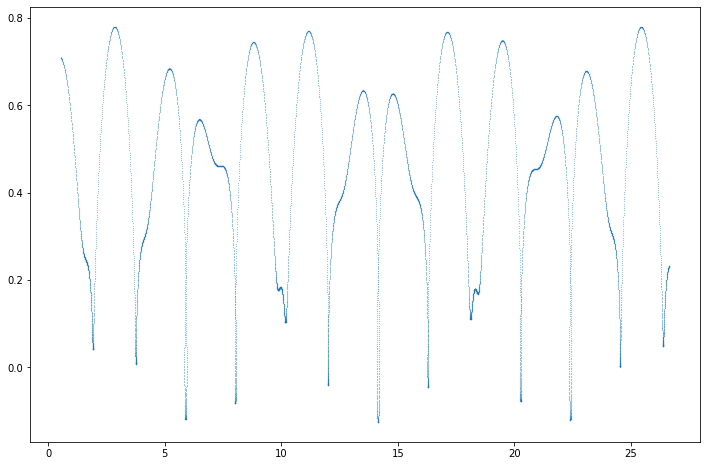

 80%|████████  | 8/10 [00:10<00:02,  1.23s/it]

Trajectories of the Coupled Oscillator (Stormer-Verlet)
Hamiltonian = 0.32, IC = (-0.48, -0.09, 0.37, 0.19, -0.43, -0.24,)


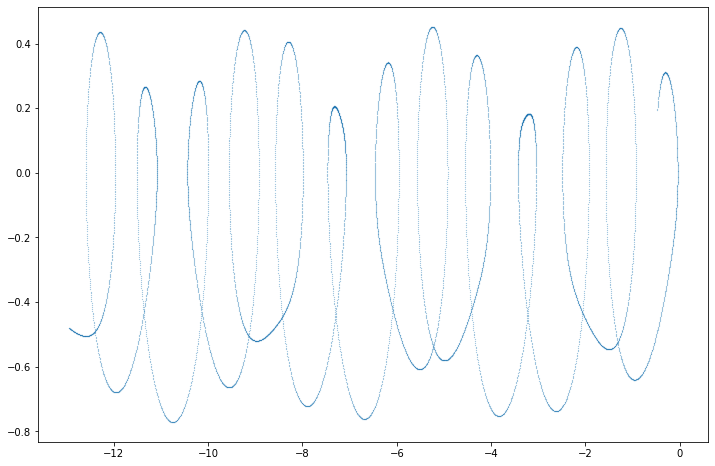

 90%|█████████ | 9/10 [00:11<00:01,  1.28s/it]

Trajectories of the Coupled Oscillator (Stormer-Verlet)
Hamiltonian = 0.32000000000000006, IC = (0.64, 0.82, 0.63, 0.68, 0.26, -0.20,)


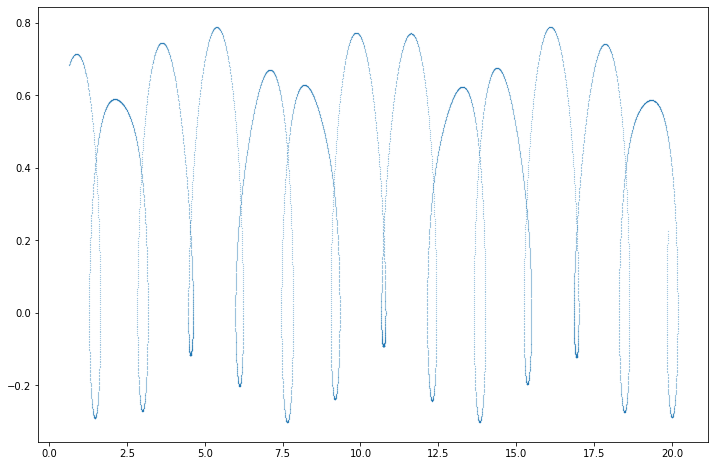

100%|██████████| 10/10 [00:12<00:00,  1.28s/it]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

k = 1
f1 = lambda x: np.asarray([x[3],x[4],x[5]])
f2 = lambda x: np.asarray([k*(x[1]-x[0]), k*(x[0]+x[2]) - 2*k*x[1], -k*(x[2]-x[1])])
H = lambda x: 0.5*(x[3]**2 + x[4]**2 + x[5]**2) + 0.5* k *(x[1]-x[0])**2 + 0.5* k *(x[2]-x[1])**2 
px = lambda x: 2*(0.32 -  0.5*( + x[4]**2 + x[5]**2) - 0.5* k *(x[1]-x[0])**2 - 0.5* k *(x[2]-x[1])**2 )
np.random.seed(0)


for i in tqdm(range(10)):
  fig, ax = plt.subplots(1,1,figsize = (12,8))  
  inp = np.random.rand(6)*2.-1.
  while px(inp)<0:
    inp = np.random.rand(6)*2.-1.
  inp[3] = np.sqrt(px(inp))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=8000,n_h=1)
  ax.scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
  # ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][4,:], marker = '.', s=0.1)
  # ax[2].scatter(np.asarray(soln)[0][2,:], np.asarray(soln)[0][5,:], marker = '.', s=0.1)
  # ax[3].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
  # ax[4].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
  # ax[5].scatter(np.asarray(soln)[0][2,:], np.asarray(soln)[0][0,:], marker = '.', s=0.1)
  print("Trajectories of the Coupled Oscillator (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3], inp[4], inp[5]))
  # ax[0].set_xlabel("x")
  # ax[0].set_ylabel("px")
  # ax[1].set_xlabel("y")
  # ax[1].set_ylabel("py")
  # ax[2].set_xlabel("z")
  # ax[2].set_ylabel("pz")
  # ax[3].set_xlabel("x")
  # ax[3].set_ylabel("y")
  # ax[4].set_xlabel("y")
  # ax[4].set_ylabel("z")
  # ax[5].set_xlabel("z")
  # ax[5].set_ylabel("x")
  plt.show()

  2%|▏         | 1/50 [00:11<09:04, 11.10s/it]

[-0.14463115  0.5         0.5         0.29060399  0.5         0.5       ] 9 383


  4%|▍         | 2/50 [00:22<08:48, 11.01s/it]

[0.11446471 0.5        0.5        0.59275841 0.5        0.5       ] 9 397


  6%|▌         | 3/50 [00:32<08:32, 10.90s/it]

[0.47425621 0.5        0.5        0.706638   0.5        0.5       ] 9 255


  8%|▊         | 4/50 [00:43<08:20, 10.87s/it]

[0.48940978 0.5        0.5        0.70702747 0.5        0.5       ] 9 255


 10%|█         | 5/50 [00:55<08:19, 11.10s/it]

[0.20657471 0.5        0.5        0.64335185 0.5        0.5       ] 9 359


 12%|█▏        | 6/50 [01:05<08:04, 11.00s/it]

[-0.20344373  0.5         0.5         0.07188123  0.5         0.5       ] 9 343


 14%|█▍        | 7/50 [01:17<07:57, 11.09s/it]

[0.18976827 0.5        0.5        0.63541819 0.5        0.5       ] 9 367


 16%|█▌        | 8/50 [01:28<07:49, 11.19s/it]

[-0.12570382  0.5         0.5         0.32938539  0.5         0.5       ] 9 393


 18%|█▊        | 9/50 [01:39<07:40, 11.22s/it]

[0.33918912 0.5        0.5        0.68857814 0.5        0.5       ] 9 295


 20%|██        | 10/50 [01:50<07:24, 11.10s/it]

[0.44020969 0.5        0.5        0.70457442 0.5        0.5       ] 9 259


 22%|██▏       | 11/50 [02:01<07:12, 11.09s/it]

[-0.11719194  0.5         0.5         0.34507116  0.5         0.5       ] 9 397


 24%|██▍       | 12/50 [02:12<06:58, 11.02s/it]

[0.39676116 0.5        0.5        0.69952966 0.5        0.5       ] 9 271


 26%|██▌       | 13/50 [02:23<06:48, 11.05s/it]

[-0.16649253  0.5         0.5         0.2361942   0.5         0.5       ] 9 371


 28%|██▊       | 14/50 [02:34<06:33, 10.94s/it]

[0.19648243 0.5        0.5        0.63865255 0.5        0.5       ] 9 363


 30%|███       | 15/50 [02:45<06:19, 10.86s/it]

[-0.05796436  0.5         0.5         0.43436824  0.5         0.5       ] 9 419


 32%|███▏      | 16/50 [02:57<06:20, 11.20s/it]

[0.12329467 0.5        0.5        0.5984088  0.5        0.5       ] 9 393


 34%|███▍      | 17/50 [03:09<06:21, 11.57s/it]

[0.00272076 0.5        0.5        0.50270604 0.5        0.5       ] 9 439


 36%|███▌      | 18/50 [03:20<06:01, 11.30s/it]

[0.41978281 0.5        0.5        0.70254196 0.5        0.5       ] 9 263


 38%|███▊      | 19/50 [03:31<05:53, 11.40s/it]

[-0.05973625  0.5         0.5         0.43208255  0.5         0.5       ] 9 419


 40%|████      | 20/50 [03:43<05:39, 11.32s/it]

[-0.19555364  0.5         0.5         0.12729941  0.5         0.5       ] 9 353


 42%|████▏     | 21/50 [03:53<05:24, 11.18s/it]

[0.47049369 0.5        0.5        0.70649089 0.5        0.5       ] 9 255


 44%|████▍     | 22/50 [04:04<05:08, 11.03s/it]

[-0.10274325  0.5         0.5         0.3697304   0.5         0.5       ] 9 403


 46%|████▌     | 23/50 [04:15<04:54, 10.92s/it]

[0.47622566 0.5        0.5        0.706707   0.5        0.5       ] 9 255


 48%|████▊     | 24/50 [04:25<04:42, 10.86s/it]

[0.48342624 0.5        0.5        0.70691252 0.5        0.5       ] 9 255


 50%|█████     | 25/50 [04:36<04:30, 10.80s/it]

[0.3620626  0.5        0.5        0.69352237 0.5        0.5       ] 9 285


 52%|█████▏    | 26/50 [04:47<04:20, 10.83s/it]

[0.35958084 0.5        0.5        0.69302414 0.5        0.5       ] 9 287


 54%|█████▍    | 27/50 [04:58<04:08, 10.82s/it]

[-0.07629365  0.5         0.5         0.40973849  0.5         0.5       ] 9 411


 56%|█████▌    | 28/50 [05:09<03:58, 10.84s/it]

[0.17138348 0.5        0.5        0.62610796 0.5        0.5       ] 9 373


 58%|█████▊    | 29/50 [05:19<03:47, 10.81s/it]

[0.1145277  0.5        0.5        0.59279938 0.5        0.5       ] 9 397


 60%|██████    | 30/50 [05:30<03:37, 10.87s/it]

[0.36716716 0.5        0.5        0.69451813 0.5        0.5       ] 9 283


 62%|██████▏   | 31/50 [05:41<03:26, 10.86s/it]

[0.25102165 0.5        0.5        0.66182307 0.5        0.5       ] 9 337


 64%|██████▍   | 32/50 [05:52<03:15, 10.84s/it]

[0.19078478 0.5        0.5        0.63591347 0.5        0.5       ] 9 365


 66%|██████▌   | 33/50 [06:03<03:04, 10.88s/it]

[-0.13508816  0.5         0.5         0.31090678  0.5         0.5       ] 9 387


 68%|██████▊   | 34/50 [06:14<02:55, 10.96s/it]

[0.11286675 0.5        0.5        0.59171602 0.5        0.5       ] 9 397


 70%|███████   | 35/50 [06:25<02:43, 10.91s/it]

[-0.19959632  0.5         0.5         0.10278615  0.5         0.5       ] 9 347


 72%|███████▏  | 36/50 [06:36<02:33, 10.97s/it]

[-0.12808125  0.5         0.5         0.3248291   0.5         0.5       ] 9 391


 74%|███████▍  | 37/50 [06:47<02:21, 10.91s/it]

[-0.05541271  0.5         0.5         0.43762623  0.5         0.5       ] 9 419


 76%|███████▌  | 38/50 [06:59<02:13, 11.13s/it]

[0.46614745 0.5        0.5        0.70629598 0.5        0.5       ] 9 255


 78%|███████▊  | 39/50 [07:09<02:01, 11.06s/it]

[0.42275661 0.5        0.5        0.70287514 0.5        0.5       ] 9 263


 80%|████████  | 40/50 [07:20<01:49, 10.96s/it]

[-0.19580131  0.5         0.5         0.12593863  0.5         0.5       ] 9 353


 82%|████████▏ | 41/50 [07:35<01:48, 12.01s/it]

[0.09643307 0.5        0.5        0.58063218 0.5        0.5       ] 9 405


 84%|████████▍ | 42/50 [07:45<01:32, 11.61s/it]

[0.30936497 0.5        0.5        0.68092458 0.5        0.5       ] 9 309


 86%|████████▌ | 43/50 [07:56<01:19, 11.33s/it]

[-0.14257535  0.5         0.5         0.29512188  0.5         0.5       ] 9 383


 88%|████████▊ | 44/50 [08:07<01:06, 11.13s/it]

[-0.07459827  0.5         0.5         0.41211263  0.5         0.5       ] 9 411


 90%|█████████ | 45/50 [08:17<00:55, 11.02s/it]

[0.30289337 0.5        0.5        0.67907951 0.5        0.5       ] 9 313


 92%|█████████▏| 46/50 [08:28<00:43, 11.00s/it]

[0.31193856 0.5        0.5        0.68163986 0.5        0.5       ] 9 307


 94%|█████████▍| 47/50 [08:39<00:32, 10.94s/it]

[-0.08189079  0.5         0.5         0.40175006  0.5         0.5       ] 9 409


 96%|█████████▌| 48/50 [08:50<00:21, 10.89s/it]

[0.23328913 0.5        0.5        0.65487809 0.5        0.5       ] 9 345


 98%|█████████▊| 49/50 [09:01<00:10, 10.95s/it]

[0.10021287 0.5        0.5        0.58324116 0.5        0.5       ] 9 403


100%|██████████| 50/50 [09:12<00:00, 11.05s/it]

[0.39896109 0.5        0.5        0.6998508  0.5        0.5       ] 9 271


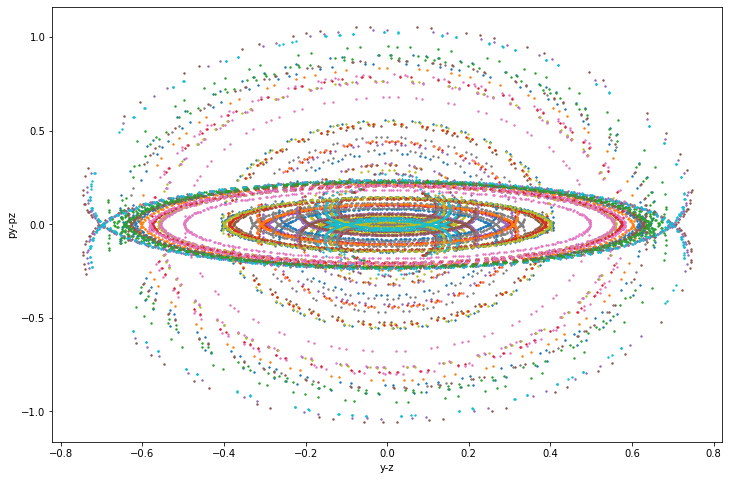

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

k = 1
f1 = lambda x: np.asarray([x[3],x[4],x[5]])
f2 = lambda x: np.asarray([k*(x[1]-x[0]), k*(x[0]+x[2]) - 2*k*x[1], -k*(x[2]-x[1])])
H = lambda x: 0.5*(x[3]**2 + x[4]**2 + x[5]**2) + 0.5* k *(x[1]-x[0])**2 + 0.5* k *(x[2]-x[1])**2 
px = lambda x: 2*(0.5 -  0.5*( + x[4]**2 + x[5]**2) - 0.5* k *(x[1]-x[0])**2 - 0.5* k *(x[2]-x[1])**2 )

def findcrossings(data):
    # returns indices in 1D data set where the data crossed zero. Useful for generating Poincare map at 0
    prb = list()
    for ii in range(len(data)-1):
        if (data[ii] > 0)&(data[ii+1] < 0):
            prb.append(ii)
        if (data[ii] < 0)& (data[ii+1] > 0):
            prb.append(ii)
    return np.array(prb)

fig, ax = plt.subplots(1,1,figsize = (12,8))

for inp in tqdm(range(50)): # number of trajectories
  inp = np.random.rand(6)*1.-0.5
  inp[1], inp[2], inp[4], inp[5] = 0.5,0.5,0.5,0.5,
  while px(inp)<0:
    inp = np.random.rand(6)*1.-0.5
    inp[1], inp[2], inp[4], inp[5] = 0.5,0.5,0.5,0.5,
  inp[3] = np.sqrt(px(inp))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=80000,n_h=1)
  xcrossings = findcrossings(np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])
  print(inp, i, len(xcrossings))
  # yints = [.5*((np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross] + (np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  # pyints = [.5*((np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross] + (np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  # ax[0].scatter(yints, pyints, s=2.)
  # ax[0].set_xlabel("x-y")
  # ax[0].set_ylabel("px-py")
  yints = [.5*((np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross] + (np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross] + (np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax.scatter(yints, pyints, s=2.)
  ax.set_xlabel("y-z")
  ax.set_ylabel("py-pz")
  # yints = [.5*((np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross] + (np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  # pyints = [.5*((np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross] + (np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  # ax[2].scatter(yints, pyints, s=2.)
  # ax[2].set_xlabel("z-x")
  # ax[2].set_ylabel("pz-px")
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

Trajectories of the Coupled Oscillator (Stormer-Verlet)
Hamiltonian = 0.1388974258137625, IC = (0.10, 0.43, 0.21, 0.09, -0.15, 0.29,)


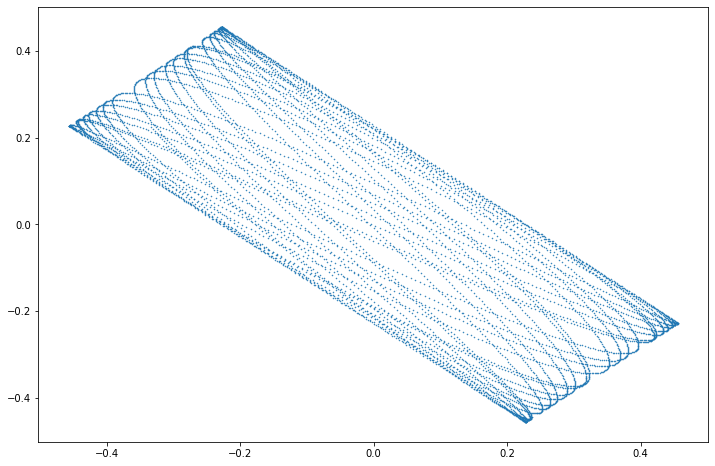

 10%|█         | 1/10 [00:02<00:20,  2.30s/it]

Trajectories of the Coupled Oscillator (Stormer-Verlet)
Hamiltonian = 0.6219543254385957, IC = (-0.12, 0.78, 0.93, -0.23, 0.58, 0.06,)


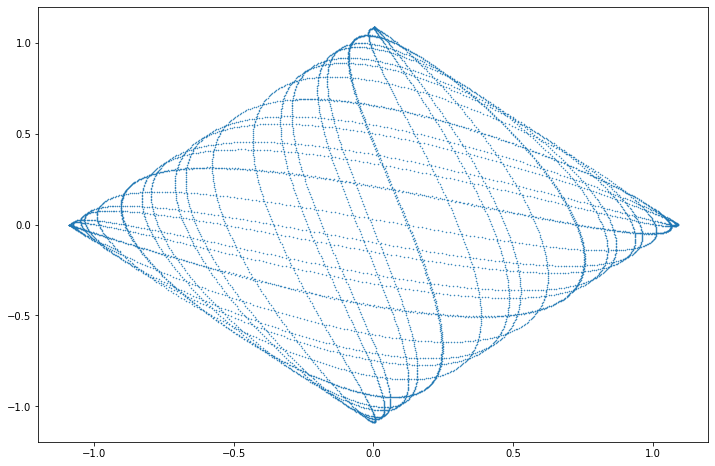

 20%|██        | 2/10 [00:03<00:13,  1.73s/it]

Trajectories of the Coupled Oscillator (Stormer-Verlet)
Hamiltonian = 2.738811671866092, IC = (0.14, 0.85, -0.86, -0.83, -0.96, 0.67,)


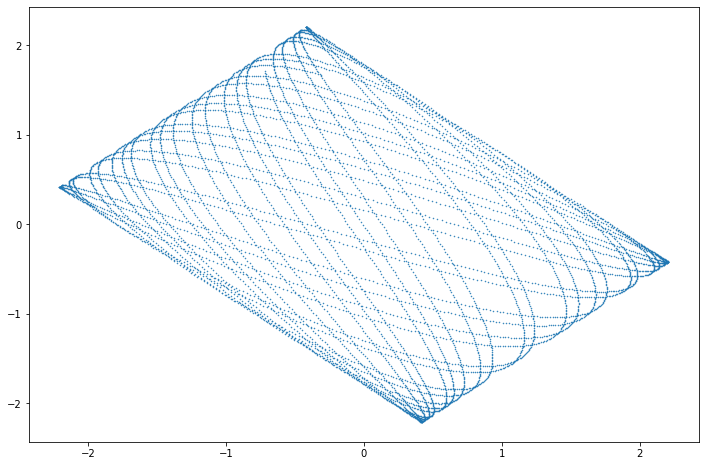

 30%|███       | 3/10 [00:04<00:10,  1.52s/it]

Trajectories of the Coupled Oscillator (Stormer-Verlet)
Hamiltonian = 0.3798180484186125, IC = (0.56, 0.74, 0.96, 0.60, -0.08, 0.56,)


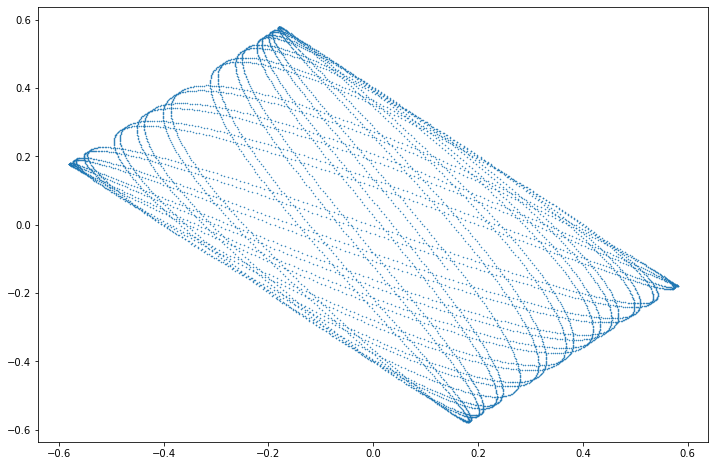

 40%|████      | 4/10 [00:06<00:08,  1.43s/it]

Trajectories of the Coupled Oscillator (Stormer-Verlet)
Hamiltonian = 1.4483701287239912, IC = (-0.76, 0.28, -0.71, 0.89, 0.04, -0.17,)


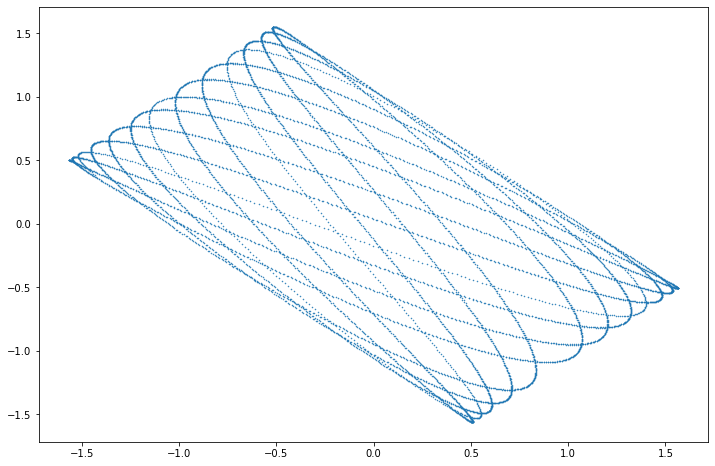

 50%|█████     | 5/10 [00:07<00:06,  1.37s/it]

Trajectories of the Coupled Oscillator (Stormer-Verlet)
Hamiltonian = 1.2220666726867566, IC = (-0.47, 0.55, -0.09, 0.14, -0.96, 0.24,)


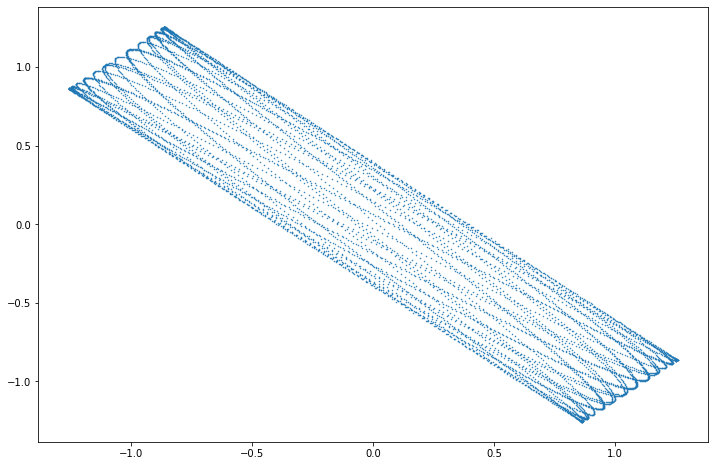

 60%|██████    | 6/10 [00:08<00:05,  1.33s/it]

Trajectories of the Coupled Oscillator (Stormer-Verlet)
Hamiltonian = 0.32718495772895323, IC = (0.22, 0.23, 0.89, 0.36, -0.28, -0.13,)


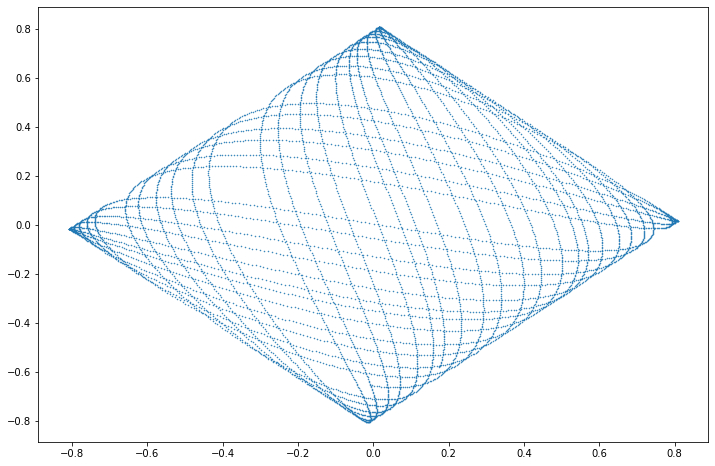

 70%|███████   | 7/10 [00:09<00:03,  1.30s/it]

Trajectories of the Coupled Oscillator (Stormer-Verlet)
Hamiltonian = 2.0497391477366014, IC = (0.40, -0.88, 0.33, 0.34, -0.58, -0.74,)


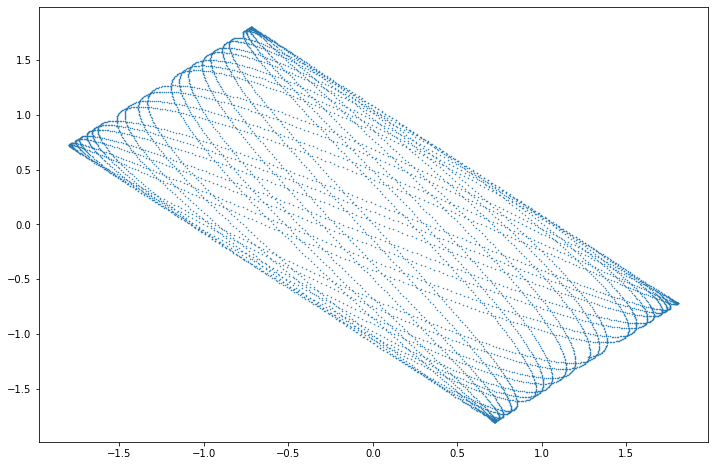

 80%|████████  | 8/10 [00:11<00:02,  1.43s/it]

Trajectories of the Coupled Oscillator (Stormer-Verlet)
Hamiltonian = 0.8912295451290451, IC = (-0.37, -0.27, 0.14, -0.12, 0.98, -0.80,)


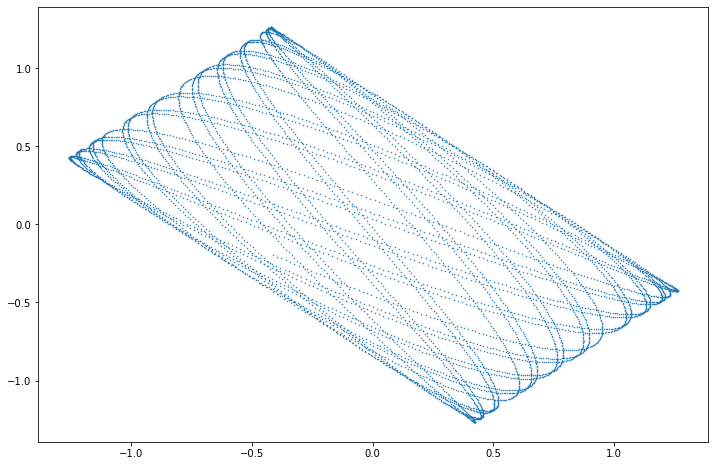

 90%|█████████ | 9/10 [00:13<00:01,  1.43s/it]

Trajectories of the Coupled Oscillator (Stormer-Verlet)
Hamiltonian = 0.7428939694301528, IC = (-0.58, -0.68, 0.31, -0.49, -0.07, -0.51,)


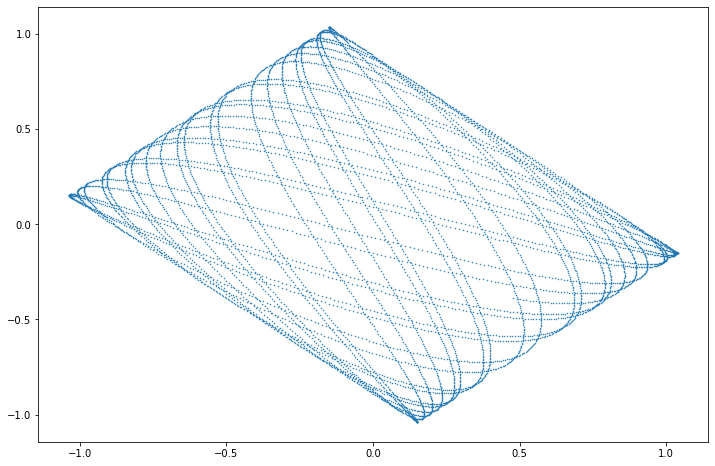

100%|██████████| 10/10 [00:14<00:00,  1.44s/it]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

k = 1
f1 = lambda x: np.asarray([x[3],x[4],x[5]])
f2 = lambda x: np.asarray([k*(x[1]-x[0]), k*(x[0]+x[2]) - 2*k*x[1], -k*(x[2]-x[1])])
np.random.seed(0)


for i in tqdm(range(10)):
  fig, ax = plt.subplots(1,1,figsize = (12,8))  
  inp = np.random.rand(6)*2.-1.
  soln = StormerTrajectory(inp,f1,f2,0.01,N=8000,n_h=1)
  ax.scatter(np.asarray(soln)[0][0,:]-np.asarray(soln)[0][1,:], np.asarray(soln)[0][1,:]-np.asarray(soln)[0][2,:], marker = '.', s=1)
  # ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][4,:], marker = '.', s=0.1)
  # ax[2].scatter(np.asarray(soln)[0][2,:], np.asarray(soln)[0][5,:], marker = '.', s=0.1)
  # ax[3].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
  # ax[4].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
  # ax[5].scatter(np.asarray(soln)[0][2,:], np.asarray(soln)[0][0,:], marker = '.', s=0.1)
  print("Trajectories of the Coupled Oscillator (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3], inp[4], inp[5]))
  # ax[0].set_xlabel("x")
  # ax[0].set_ylabel("px")
  # ax[1].set_xlabel("y")
  # ax[1].set_ylabel("py")
  # ax[2].set_xlabel("z")
  # ax[2].set_ylabel("pz")
  # ax[3].set_xlabel("x")
  # ax[3].set_ylabel("y")
  # ax[4].set_xlabel("y")
  # ax[4].set_ylabel("z")
  # ax[5].set_xlabel("z")
  # ax[5].set_ylabel("x")
  plt.show()